## **Kaggle Challenge**

## Partie 1

---
#### *Ecrit par :*

### GANDEEL Lo'aï, SIEGEL Tom, GENOUD-DUVILLARET Benoît
MAM 4 




## **Introduction : analyse du dataset**

La base du **Kaggle challenge** repose sur le choix du dataset choisi. Nous avons décidé de nous baser sur le dataset suivant : [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). Voici un déscriptif rapide du dis dataset :

Il s'agit d'un sous-dataset d'un dataset original créé par le [CDC](https://en.wikipedia.org/wiki/Centers_for_Disease_Control_and_Prevention), le Centre pour le contrôle et la prévention des maladies aux USA. Ce dataset original a été créé a partir du "Behavioral Risk Factor Surveillance System" ([BRFSS](https://www.cdc.gov/brfss/index.html)), qui est un sondage téléphonique collecté et compilé annuellement par le CDC. Notre dataset est basé sur le sondage BRFSS de l'année 2015, plus particulièrement sur les indicateurs des risques de développement d'un diabète.
Notre dataset est séparé en trois sous-dataset, qui contiennent eux même 22 variables différents que voici :

- Diabetes_012        : L'individue est sain (0), pré-diabétique (1) ou diabétique (2)
- Diabete_binary      : L'individue est sain (0), ou diabétique (1) (on exclus les pré-diabétique).
- HighBP              : La tension artérielle de l'individu est élevée (1 (>140mmHj)) ou non (0). 
- HighChol            : Le taux de choléstérol de l'individu est élévé (1) ou non (0)
- CholCheck           : Le taux de choléstérol de l'individu à été véréfié dans les 5 dérnières années (1) ou non (0)
- BMI                 : L'indice de masse corporelle de l'individu
- Smoker              : L'individu a-t-il déjà fumé plus de 100 cigarettes (5 paquets) au cours de sa vie ? oui (1), non (0)
- Stroke              : L'individu a-t-il déjà fais un AVC ? oui(1), non(0)
- HeartDiseaseorAttack: L'individu a-t-il une maladie coronarienne ou fait un AVC ? oui (1), non(0)
- PhysActivity        : L'individu a-t-il fait une activité sportive (hors travail) dans les 30 derniers jours ? oui(1), non(0)
- Fruits              : L'individu consomme-t-il au moins un fruit par jour ? oui(1), non(0)
- Veggies             : L'individu consomme-t-il au moins un légume par jour ? oui(1), non(0)
- HvyAlcoholConsump   : L'individu est-il un grand consommateur d'alcool ? (hommes adultes buvant plus de 14 verres par semaine et femmes adultes buvant plus de 7 verres par semaine) oui(1), non(0)
- AnyHealthcare       : Lindividu a-t-il une couverture de soins de santé (n'importe laquelle) ? Oui(1), non(0)
- NoDocbcCost         : L'individu a-t-il été dans l'incapacité d'aller voir un professionnel de santé en raison de ses moyens ? Oui(1), non(0)
- GenHlth             : Description générale de la santé de l'individu : Excellent(1)/Very good(2)/Good(3)/Fair(4)/Poor(5)
- MentHlth            : Jours de mauvaise santé mentale des individus sondés depuis les 30 derniers jours. (1-30)
- PhysHlth            : Jours de mauvaise santé physique des individus sondés depuis les 30 derniers jours. (1-30)
- DiffWalk            : L'individu a-t-il du mal à marcher ou à monter les escaliers ? Oui(1), non(0)
- Sex                 : Sex de l'individu : homme(1), femme(0)
- Age                 : Âge de l'individu : 13 catégories d'âge (séparées tous les 5 ans) : 

    1 = 18-24 ans,
    2 = 25-29 ans,
    3 = 30-34 ans,
    4 = 35-39 ans,
    5 = 40-44 ans,
    6 = 45-49 ans,
    7 = 50-54 ans,
    8 = 55-59 ans,
    9 = 60-64 ans,
    10 = 65-69 ans,
    11 = 70-74 ans,
    12 = 75-79 ans,
    13 = 80 years ans.

- Education           : Niveau d'éducation de l'individu (categorisé de 1 à 6):


    1 = N'a jamais été à l'école ou seulement la maternelle,
    2 = Grades 1 à 8 (Elementary),
    3 = Grades 9 à 11 (Some high school),
    4 = Grade 12 à GED (High school graduate),
    5 = Université 1ère à 3ère années,
    6 = Université 4 ans ou plus.


- Income              : Revenus de l'individu (categorisé de 1 à 8) : 

    1 = 10,000 dollars ou moins, 
    2 = 10,000 dollars à 15,000 dollars, 
    3 = 15,000 à 20,000 dollars, 
    4 = 20,000 à 25,000 dollars, 
    5 = 25,000 à 35,000 dollars, 
    6 = 35,000 à 50,000 dollars, 
    7 = 50,000 à 75,000 dollars, 
    8 = 75,000 dollars ou plus.


Le premier dataset représente les patients sains, prédiabétiques ou diabétiques, et contient 253,680 réponses.
Le deuxième représente uniquement des patients sains ou diabétiques (déiabétiques et prédiabétiques métlangés) avec 70,692 réponses, et les réponses entre sains et prédiabétiques sont partagés 50/50. Le troisième dataset est le même que le premier avec les deux colonnes prrédiabétiques et diabétiques fusionnées (on peut le vérifier : all.equal(diabete_dataset1[,-1], diabete_dataset3[,-1])).

### **1 - Objectif d'affaire**

Notre objectif avec ce dataset serait à terme de pouvoir prévenir le développement du diabète chez une population encore saine.

Quels sont les facteurs de risque les plus prédictifs du risque de développement du diabète ? Le niveau de vie (salaire, éducation, etc..) est-il un facteur plus impactant que l'hygiène de vie sur ce risque ? 

Pouvons-nous utiliser un sous-ensemble de facteurs de risque pour prédire avec précision si une personne est atteinte de diabète ?

Pouvons-nous créer un sondage plus cours à partir du BRFSS en utilisant la sélection de fonctionnalités pour prédire avec précision si une personne pourrait être atteinte de diabète ou si elle présente un risque élevé de diabète ?

### **2 - Objectif technique**

Notre objectif technique avec ce dataset est l'application de la regression logistique afin de déterminer le facteur qui caractérisent les personnes diabétiques des personnes qui ne le sont pas. La regression logistique est un outil très utilisé en médecine et c'est pourquoi nous voulons l'utiliser.

Un autre de nos objectif est d'utiliser le deeplearning comme méthode d'analyse avancé de donnée, étant donné que notre dataset semble parfaitement s'y préter (données médicales, trois dataset (train, validation, test))

### **3 - Analyse statistique des données**

On a tout d'abord beosin de nettoyer nos dataset des données "NA" ou "inf", c'est-à-dire les données inexistantes ou infinies.

#### Chargement des datasets

In [31]:
diabete_dataset1 <- read.csv("diabetes_012_health_indicators_BRFSS2015.csv", stringsAsFactors = TRUE, skipNul = TRUE, na.strings = c(""))
diabete_dataset2 <- read.csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", stringsAsFactors = TRUE, skipNul = TRUE, na.strings = c(""))
diabete_dataset3 <- read.csv("diabetes_binary_health_indicators_BRFSS2015.csv", stringsAsFactors = TRUE, skipNul = TRUE, na.strings = c(""))


#### Dataset avant nettoyage

In [32]:
#summary(diabete_dataset1)
#summary(diabete_dataset2)
summary(diabete_dataset3)

 Diabetes_binary      HighBP         HighChol        CholCheck     
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.0000   Median :0.000   Median :0.0000   Median :1.0000  
 Mean   :0.1393   Mean   :0.429   Mean   :0.4241   Mean   :0.9627  
 3rd Qu.:0.0000   3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000     
 1st Qu.:24.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000     
 Median :27.00   Median :0.0000   Median :0.00000   Median :0.00000     
 Mean   :28.38   Mean   :0.4432   Mean   :0.04057   Mean   :0.09419     
 3rd Qu.:31.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.00000     
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000     
  PhysActivit

In [33]:
library(tidyr)

# On vérifie si nous avons des données inexistantes ou infinies dans notre dataset n°1

cat(" NA value in our dataset :" , sum(is.na(diabete_dataset1)))
cat(" \nInf value in our dataset :" , sum(as.integer(as.logical(apply(diabete_dataset1, 2, function(x) any(is.infinite(x)))))))
                                                                      
# On vérifie si nous avons des données inexistantes ou infinies dans notre dataset n°2

cat(" \nNA value in our dataset :" , sum(is.na(diabete_dataset1)))
cat(" \nInf value in our dataset :" , sum(as.integer(as.logical(apply(diabete_dataset1, 2, function(x) any(is.infinite(x)))))))
                                                                      
# On vérifie si nous avons des données inexistantes ou infinies dans notre dataset n°3

cat(" \nNA value in our dataset :" , sum(is.na(diabete_dataset1)))
cat(" \nInf value in our dataset :" , sum(as.integer(as.logical(apply(diabete_dataset1, 2, function(x) any(is.infinite(x)))))))

 NA value in our dataset : 0 
Inf value in our dataset : 0 
NA value in our dataset : 0 
Inf value in our dataset : 0 
NA value in our dataset : 0 
Inf value in our dataset : 0

On remarque qu'il n'y a aucune données manquante ou infini, nul besoin de retirer des lignes.

In [34]:
str(diabete_dataset1)
str(diabete_dataset2)
str(diabete_dataset3)

'data.frame':	253680 obs. of  22 variables:
 $ Diabetes_012        : num  0 0 0 0 0 0 0 0 2 0 ...
 $ HighBP              : num  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : num  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : num  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : num  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : num  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : num  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : num  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : num  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : num  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

Toutes les données sont numériques, nul besoin de convertir quoi que ce soit. De plus, il semblerait logique que les réponses d'un sondage puisse donner des doublons au niveau des lignes, on garde donc les doublons dans nos datasets.

#### **Analyse**

Pour l'analyse, on ne traitera pas le dataset n°2, puisque nous n'avons pas besoin d'optimiser de calculs ou de mormaliser le dataset (parfait pour le deeplearning, que nous traiterons dans la deuxième partie du challenge).

#### Libraries 

On importe dans cette section les librairies dont nous aurons besoin pour l'analyse.

In [35]:
#install.packages("ggplot2")
#install.packages("scales")
#install.packages("reshape2")
#install.packages("dplyr")

library(ggplot2)
library(scales)
library(reshape2)
library(dplyr)

#### Graphiques

Puisque nous allons réutiliser plusieurs fois certains types graphiques, nous les plaçons dans des fonctions : 

In [36]:
# Graphiques en barres horizontal montrant les proportions de la variables va pour 
# en fonction du statut de diabète de la personne 
graph_horizontal_bars_diabete <- function(df, diabete, var) {
  
    # Define colors as a constant vector
    colors <- c('#ff5809', '#1E88E5')
  
    # Use `table()` to calculate contingency table
    table <- table(df[[diabete]], df[[var]])
  
    # Sum the rows of the contingency table
    sum_table <- rowSums(table)
  
    # Calculate the percentage table by dividing each cell by its row sum
    var_count <- table/sum_table
  
    # Reverse the order of the columns in the percentage table
    var_count <- var_count[, ncol(var_count):1]
  
    # Printing the name of the dataframe
    #print(colnames(df)[1])
    
    # Making some arangements
    if (colnames(df)[1] == "Diabetes_012") {
        names <- c("Non-Diabetic", "Pre-Diabetic", "Diabetic")
    }
    else {
        names <- c("Non-Diabetic", "Diabetic")
    }
    
    # Use `barplot()` to create a stacked bar chart
    # Add descriptive labels to the chart
    # Use `barplot()` to create a stacked bar chart
    # Add descriptive labels and percentage values to the chart
    bp <- barplot(t(as.matrix(var_count)), # Transpose for having the column sum equal to 1
        horiz = TRUE, 
        col = colors, 
        xlim = c(0,1), 
        xlab = "Percentage", 
        ylab = "", 
        main = paste("Percentage of", var, "by",diabete,"status"), 
        names.arg = names, 
        legend = TRUE,
        args.legend = list(title="Réponses", box.col = "black", bg = "white", legend=c("Oui", "Non")))
    
    #print(var_count)
    # Add percentage values to the right side of the chart using the `text()` function
    par(mar = c(5, 7, 4, 2) + 0.1) # Increase the right margin to create more space for the labels
    text(x = var_count[,1] , y = bp, labels = paste0(round(var_count[,1]*100),"%"), col = "white", pos = 2)
}


# Fonction qui affiche des camembert
graph_pie <- function(data, variable) {
  # Calculer les fréquences de chaque valeur de la variable
  freq <- table(data[[variable]])
  
  # Calculer les pourcentages correspondants
  percent <- round(prop.table(freq) * 100, 1)
  
  # Tracer le camembert avec les pourcentages
  pie(freq, 
    main = paste("Fréquences de", variable), 
    labels = paste(names(freq), " (", percent, "%)", sep = ""),
    col = rainbow(length(freq)))
}


# Fonction qui affiche des histogrammes
graph_histograms <- function(df, columns) {
  # Loop through each column and create a histogram
  for (column in columns) {
    hist(df[[column]], freq = FALSE, main = column, xlab = column)
    # Add a density plot to the histogram
    lines(density(df[[column]]), col = "blue") # lignes
    abline(v = mean(df[[column]]), col = "red") # Moyennes
    abline(v = median(df[[column]]), col = "green")
  }
}

# Fonction qui affiche la correlation map du dataframe passé en paramètre
correlation_map <- function(df) {
    # Set up the data and colormap
    data_heatmap <- diabete_dataset1
    custom_cmap <- colorRampPalette(c('#011b7a', 'white', '#850505'))(100)

    # Create a correlation matrix
    corr_matrix <- cor(data_heatmap)

    # Create a mask to hide the upper triangle of the matrix
    mask <- upper.tri(corr_matrix)

    # Melt the matrix into a data frame
    corr_df <- melt(corr_matrix)

    # Create the heatmap plot
    ggplot(corr_df, aes(x = Var1, y = Var2, fill = value)) +
      geom_tile(aes(width = 1, height = 1), color = "white", alpha = 0.8) +
      scale_fill_gradientn(colors = custom_cmap, limits = c(-0.8, 0.8)) +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
            axis.text.y = element_text(size = 15),
            axis.title = element_blank(),
            legend.position = "none") +
      labs(title = "Correlation Heatmap", subtitle = "", x = "", y = "") +
      coord_fixed() +
      guides(fill = guide_colorbar(barwidth = 25, barheight = 0.5, 
                                   title.position = "top", title.vjust = 0.5, 
                                   label.theme = element_text(size = 15)))

}

#### Suppression de variable

Avant de commencer à analyser, nous aimerions retirer du dataset toutes les personnes qui n'ont pas vérifier leur cholesterole depuis plus de 5 ans, puisqu'ils peuvent fausser les données du cholesterole.

In [37]:
# On choisis l'enemble des individus qui on vérifier leur cholesterole depuis moins de 5 ans
diabete_dataset1_wcc <- diabete_dataset1[diabete_dataset1$CholCheck == 1,]
diabete_dataset3_wcc <- diabete_dataset3[diabete_dataset3$CholCheck == 1,]

# On retire cette colonne puisqu'elle n'à plus que des valeurs égales à 1
diabete_dataset1_wcc <- diabete_dataset1_wcc %>% select(-c(CholCheck))
#str(diabete_dataset1_wcc)
diabete_dataset3_wcc <- diabete_dataset3_wcc %>% select(-c(CholCheck))
str(diabete_dataset3_wcc)

'data.frame':	244210 obs. of  21 variables:
 $ Diabetes_binary     : num  0 0 0 0 0 0 0 1 0 1 ...
 $ HighBP              : num  1 1 1 1 1 1 1 1 0 0 ...
 $ HighChol            : num  1 1 0 1 1 0 1 1 0 0 ...
 $ BMI                 : num  40 28 27 24 25 30 25 30 24 25 ...
 $ Smoker              : num  1 0 0 0 1 1 1 1 0 1 ...
 $ Stroke              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 0 0 1 0 0 ...
 $ PhysActivity        : num  0 0 1 1 1 0 1 0 0 1 ...
 $ Fruits              : num  0 1 1 1 1 0 0 1 0 1 ...
 $ Veggies             : num  1 0 1 1 1 0 1 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num  0 1 0 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  5 5 2 2 2 3 3 5 2 3 ...
 $ MentHlth            : num  18 30 0 3 0 0 0 30 0 0 ...
 $ PhysHlth            : num  15 30 0 0 2 14 0 30 0 0 ...
 $ DiffWalk            : num  1 1 0 0 0 0 1 1 0 0 ...
 $ Sex               

#### *Quels sont les facteurs de risque les plus prédictifs du risque de développement du diabète ?* 

#### Pré-diabétiques

On sait que nos trois dataset n'ont pas exactement les même paramètres. Il serait intéressant d'analyser l'imapct des variables sur la différenciation entre sain et prédiabétique, et entre prédiabétique et diabétique. En effet, les prédiabétiques peuvent changer de comportement une fois leur diabète développé.

Obervons d'abord les différences notables de comportements ou de conditions physiques (puisque ce sont les seules qui peuvent réellement évoluer entre les différents stade de diabètes). Les variables de comportement qui pourraient changer seraient HighBP, HighChol, BMI, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, DiffWalk

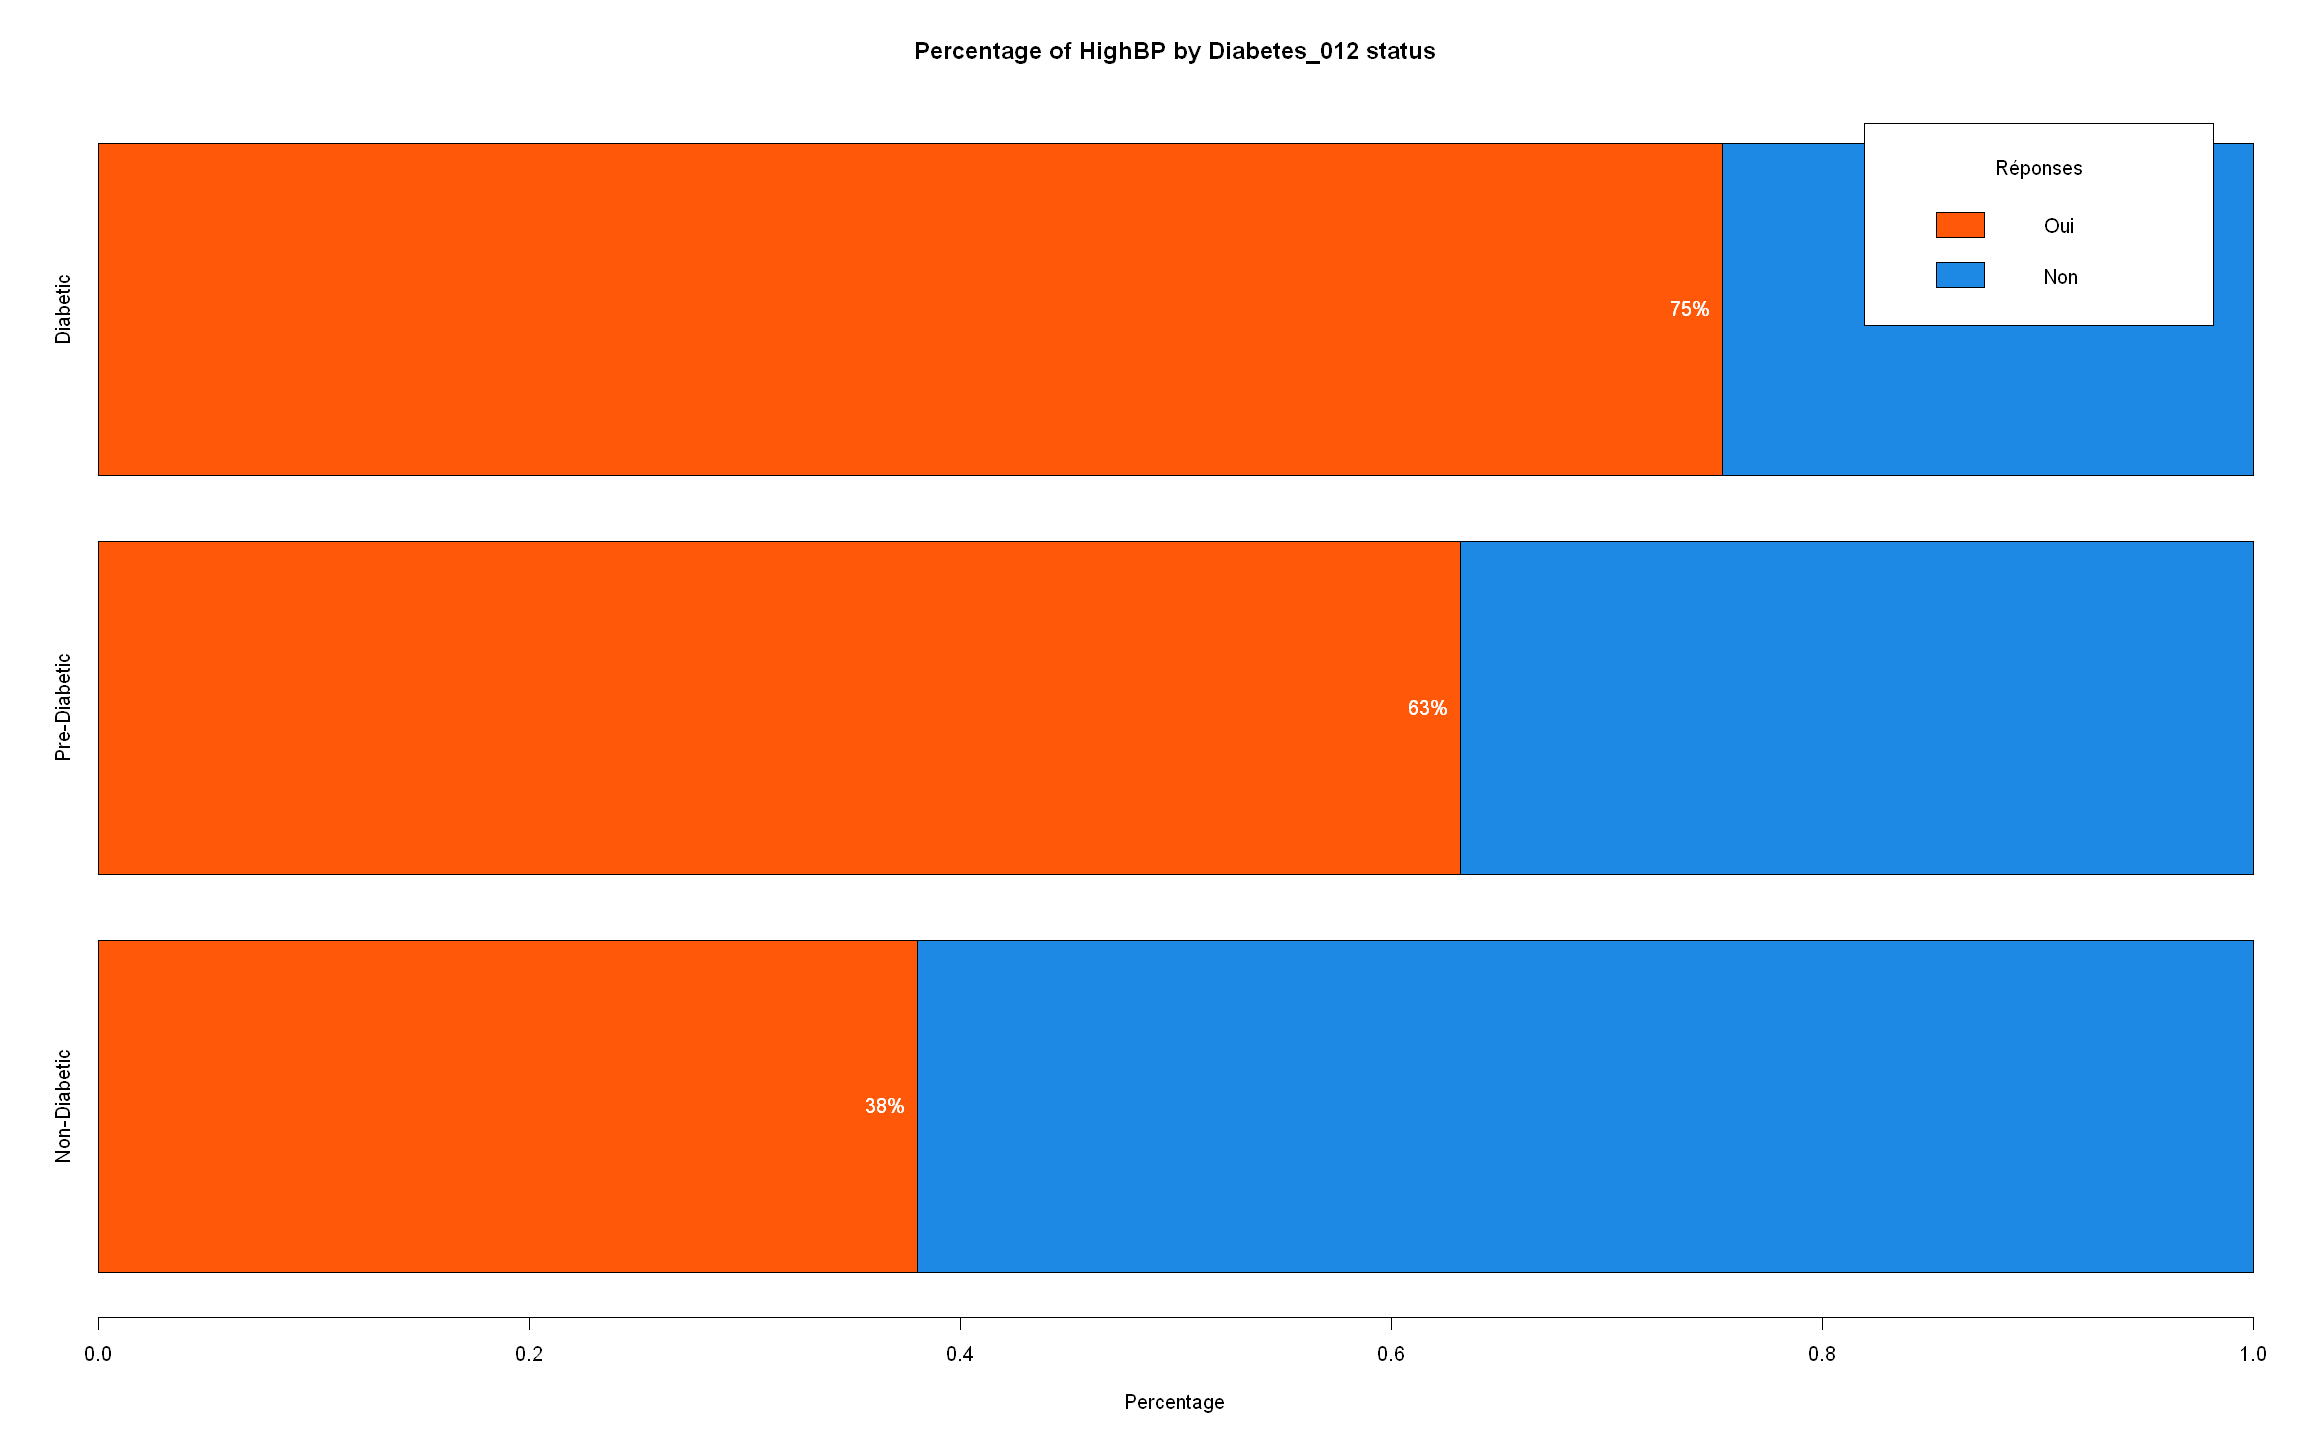

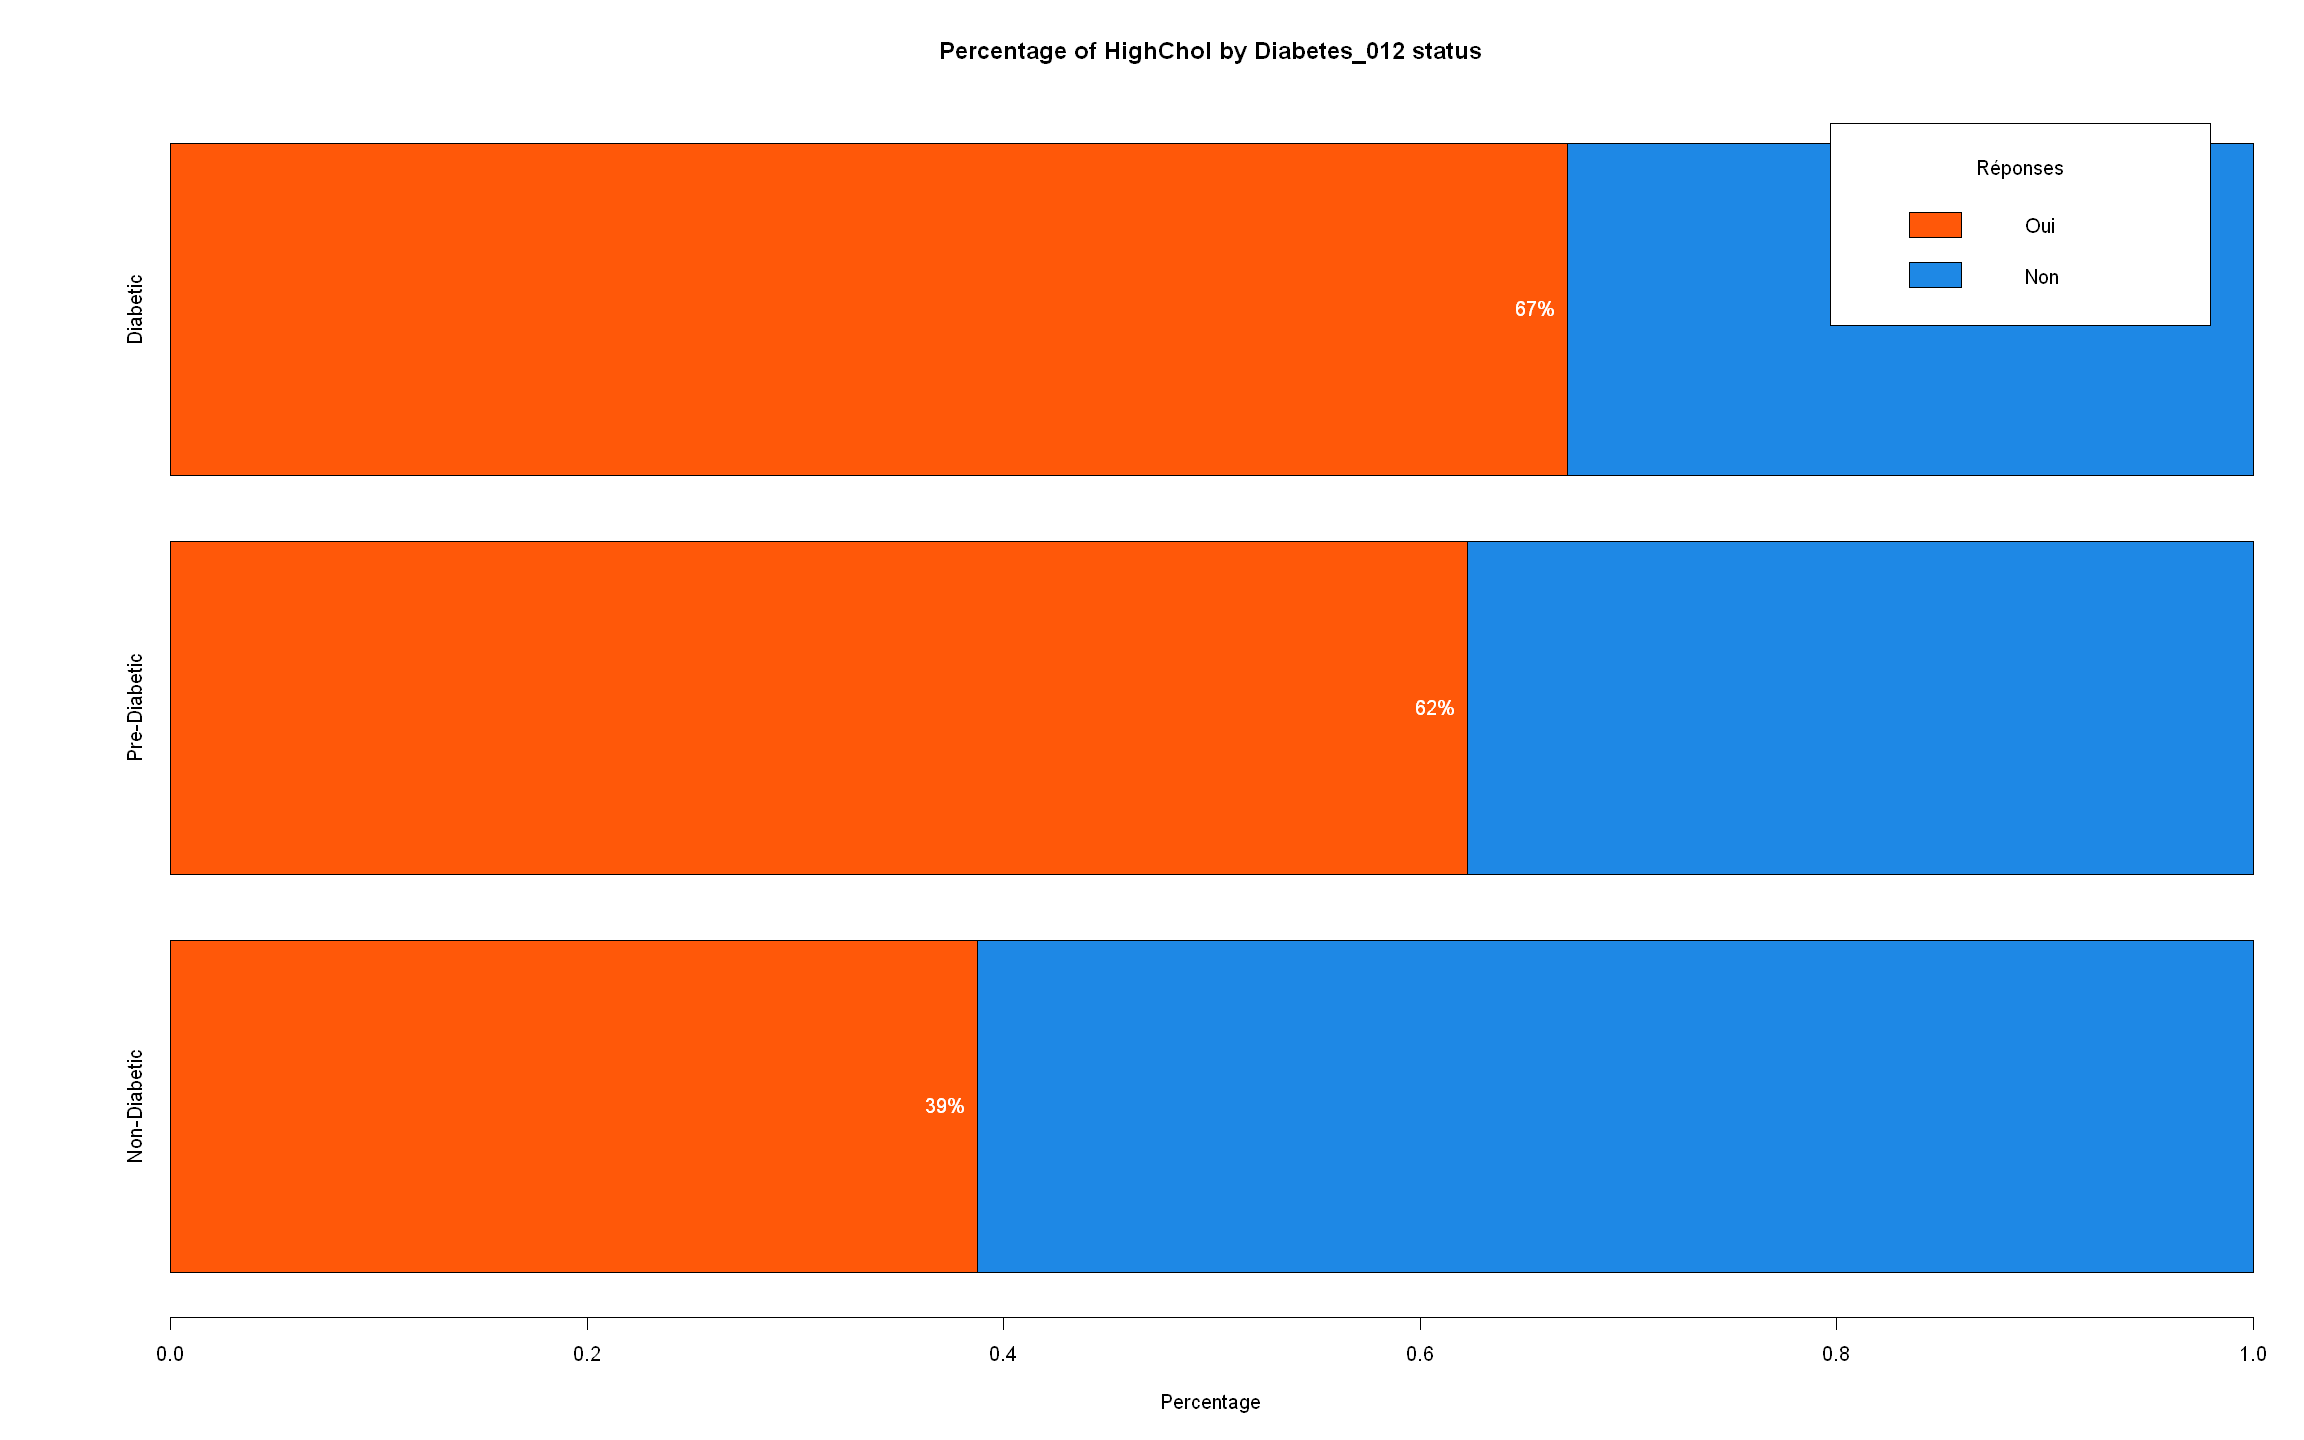

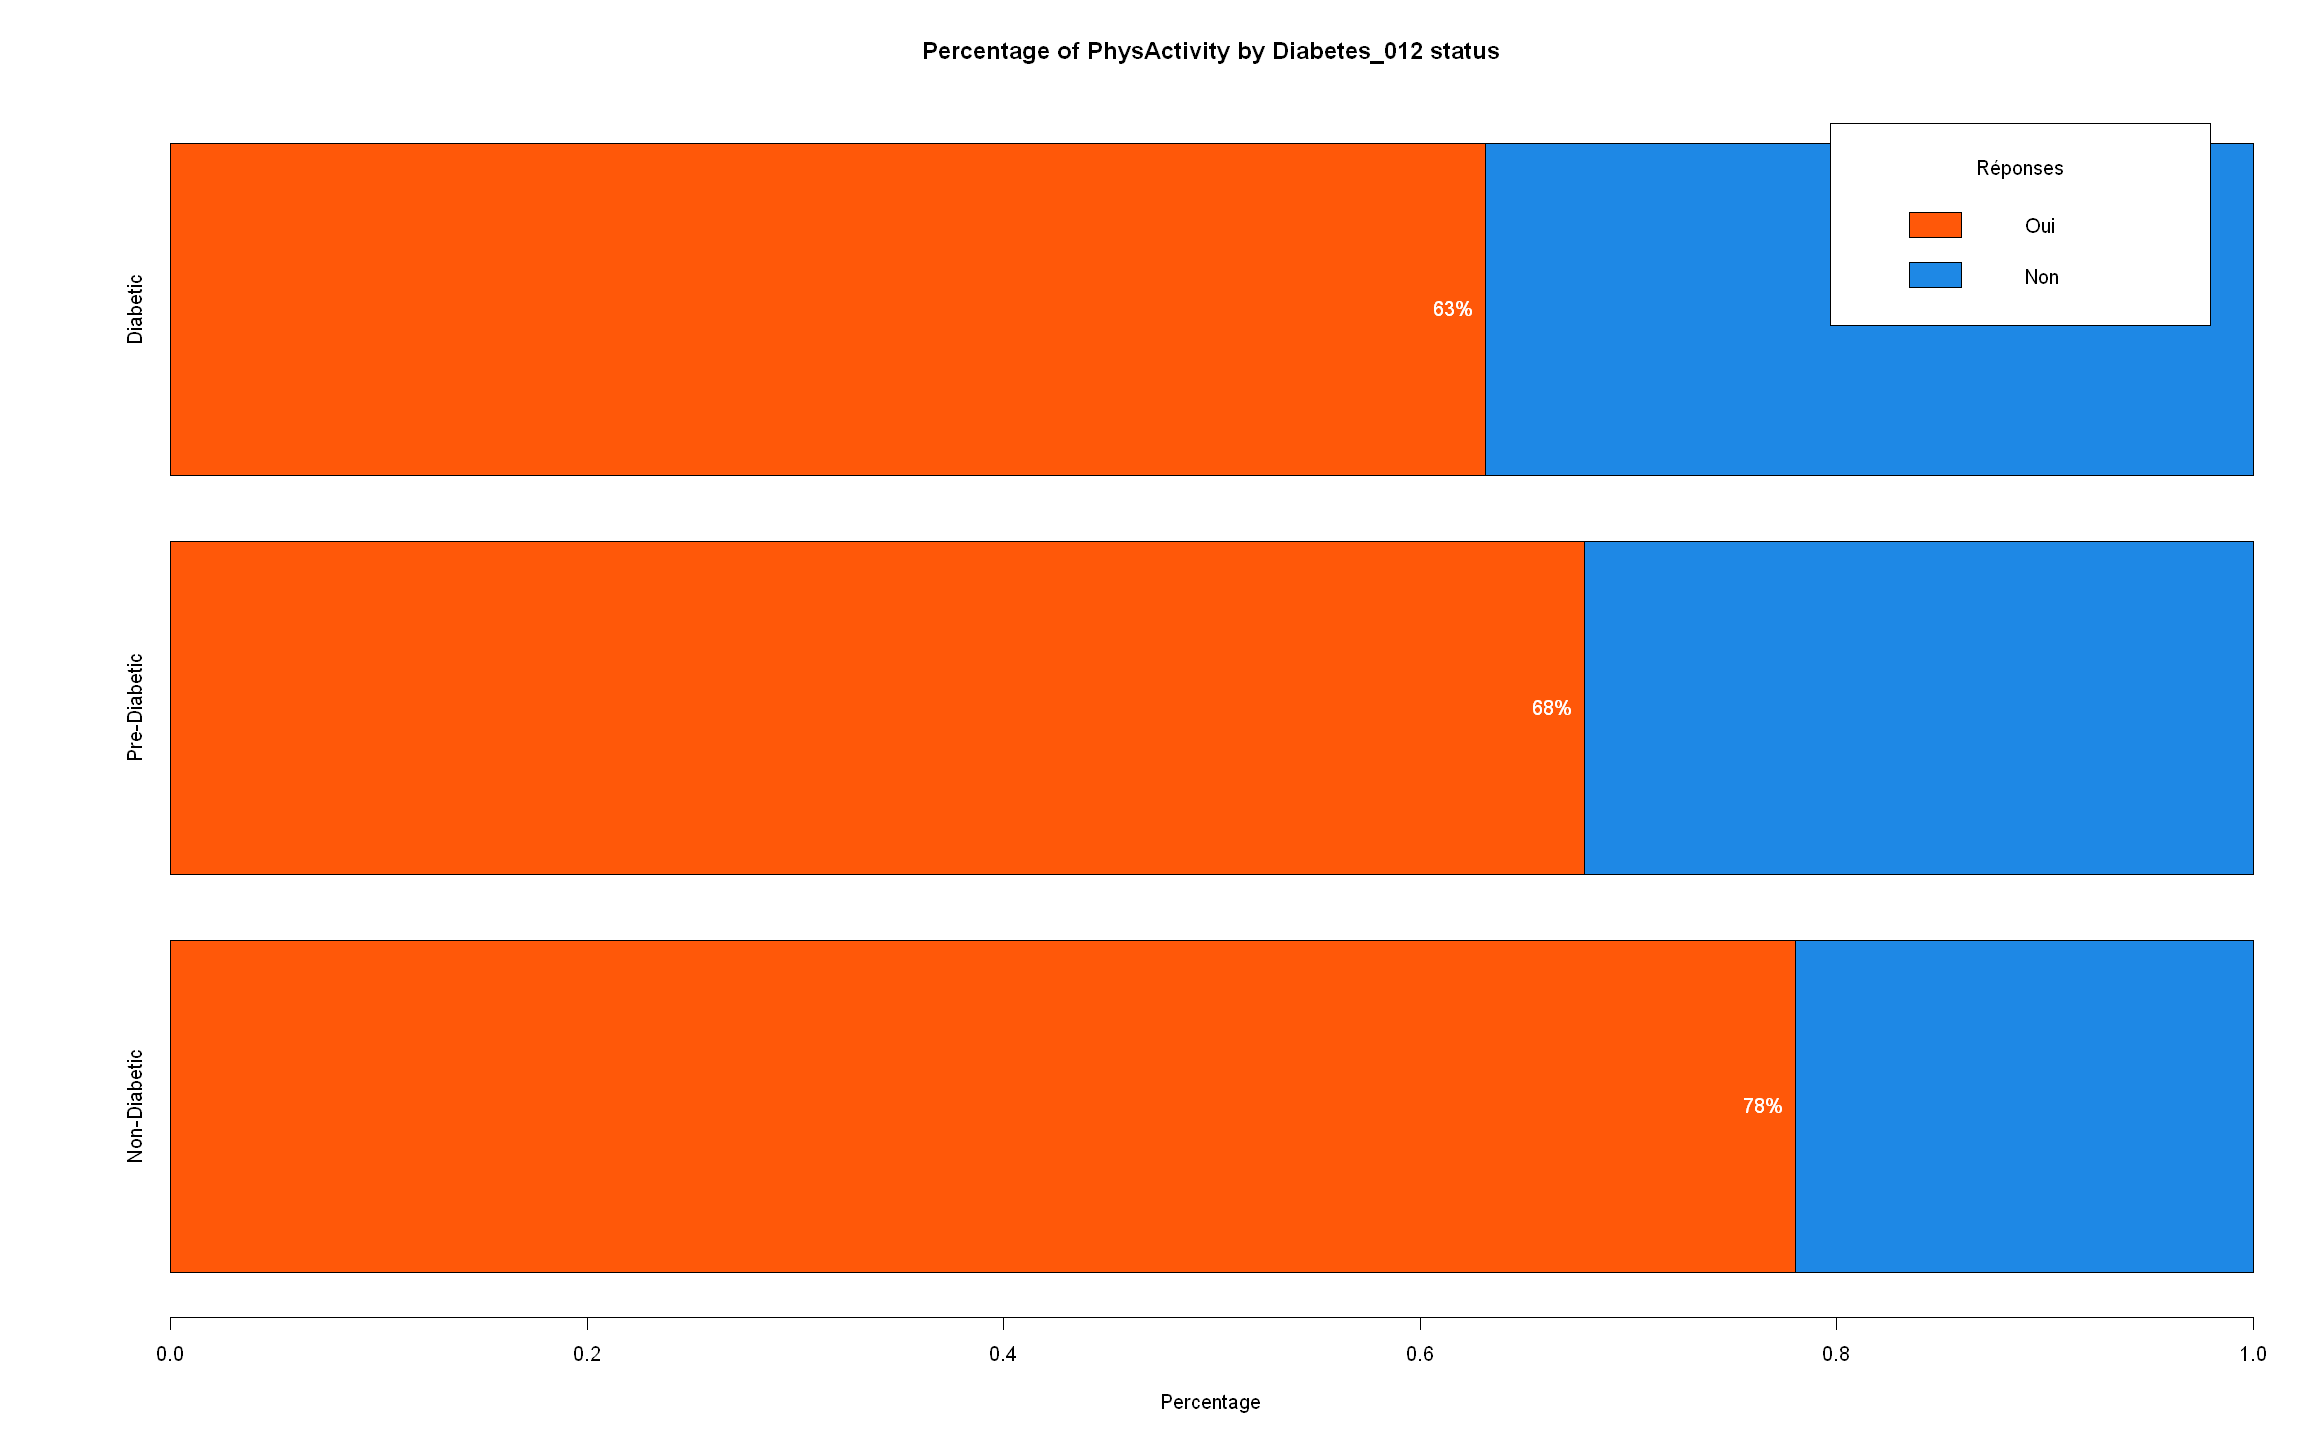

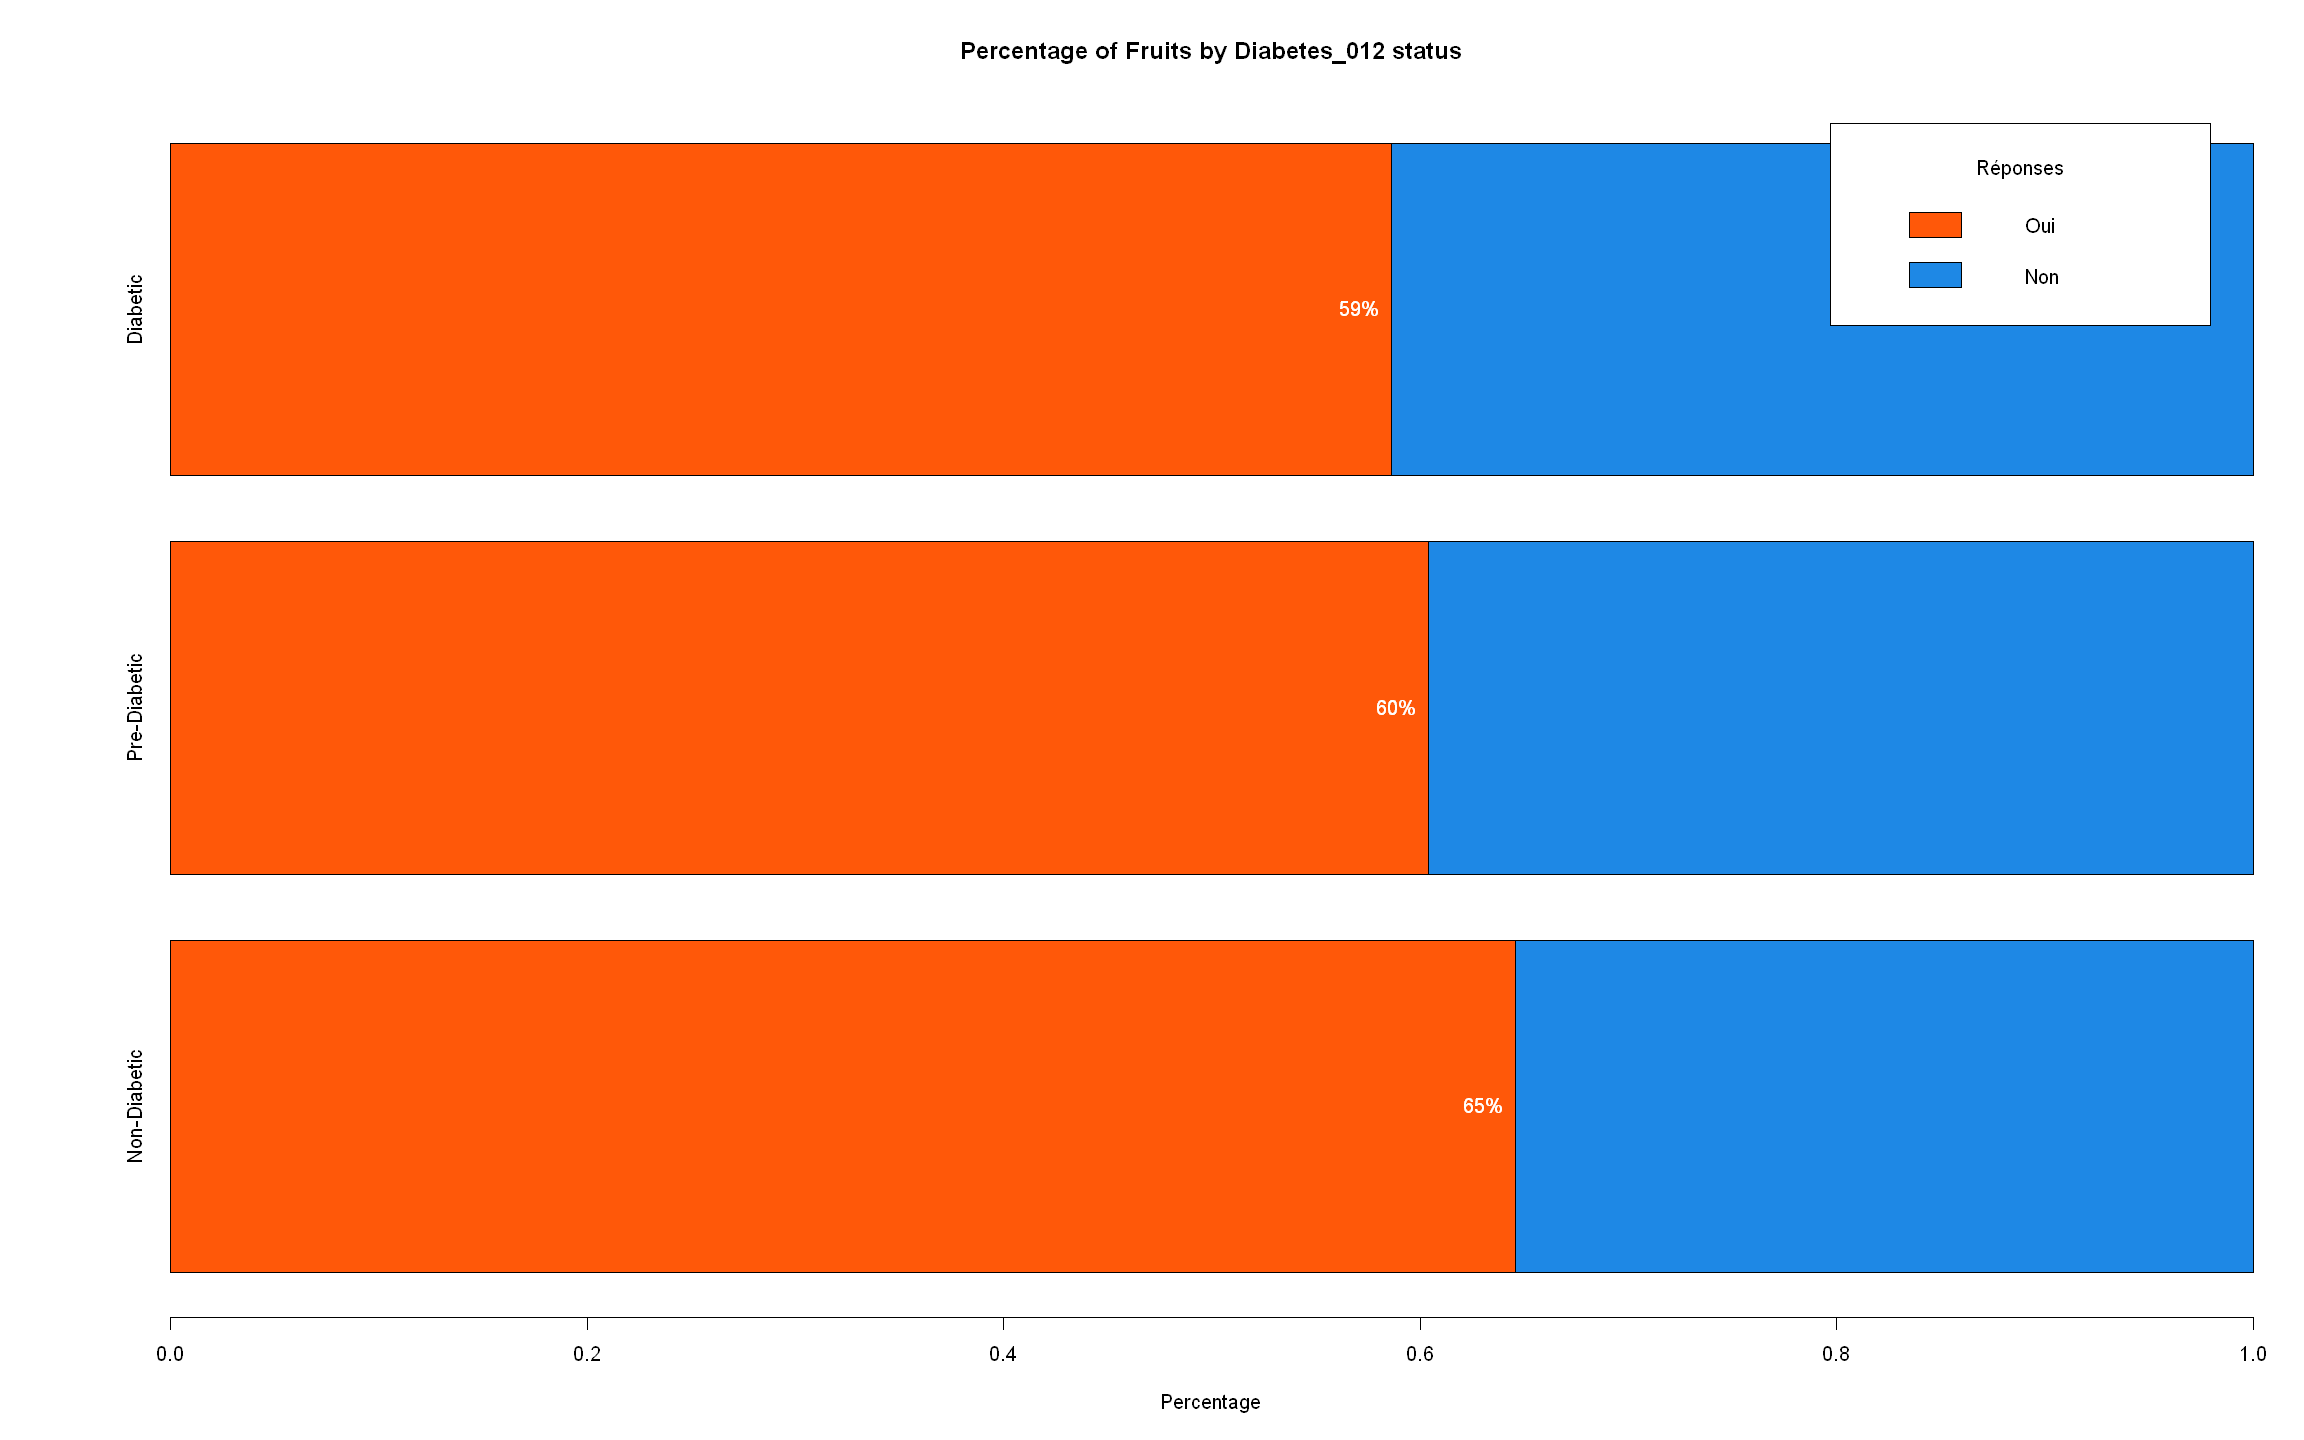

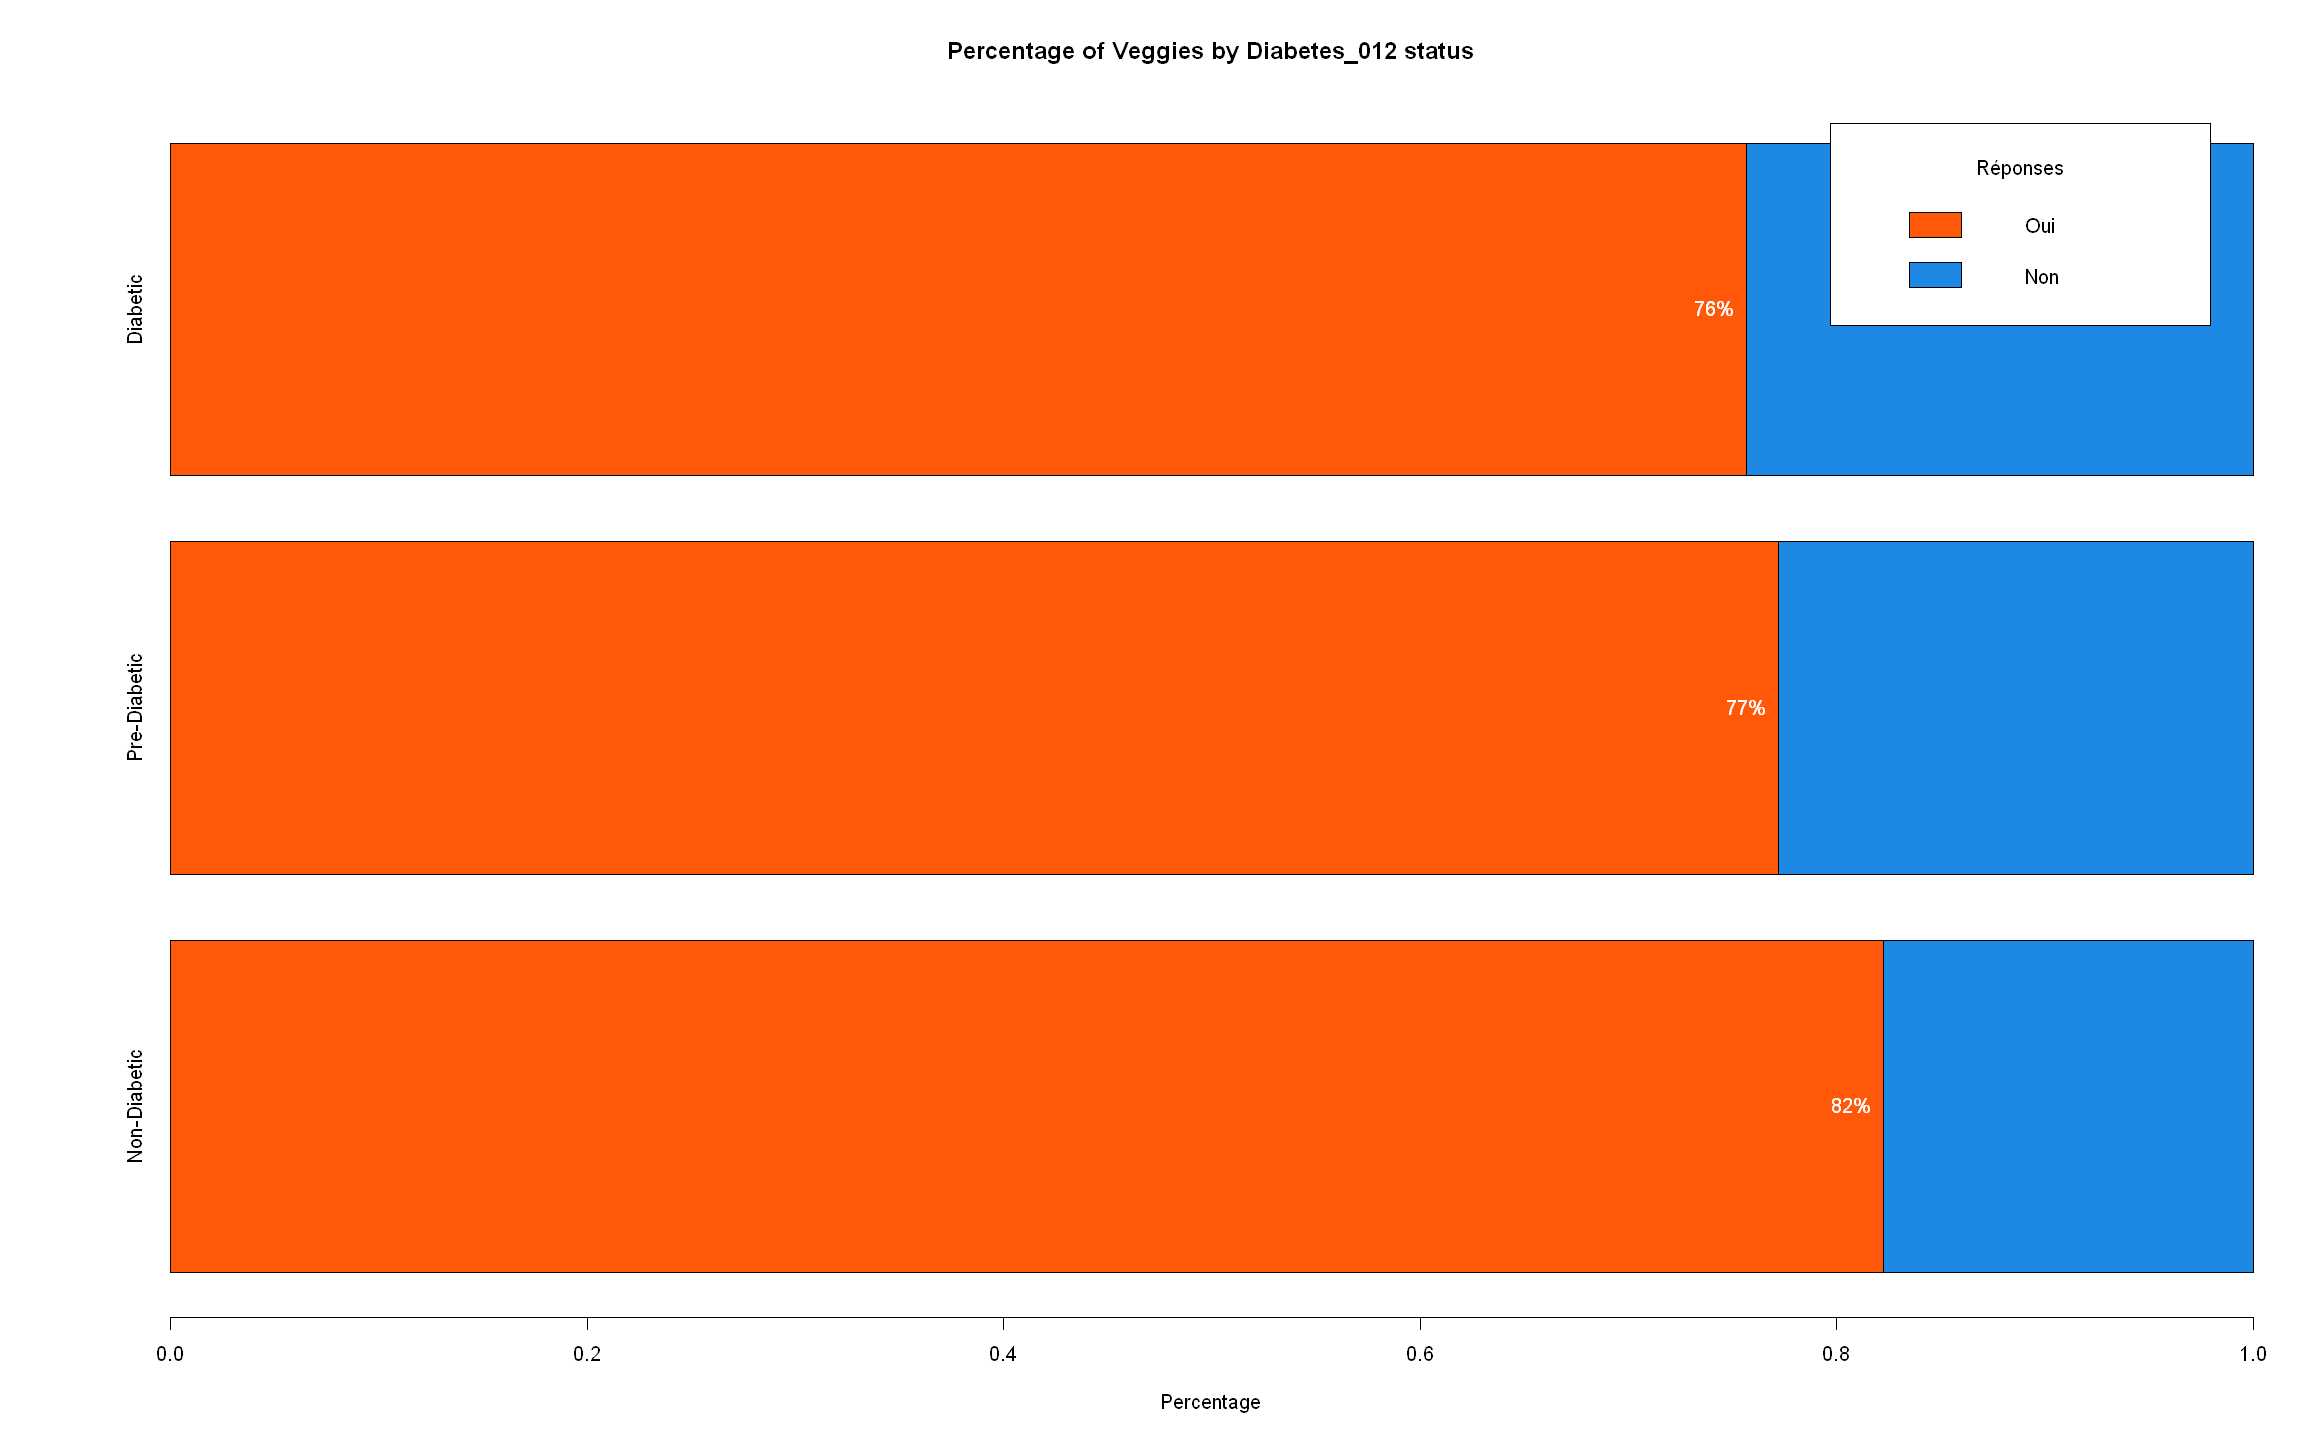

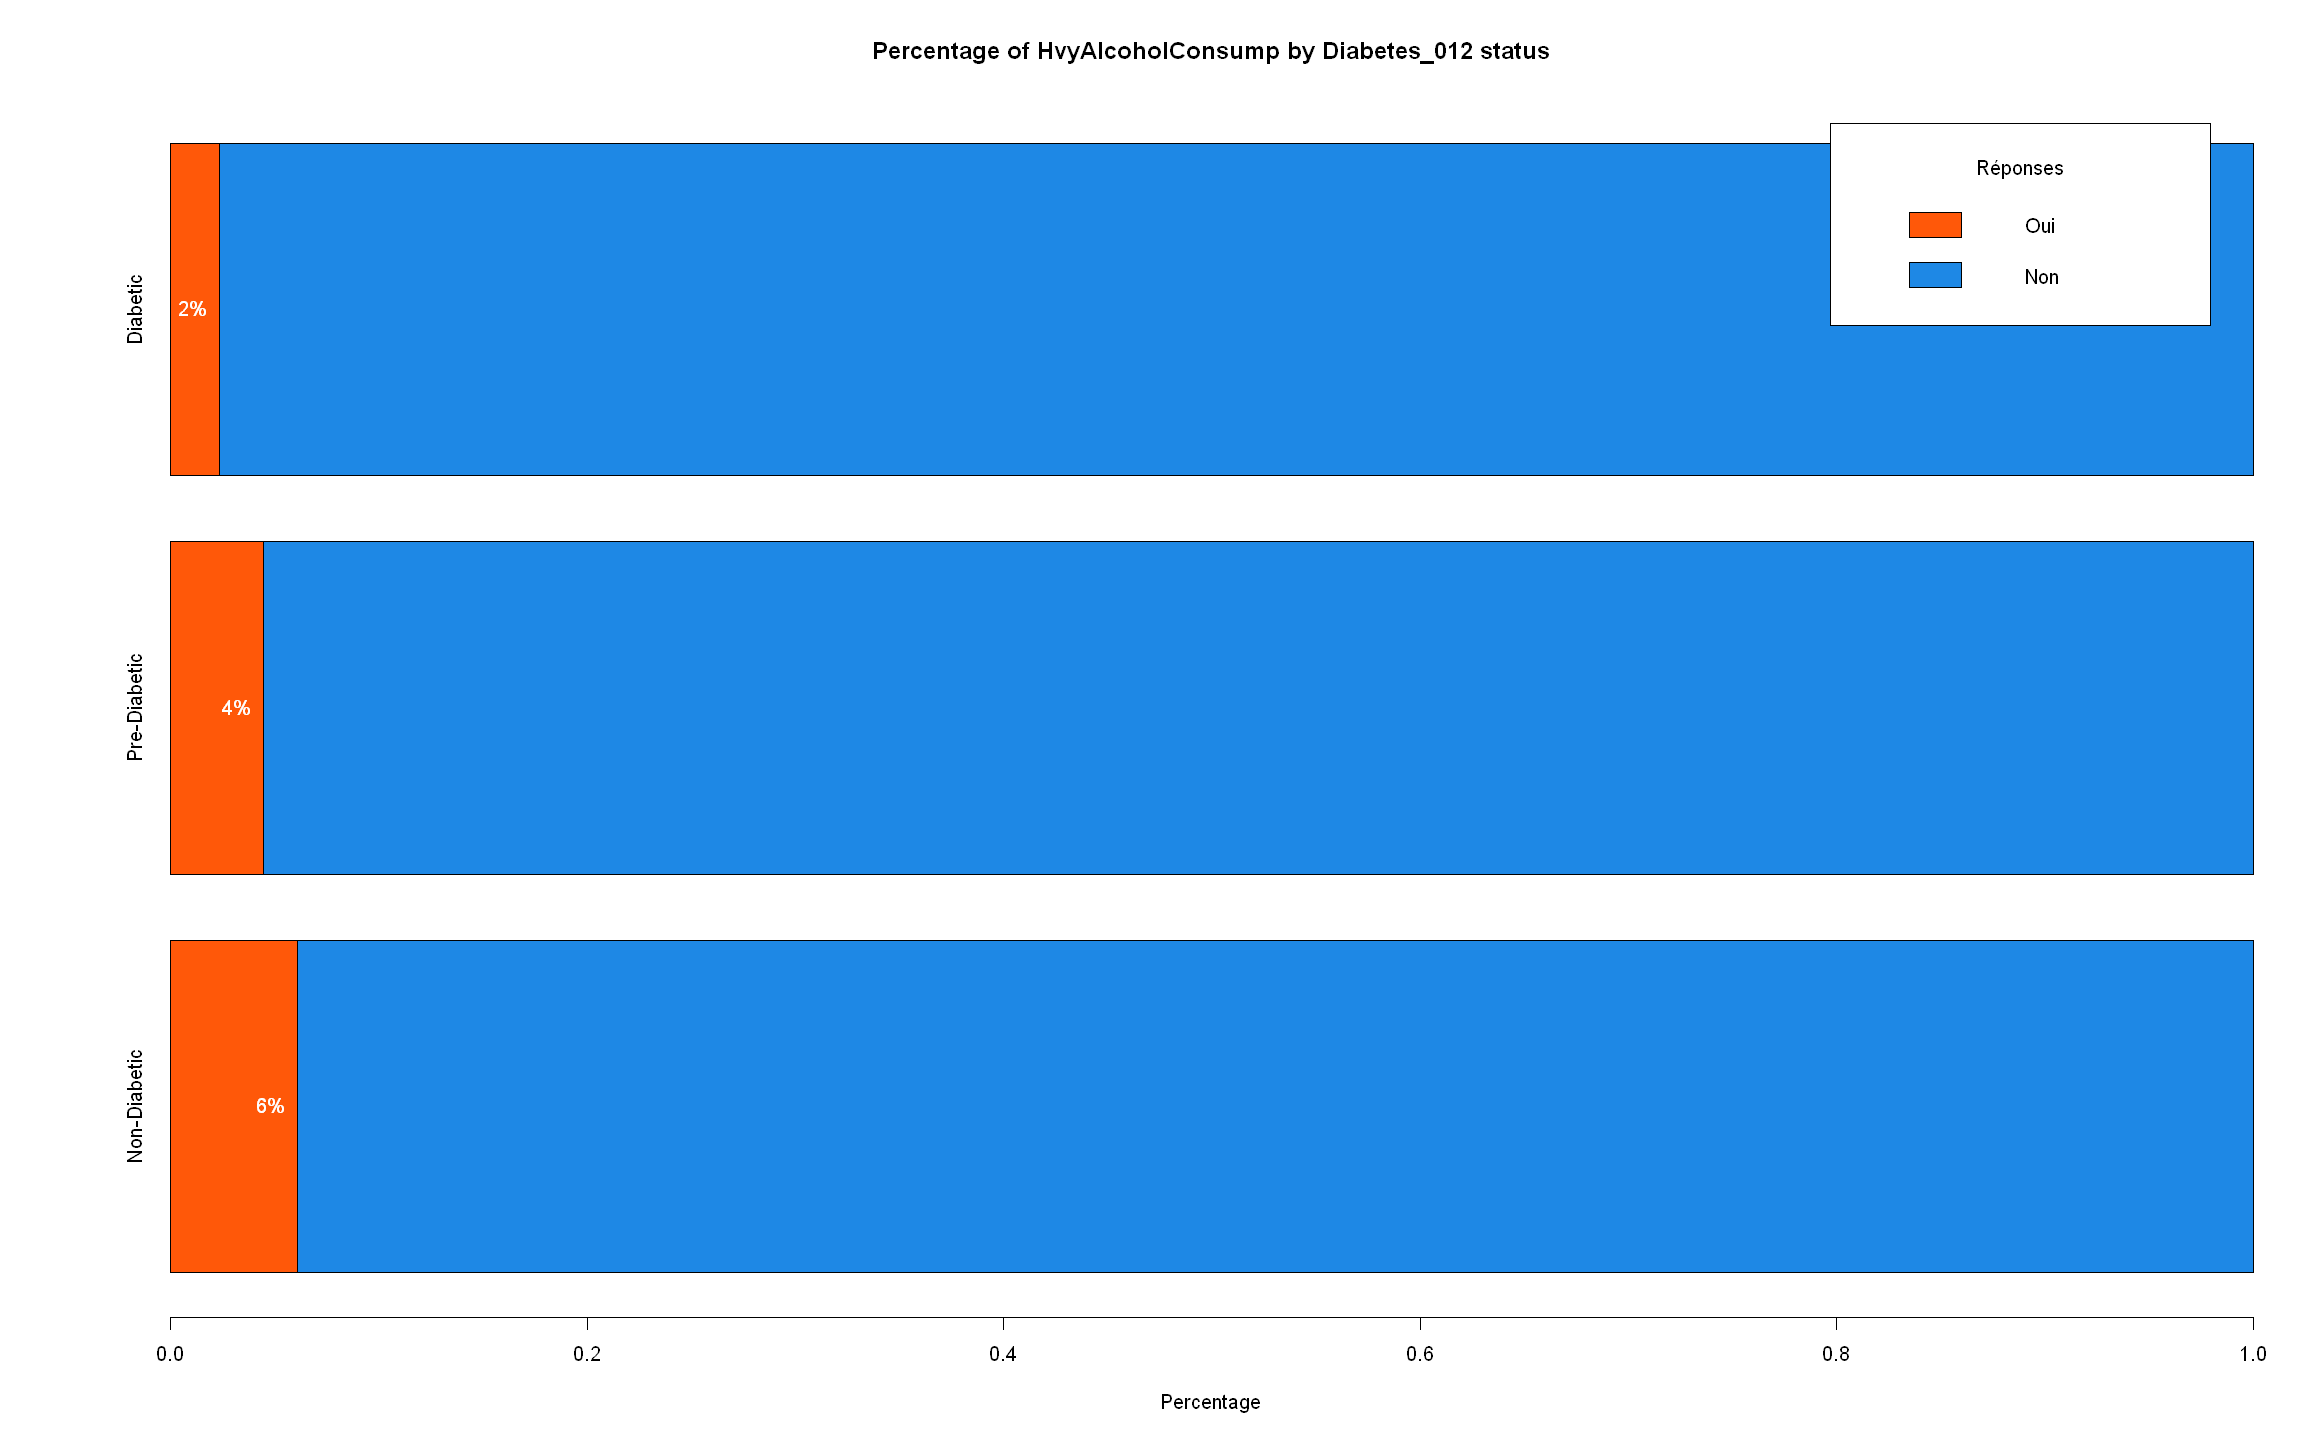

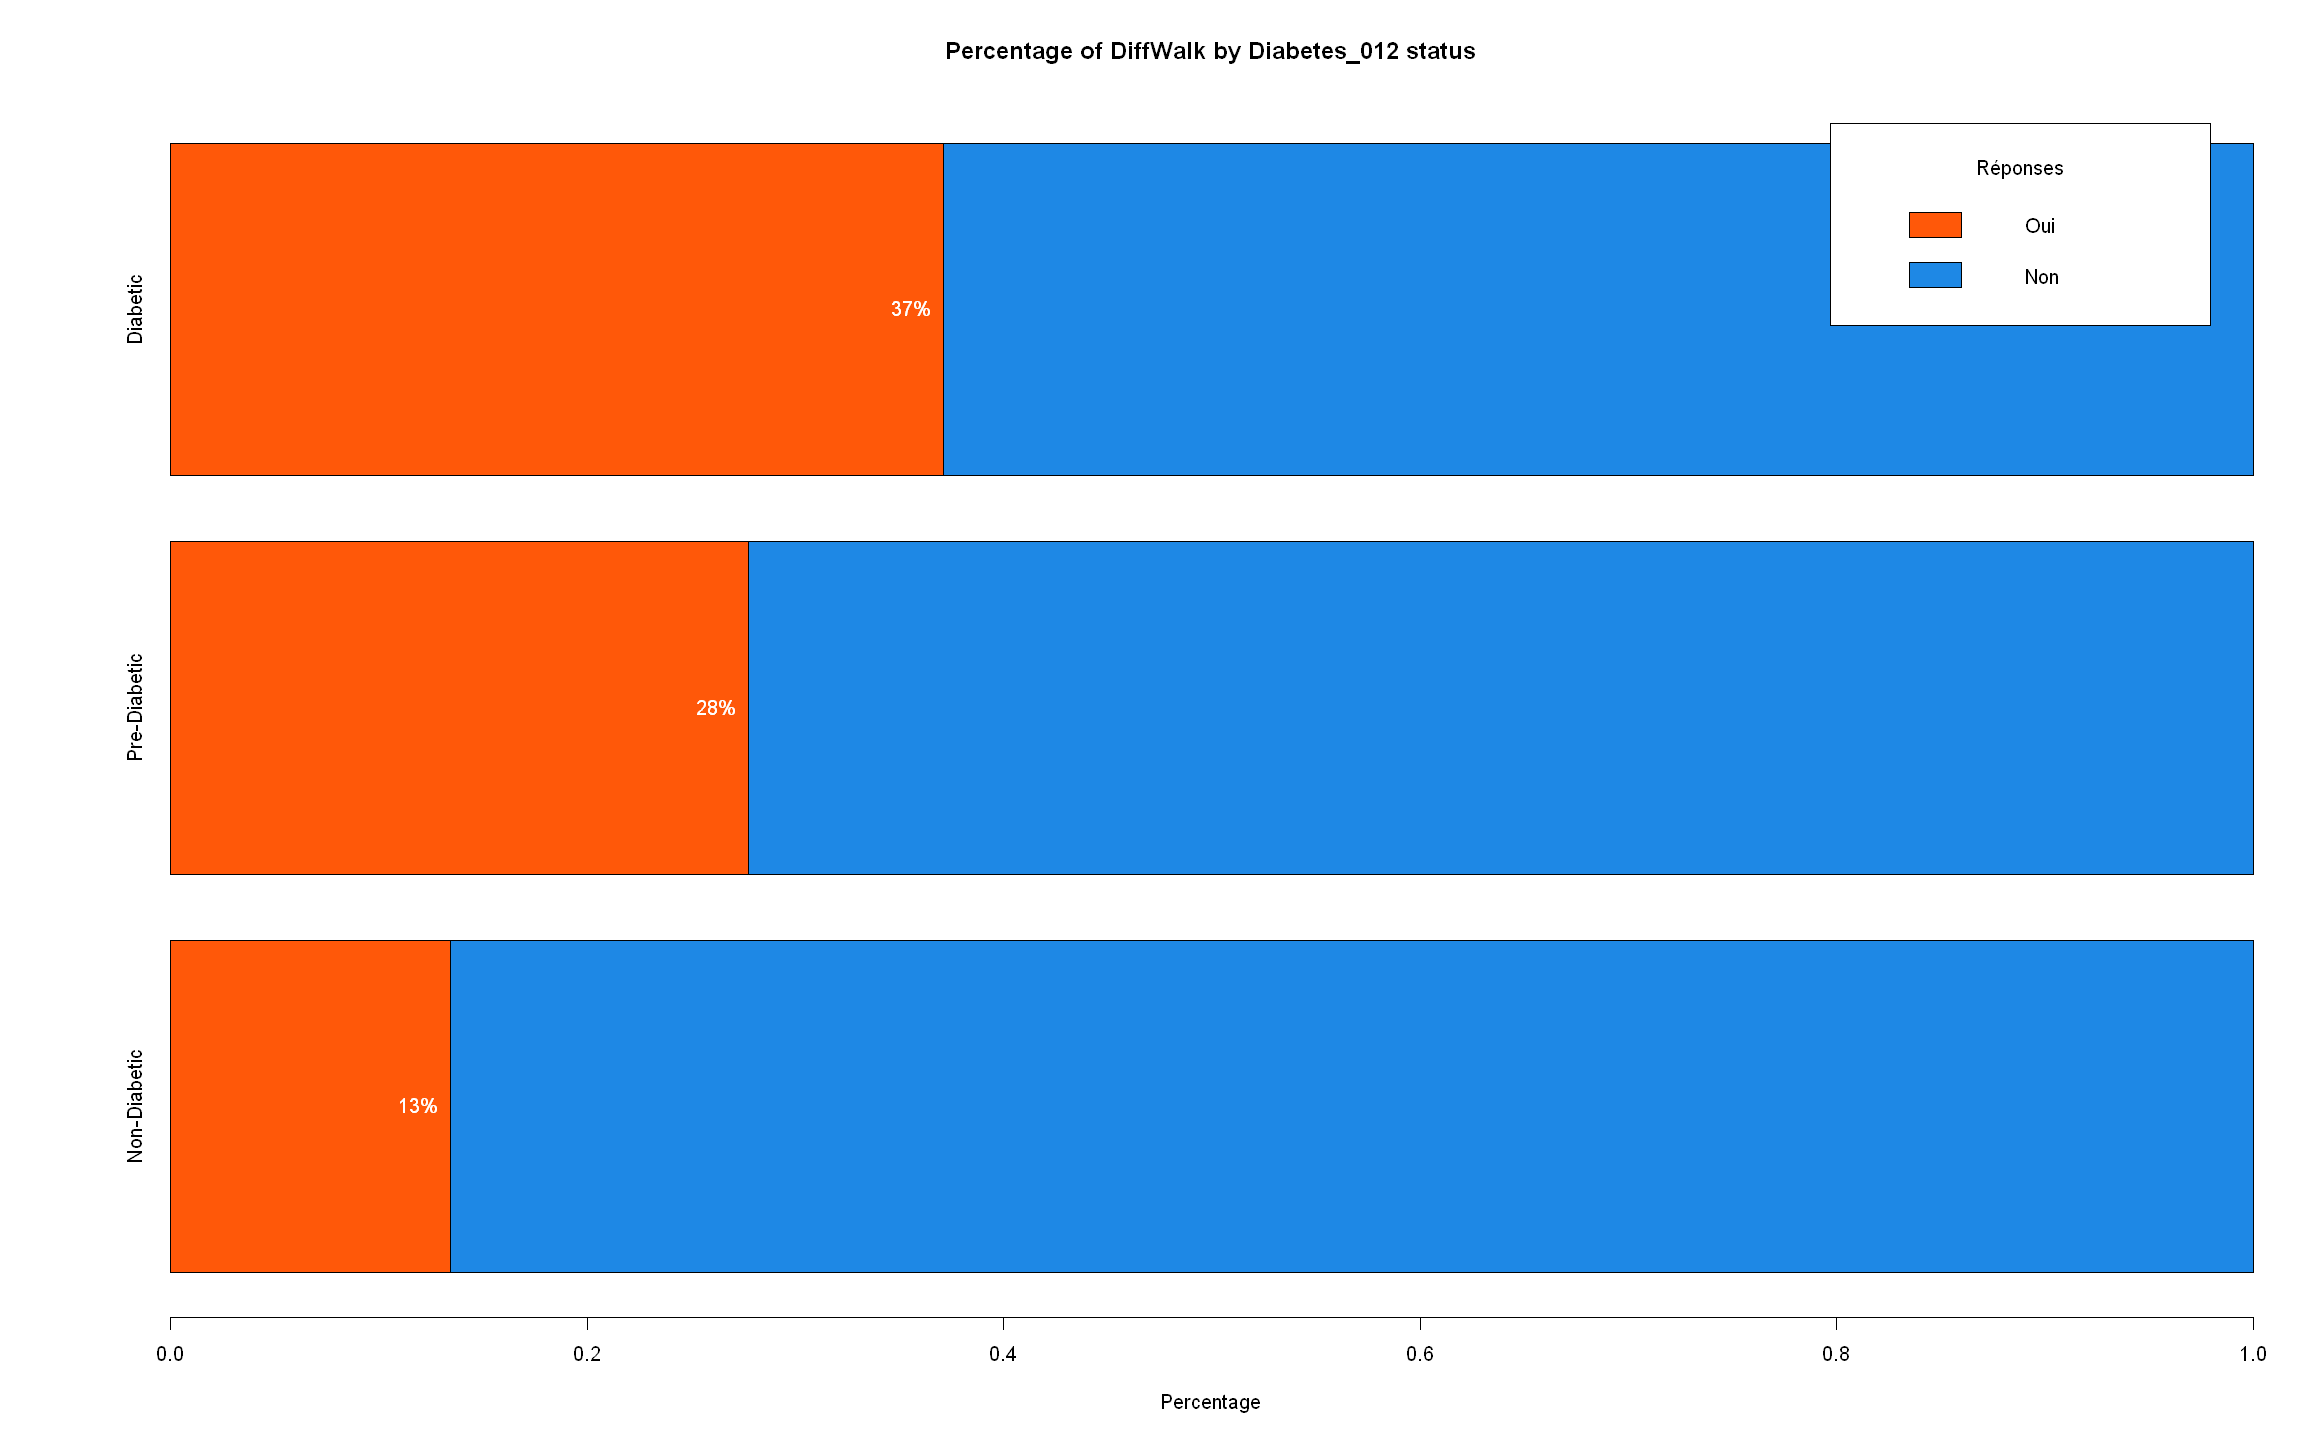

In [38]:
ratio <- 12
options(repr.plot.width = ratio*1.6, repr.plot.height = ratio)

graph_horizontal_bars_diabete(diabete_dataset1_wcc, "Diabetes_012", "HighBP")
graph_horizontal_bars_diabete(diabete_dataset1_wcc, "Diabetes_012", "HighChol")
graph_horizontal_bars_diabete(diabete_dataset1_wcc, "Diabetes_012", "PhysActivity")
graph_horizontal_bars_diabete(diabete_dataset1_wcc, "Diabetes_012", "Fruits")
graph_horizontal_bars_diabete(diabete_dataset1_wcc, "Diabetes_012", "Veggies")
graph_horizontal_bars_diabete(diabete_dataset1_wcc, "Diabetes_012", "HvyAlcoholConsump")
graph_horizontal_bars_diabete(diabete_dataset1_wcc, "Diabetes_012", "DiffWalk")

En observant les graphiques précédents, on se rend compte qu'il n'y a pas de réelles différences de proportions de comportement entre les pré-diabétiques et les diabétiques. 

Pour les variables veggies et fruits, on se rend compte que la différence est presque nulle (moins d'1 % de différence). On ne voit d'ailleurs presque aucune différence avec les personnes saines non plus (moins de 5% entre les deux catégories). Sachant que le diabète vient d'un dérèglement de l'insuline, une hormone régulatrice de la glycémie, on aurait dû voir une différence de consommation des fruits et légumes entre les différentes catégories (on rappelle que le diabète est l'un des fléau des USAs, tristesse célèbre pour avoir l'alimentation la moins saine possible). Cette différence vient sans doute de la manière dont la question a été posée (il semblerait logique de poser la question comme suit : "pensez-vous manger 5 fruits et légumes par jour ?", comme recommandé en France). 

Pour les variables DiffWalk et PhysActivity, la différence s'intensifie. Moins de diabétiques semblent faire d'activité physique (66% des prédiabétiques semblent affirmer avoir fait du sport dans les 30 derniers jour contre 83%) et plus de diabétiques ont de mal à marcher (37% des diabétiques disent avoir du mal à marcher, contre 28% pour les prédiabétiques). Dans tous les cas, les personnes saines présentent une condition physique en générale meilleur (ils font en général plus de sport (78%) et moins ont du mal à marcher (13% ont du mal)).

Pour les variables de santé physique interne HighBP et HighChol, on remarque aussi des différences accentuées entre les deux : il semble qu'une proportion plus important de diabétique présente une haute pression sanguine (75%) et un haut taux de cholestérol (67%) comparé aux prédiabétiques (respectivement 63% et 62%). Dans les deux cas, les proportions sont bien plus importantes que pour les personnes saines (respectivement 38 et 39%).

Avant de donner nos conclusions par rapport aux deux paragraphes écrit précédemment, on regarde la variable BMI :

Moyenne des BMI des sondés étant diabétiques :  31.9485
Variance des BMI des sondés étant diabétiques :  54.2249
Moyenne des BMI des sondés étant pré-diabétiques :  30.72992
Variance des BMI des sondés étant pré-diabétiques :  47.68974
Moyenne des BMI des sondés étant sains :  27.77146
Variance des BMI des sondés étant sains :  39.25788

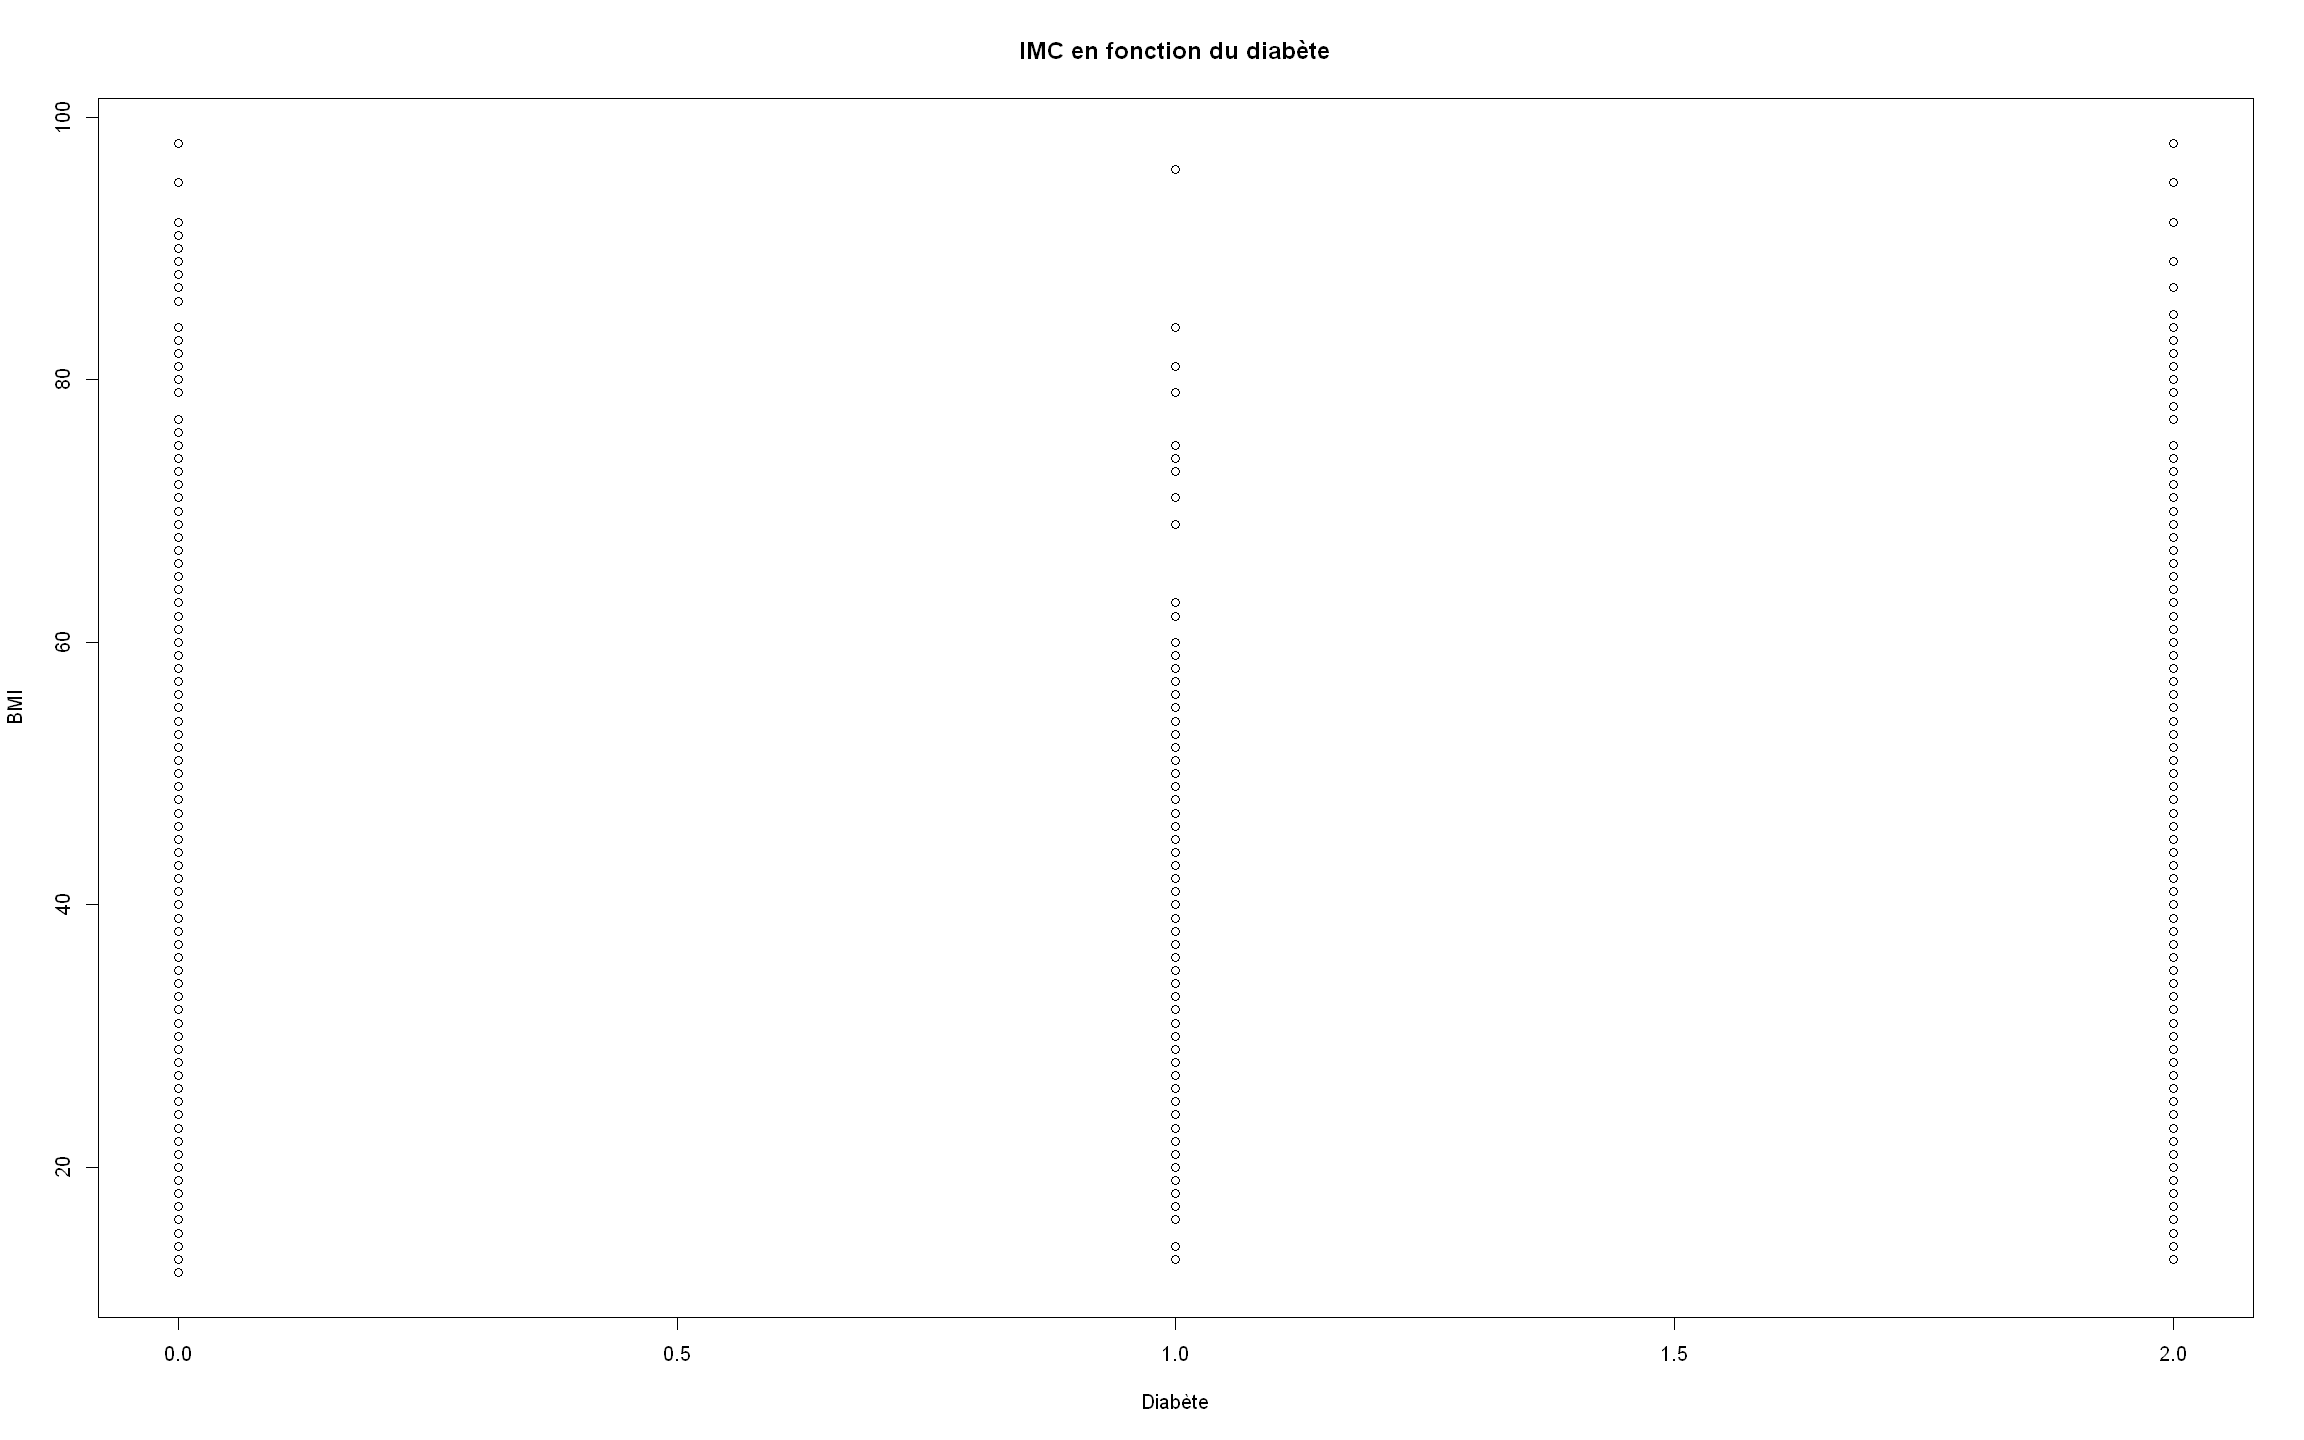

In [39]:
plot(diabete_dataset1_wcc$Diabetes_012, diabete_dataset1_wcc$BMI, xlab = "Diabète", ylab = "BMI", main = "IMC en fonction du diabète")

# IMC moyen du nombre de personnes ayant un diabète (2)
cat("Moyenne des BMI des sondés étant diabétiques : ", mean(diabete_dataset1_wcc$BMI[diabete_dataset1_wcc$Diabetes_012 == 2]))
# Variance de l'IMC du nombre de personnes ayant un diabète (2)
cat("\nVariance des BMI des sondés étant diabétiques : ", var(diabete_dataset1_wcc$BMI[diabete_dataset1_wcc$Diabetes_012 == 2]))

# IMC moyen du nombre de personnes ayant un pré-diabète (1)
cat("\nMoyenne des BMI des sondés étant pré-diabétiques : ", mean(diabete_dataset1_wcc$BMI[diabete_dataset1_wcc$Diabetes_012 == 1]))
# Variance de l'IMC du nombre de personnes ayant un pré-diabète (1)
cat("\nVariance des BMI des sondés étant pré-diabétiques : ", var(diabete_dataset1_wcc$BMI[diabete_dataset1_wcc$Diabetes_012 == 1]))

# IMC moyen du nombre de personnes n'ayant pas de diabète (0)
cat("\nMoyenne des BMI des sondés étant sains : ", mean(diabete_dataset1_wcc$BMI[diabete_dataset1_wcc$Diabetes_012 == 0]))
# Variance de l'IMC du nombre de personnes n'ayant pas de diabète (0)
cat("\nVariance des BMI des sondés étant sains : ", var(diabete_dataset1_wcc$BMI[diabete_dataset1_wcc$Diabetes_012 == 0]))

On se rend compte qu'en moyenne, l'IMC des personnes diabétiques et pré-diabétiques est plus élevé (31,95 et 30,72, résultats relativement proche l'un de l'autre) que celui des personnes saines (27.7). De plus, leur variance est aussi beaucoup plus élevé.

En conclusion (on ne concluera ici que sur l'intérêt de garder les prédiabétiques pour l'analyse), on se rend compte qu'il ne font réellement que l'intermédiaire entre les diabétiques et les personnes saines. Leur intérêt est donc limité puisqu'ils ne montrent aucuns changement de mode de vie ou de mode de consommation alimentaires. L'intéret d'avoir une section prédiabétique aurait sans doute été plus intéressante avec des questions mieux posées ou plus orienté sur du comportement individuel. De plus, leur faible présence (seulement 1.9%) dans le dataset les rends négligeable par rapport aux autres (97,7% en cumulé).

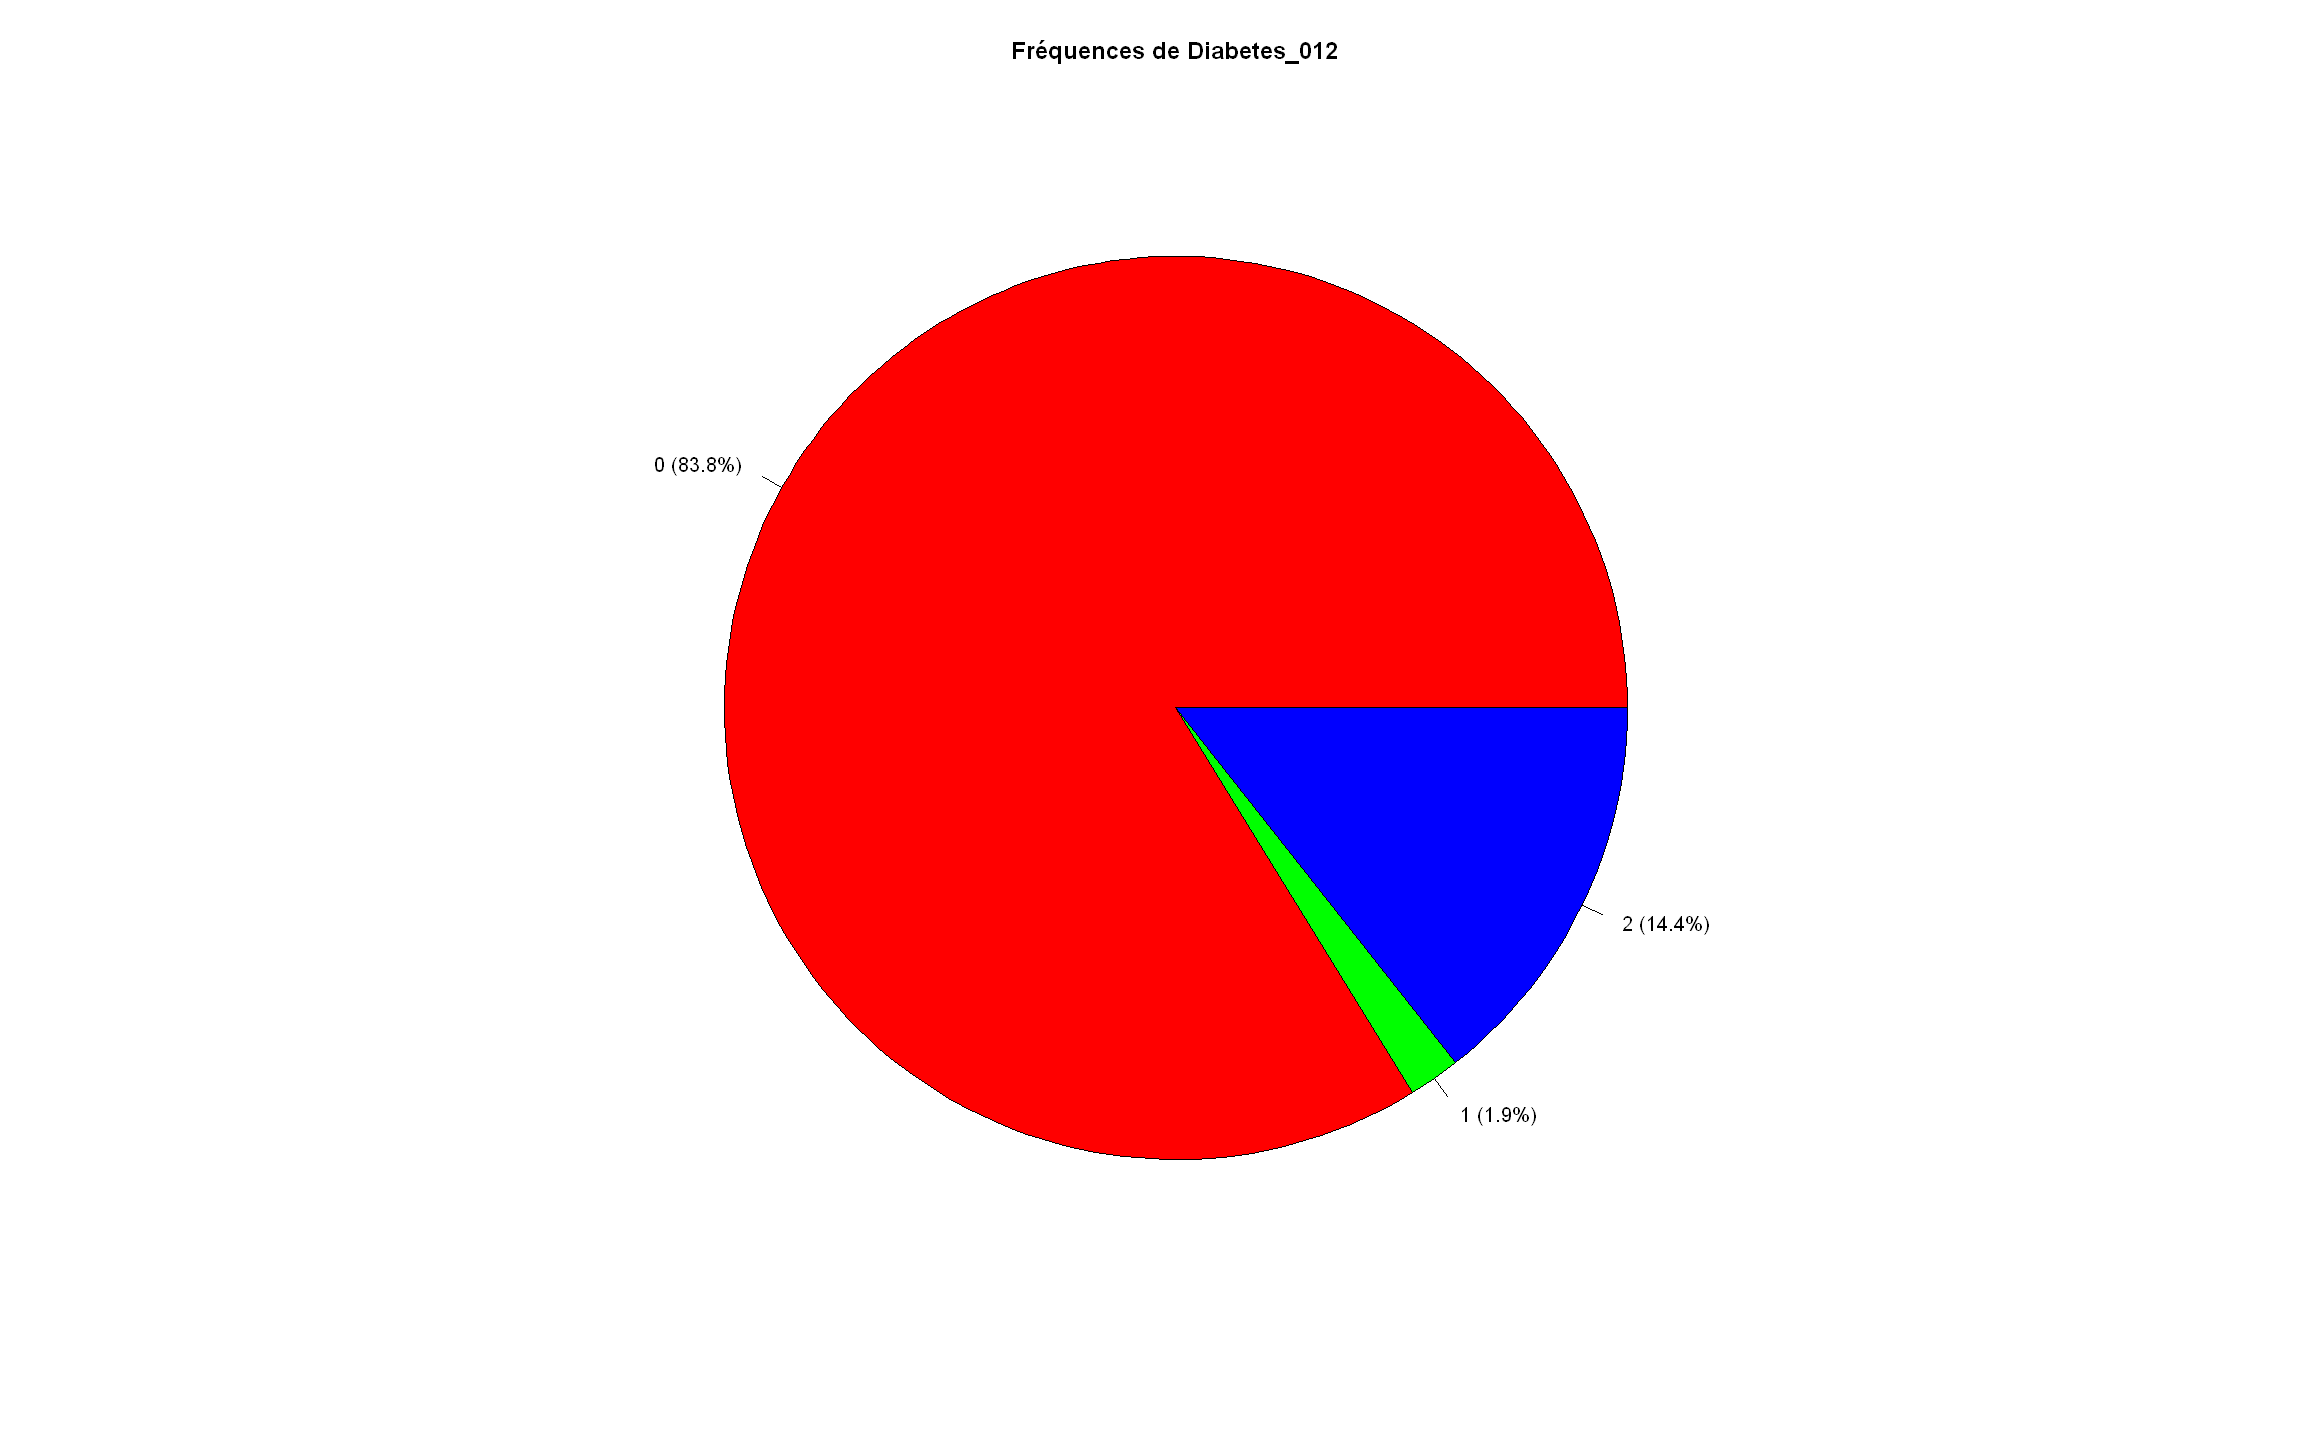

In [40]:
graph_pie(diabete_dataset1_wcc, "Diabetes_012")

#### **Sains - Diabétique**

Comme dit précédemment, on se focalise maintenant sur le ```dataset numéro 3```, ne considérant plus les pré-diabétiques. On part dorénavant sur une analyse détaillée de l'impact dee toutes les variables sur la différenciation sain-diabétique, notamment les variables financières. 

En effet, le système de santé américain est fait de telle sorte que les soins coûtes chères et jouent donc un rôle important chez eux sur le développement de certaines pathologies.

#### Relation entre les variables

Pour comprendre le lien qui relie les variables (qui est corrélé avec qui), on se sert de la correlation map :


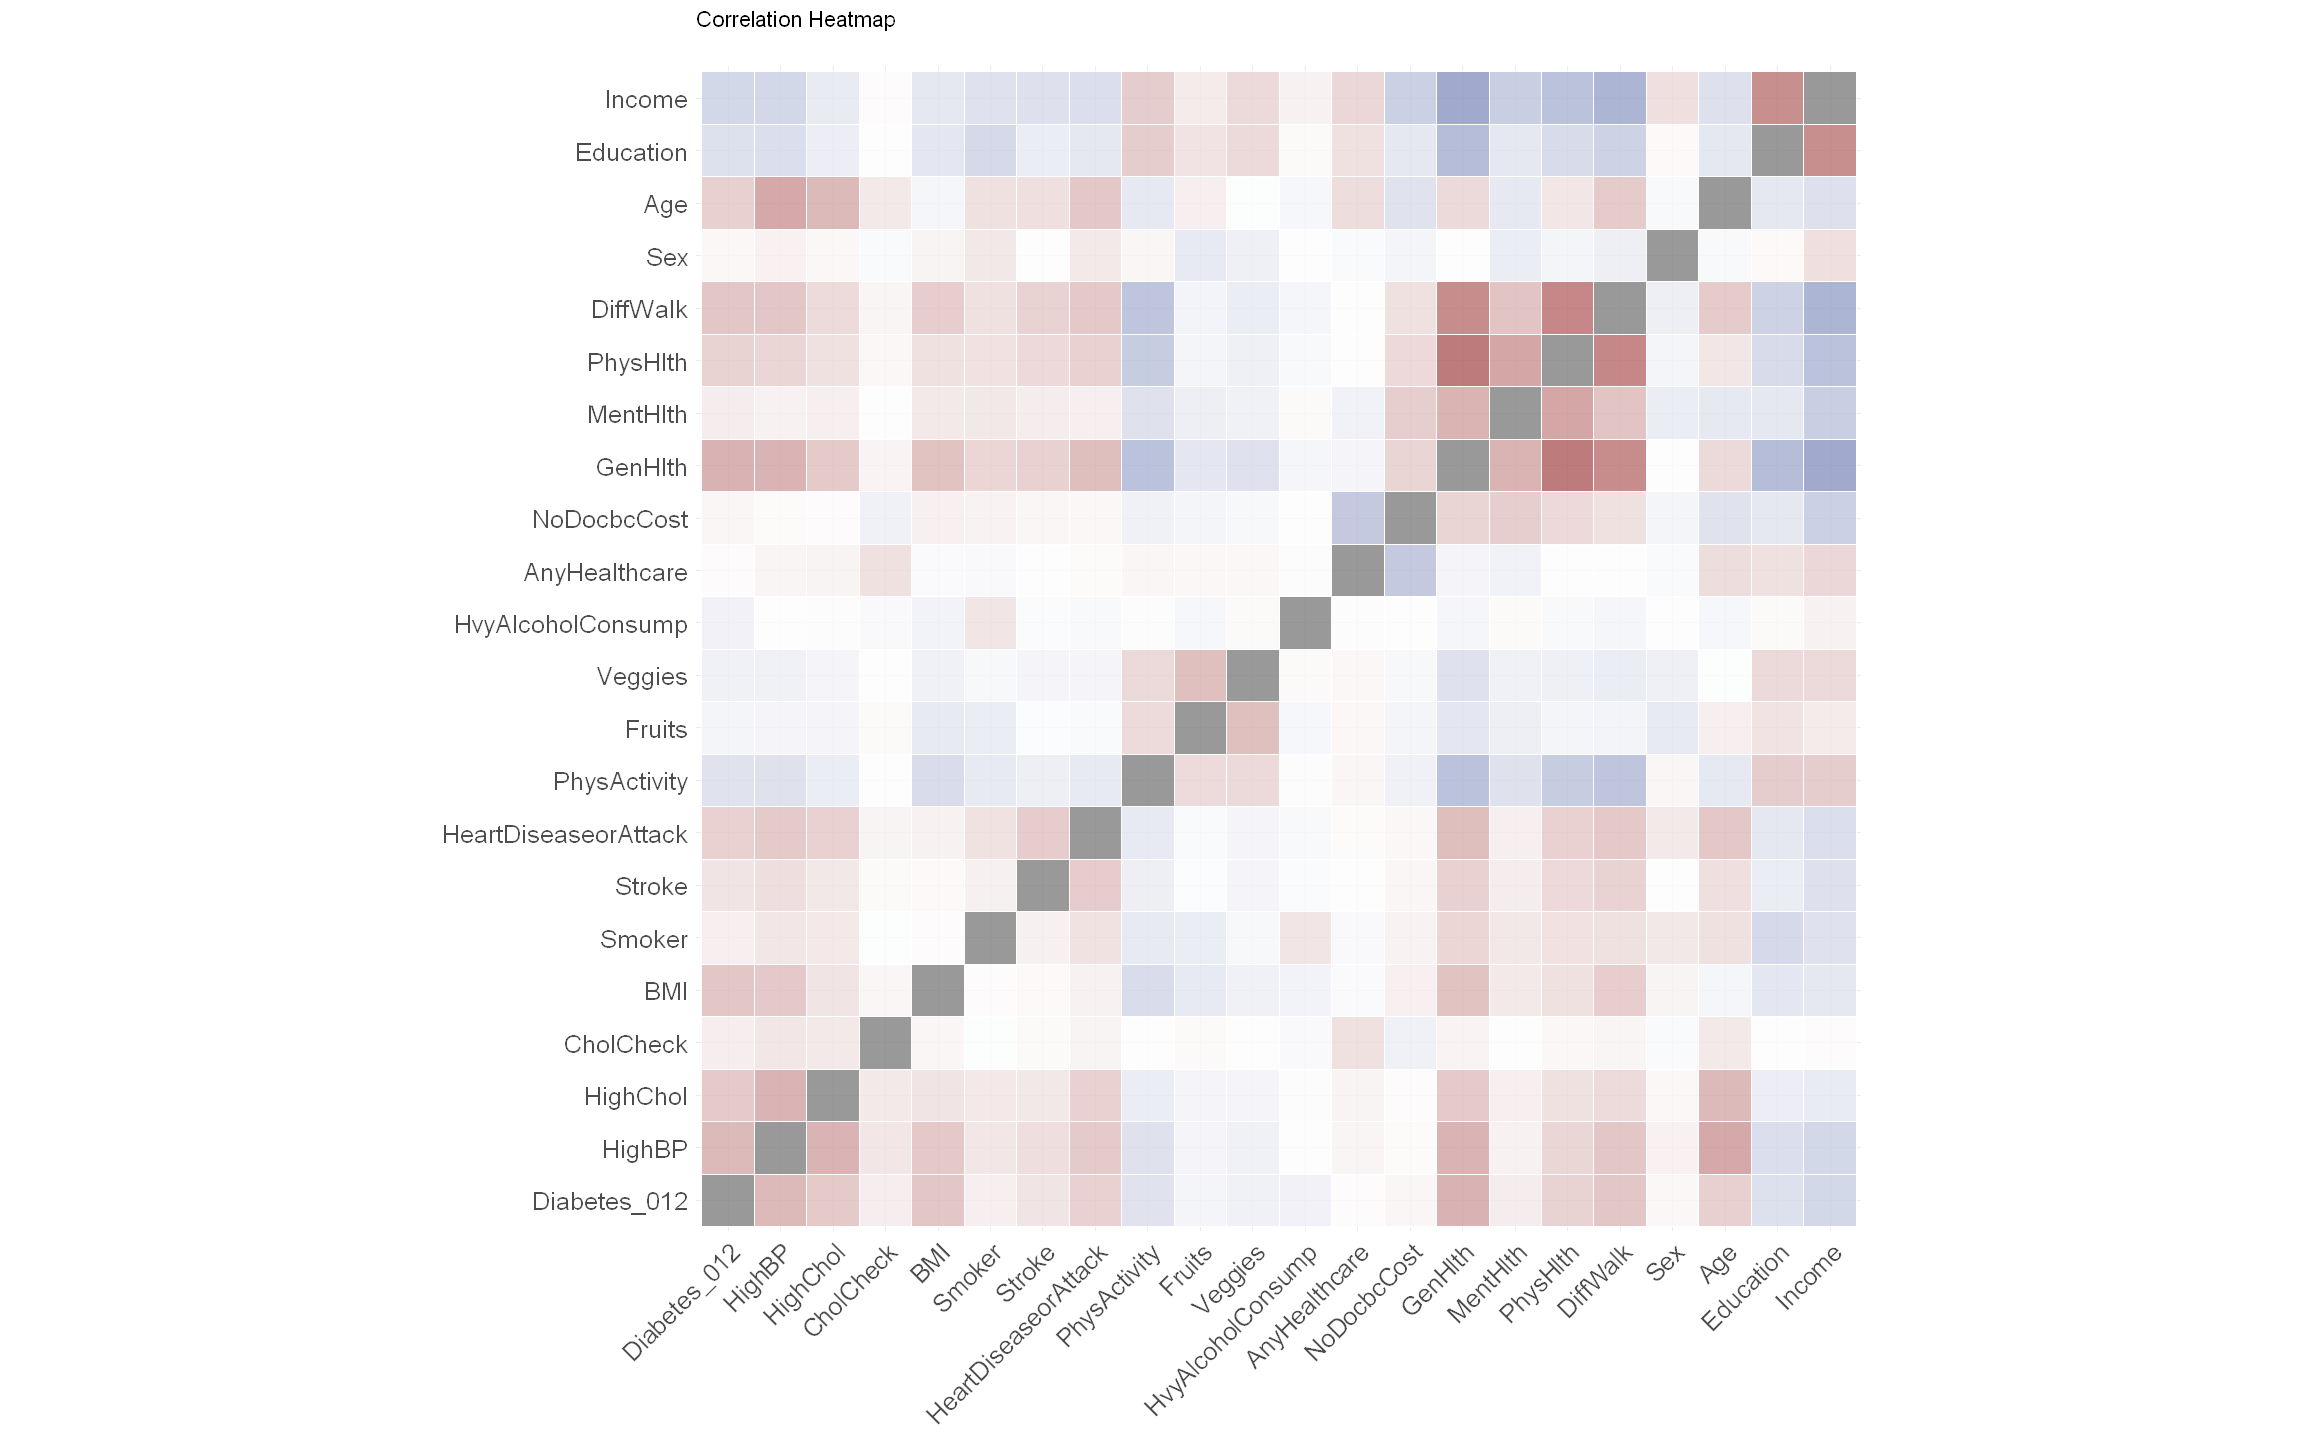

In [41]:
correlation_map(diabete_dataset3_wcc)

On se concentre sur les variables dont le taux de corrélation est élevé :

**Corrélation positive :**

Les variables GenHlth, PhysHlth et DiffWalk sont les trois variables les plus corrélées positivement dans notre dataset. Il semblerait donc que la la difficulté à marcher soit une composante de la mesure de la santé physique et de la santé générale. De même, il semblemerait que la santé physique fasse partie de la mesure de la santé générale.
Les variables Education et Income semblent aussi être fortement corrélé, indiquant sûrement un lien entre le niveau d'éducation et le salaire d'un individu (ce qui de chez nous semble logique, mais qui l'est moins au USA en raison du fait que les entrepreneurs sont les plus riches mais pas forcément les plus éduqués).

**Corrélation négative :**

Les deux variables les plus corrélées négativement sont GenHlth et Income (évidemment DiffWalk mais elle à une corrélation positive avec GenHlth). Cela laisse à penser que les gens les moins fortunés, ayant une plus grande difficulté d'accés aux soins 



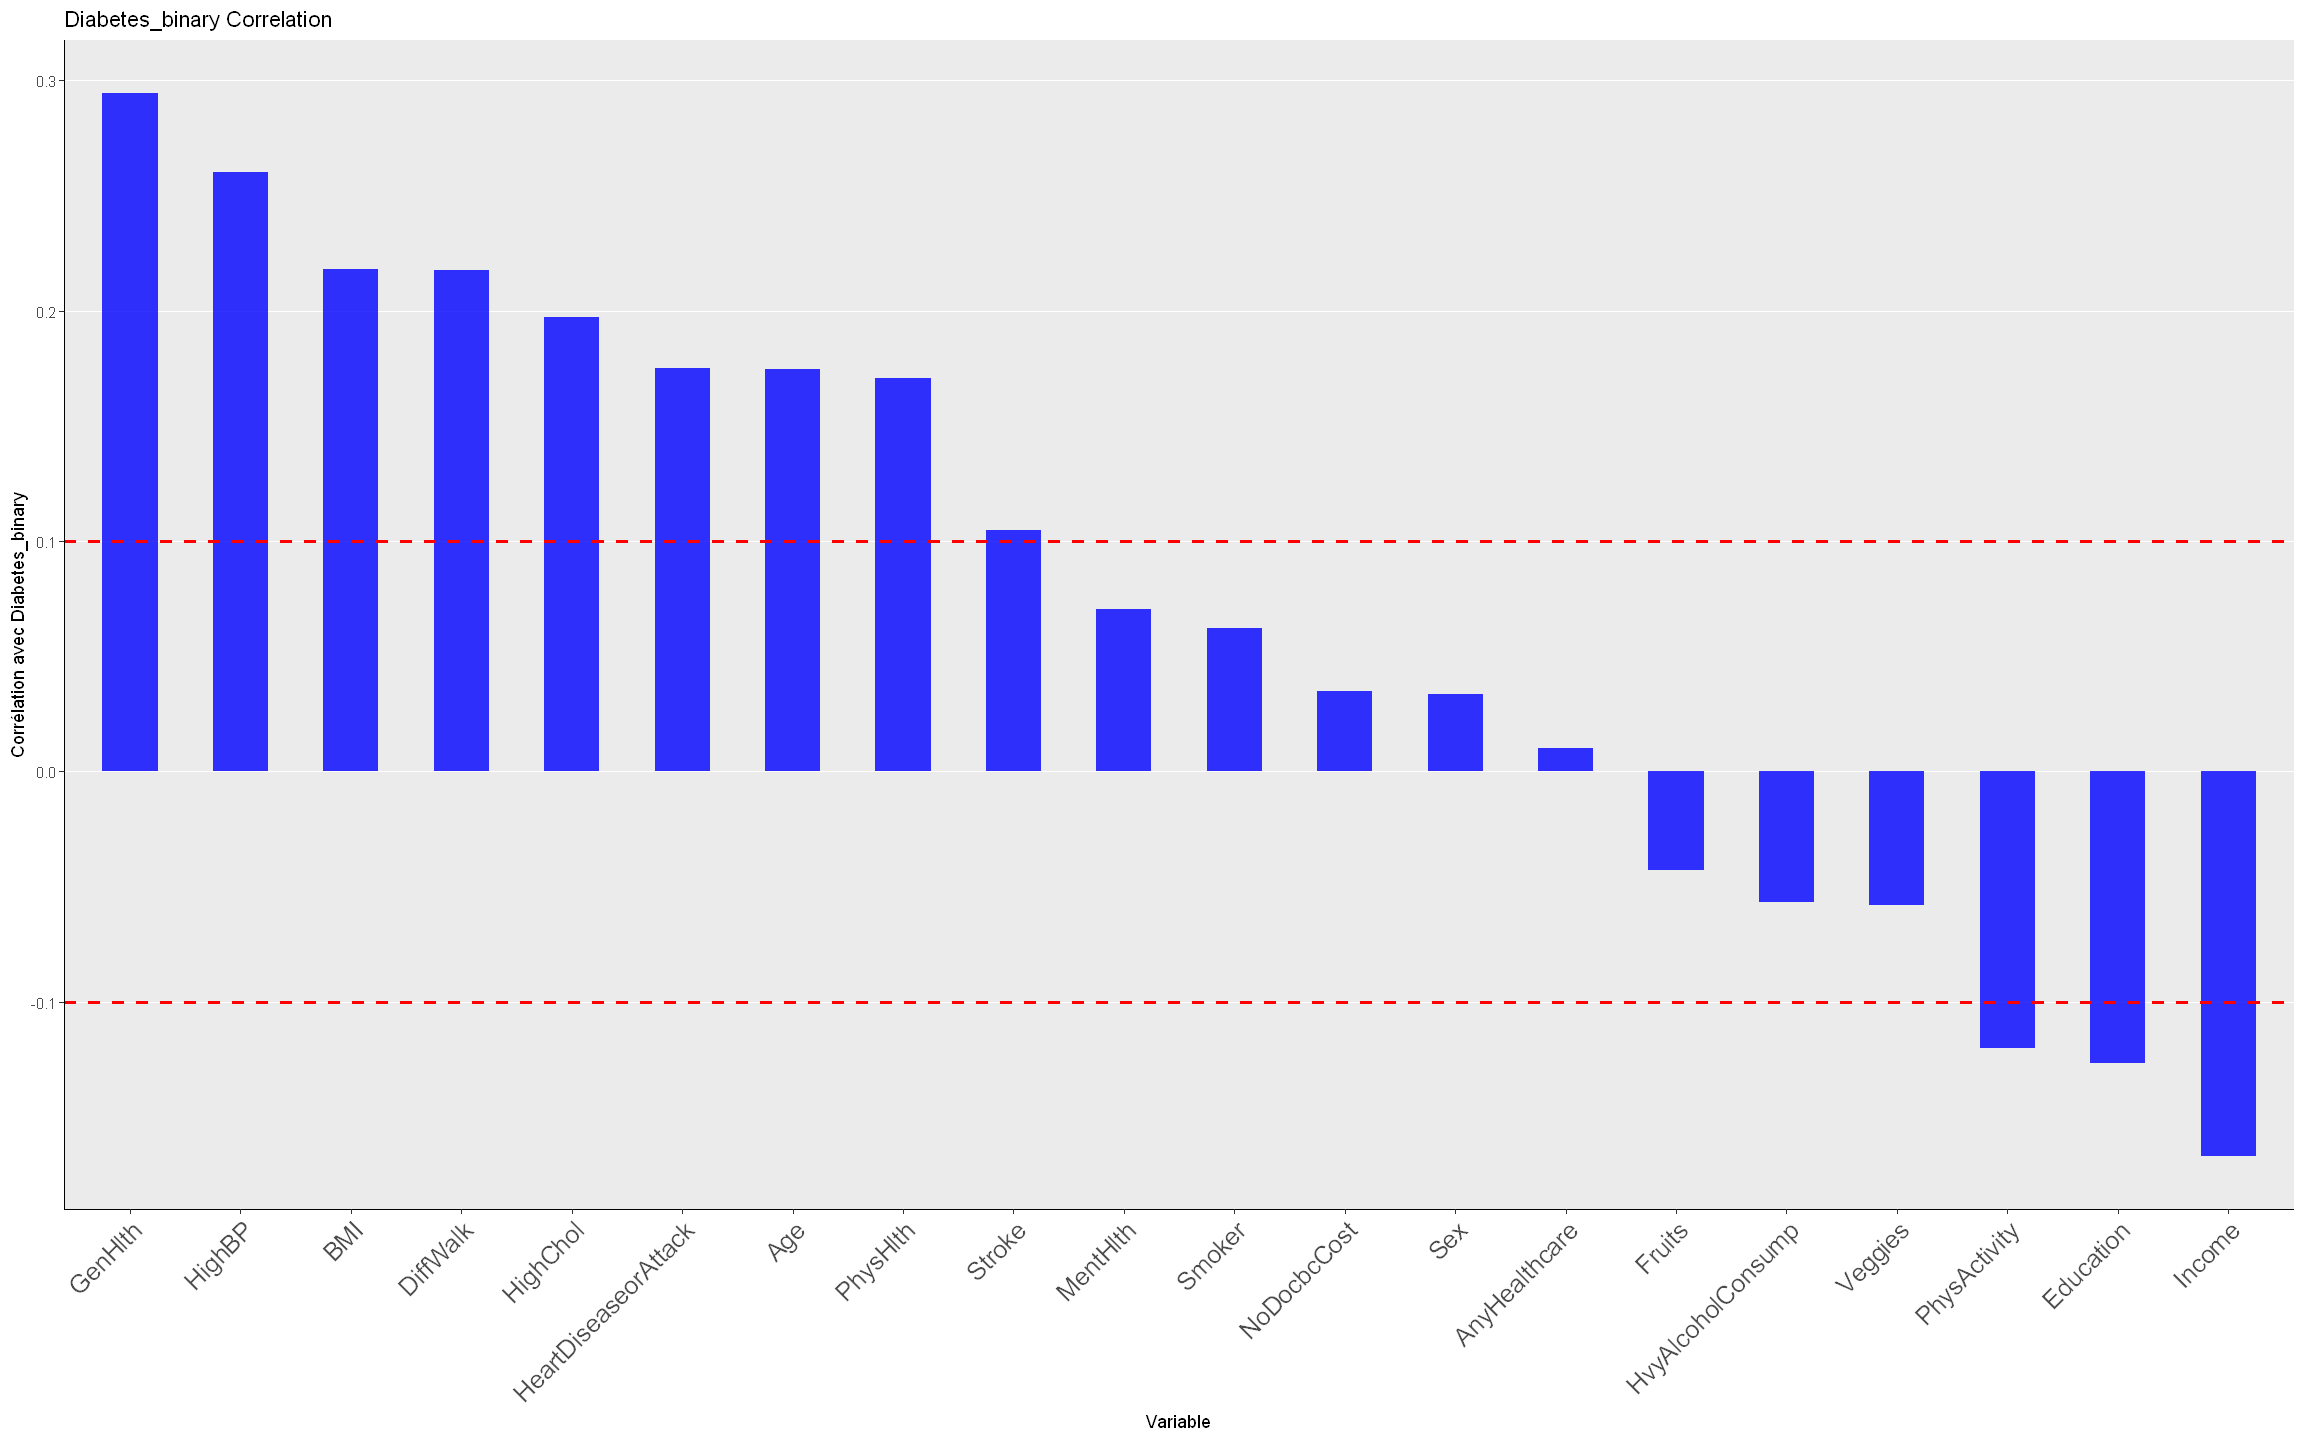

In [45]:
dudu <- diabete_dataset3_wcc %>% 
  select(-Diabetes_binary) %>% 
  cor(., diabete_dataset3_wcc$Diabetes_binary) %>% 
  as.data.frame() %>% 
  arrange(desc(V1)) %>% 
  ggplot(aes(x = reorder(row.names(.), -V1), y = V1)) + 
  geom_bar(stat="identity", fill="blue", alpha=0.8, width=0.5) +
  labs(x = "Variable", y = "Corrélation avec Diabetes_binary", title = "Diabetes_binary Correlation") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
        panel.border = element_blank(), panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank(), axis.line = element_line(colour = "black"))

# Add the hlines
dudu <- dudu + geom_hline(yintercept = 0.1, linetype = "dashed", color = "red", linewidth = 1) +
  geom_hline(yintercept = -0.1, linetype = "dashed", color = "red", linewidth = 1)

dudu

##### a - Retour sur l'IMC

Pour reprendre l'analyse précédente, on observe certaines différences en observant les IMC des diabétiques et non-diabétiques :

Différence entre l'IMC moyen des personnes ayant un diabète et des personnes saines :  4.112396
Variance des IMC des sondés étant diabétiques :  54.2249
Variance des IMC des sondés étant sains :  39.62895

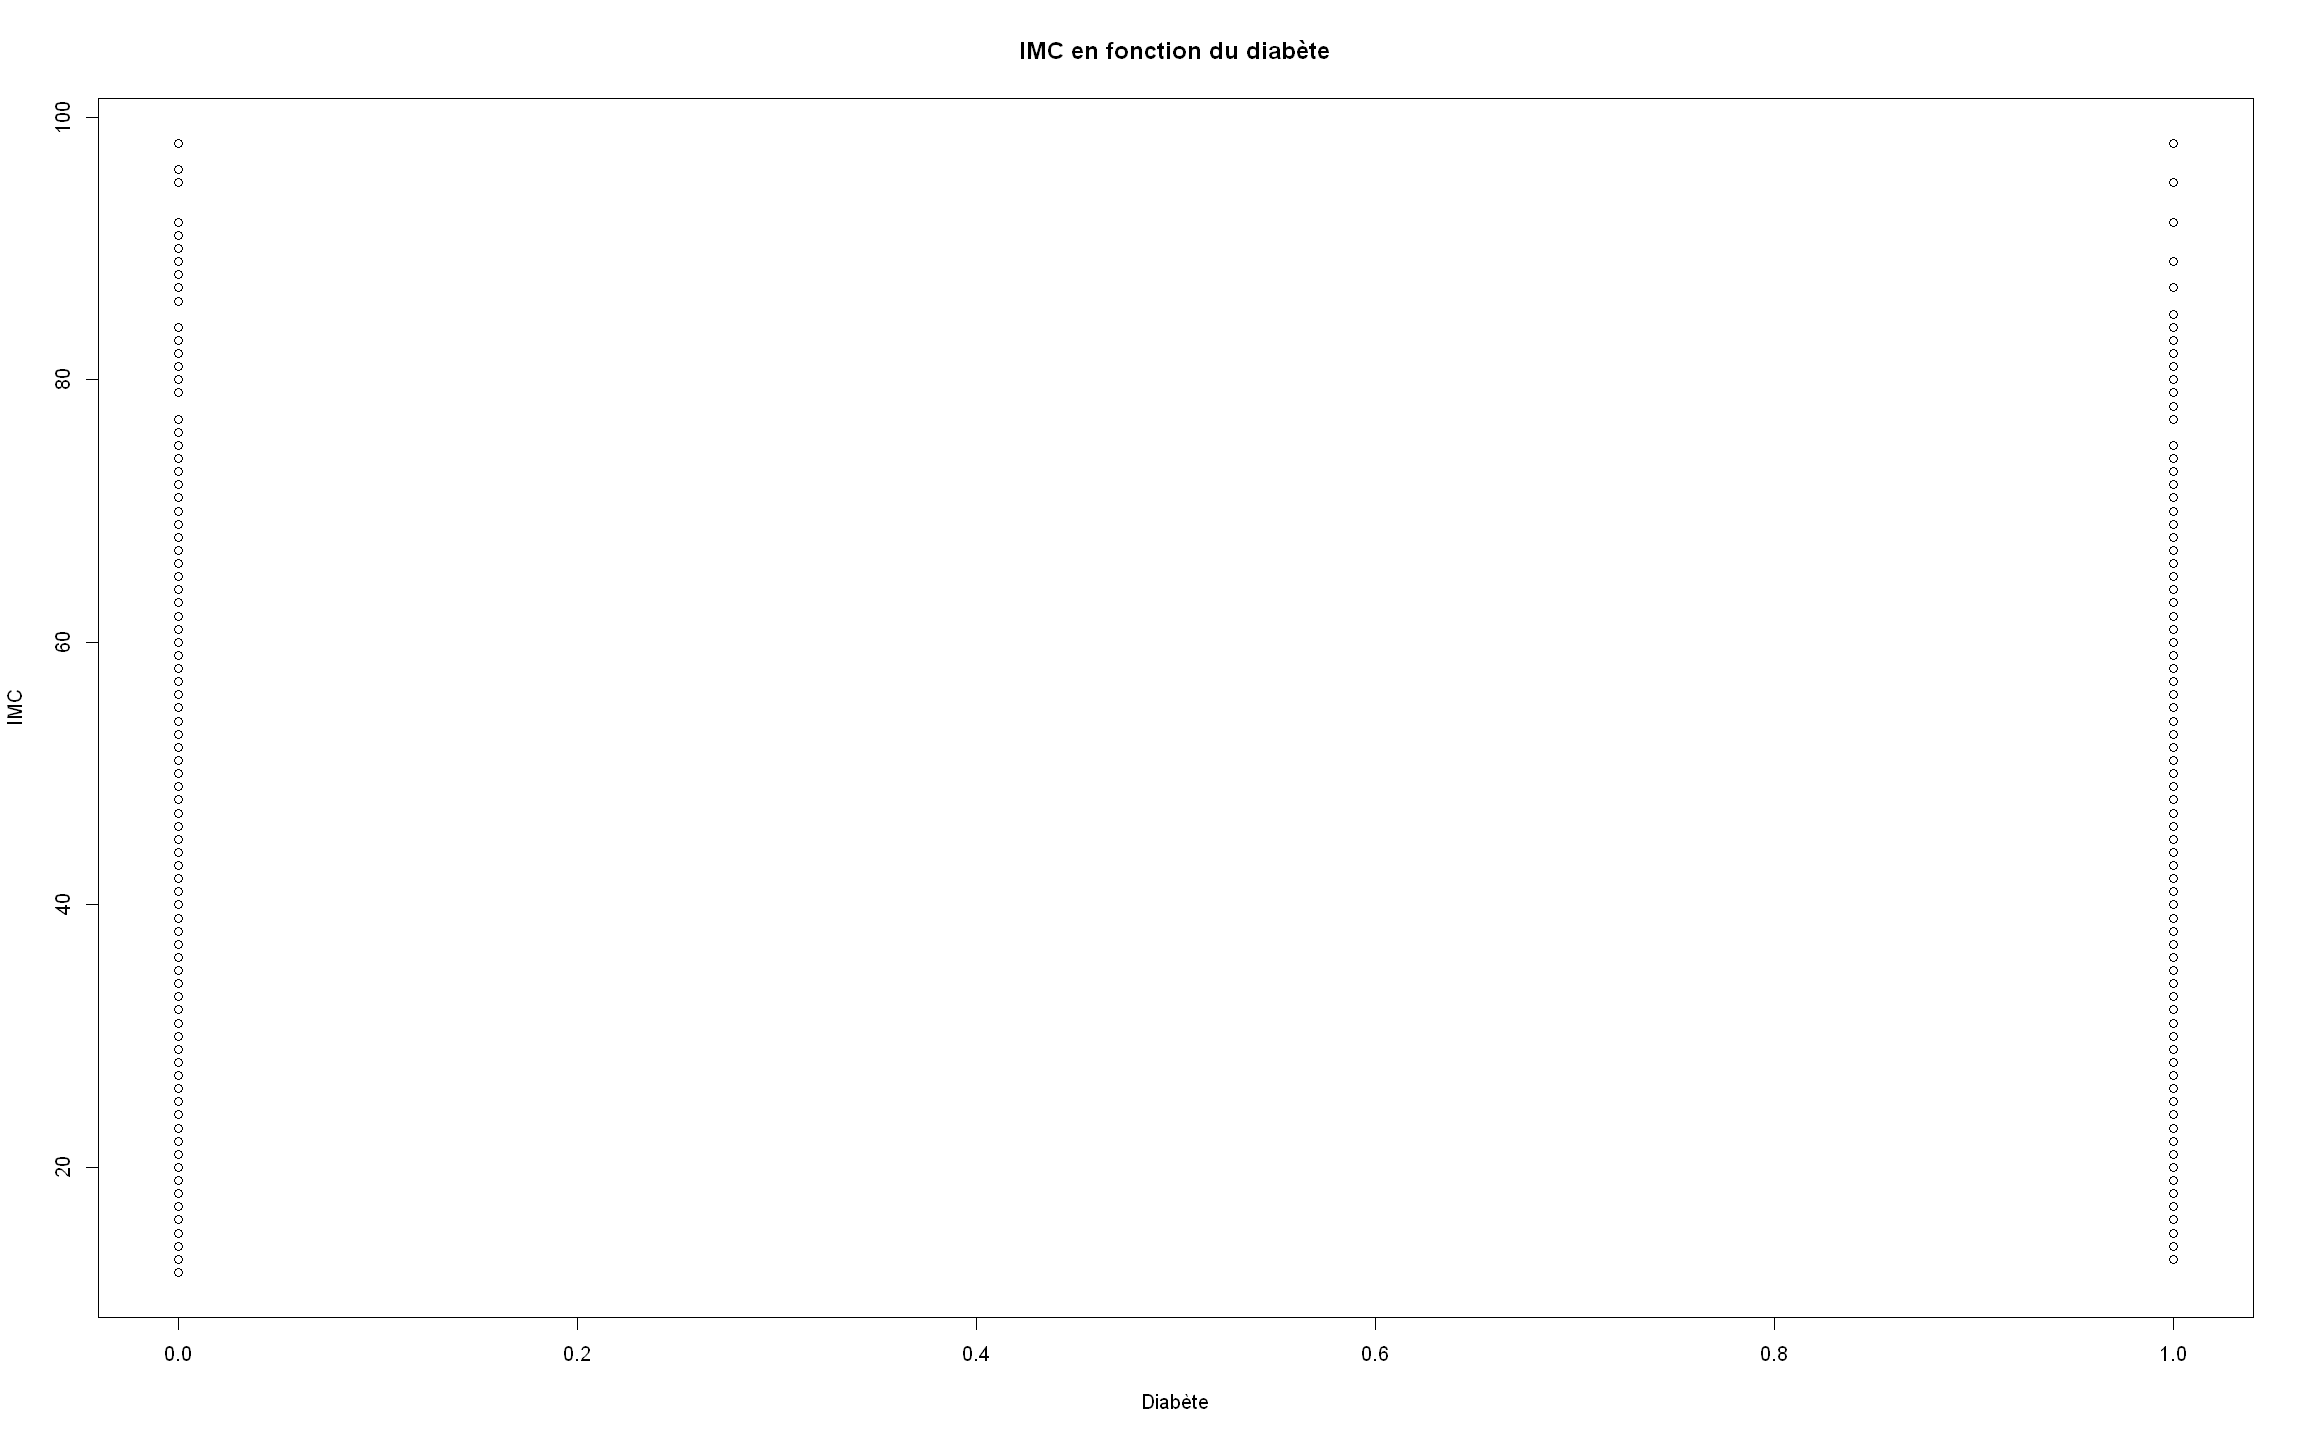

In [17]:
plot(diabete_dataset3_wcc$Diabetes_binary, diabete_dataset3_wcc$BMI, xlab = "Diabète", ylab = "IMC", main = "IMC en fonction du diabète")


# Différence entre l'IMC moyen du nombre de personnes ayant un diabète (1) et l'IMC moyen du nombre de personnes n'ayant pas de diabète (0)
cat("Différence entre l'IMC moyen des personnes ayant un diabète et des personnes saines : ", mean(diabete_dataset3_wcc$BMI[diabete_dataset3_wcc$Diabetes_binary == 1]) - mean(diabete_dataset3_wcc$BMI[diabete_dataset3_wcc$Diabetes_binary == 0]))

# Variance de l'IMC du nombre de personnes ayant un diabète (1)
cat("\nVariance des IMC des sondés étant diabétiques : ", var(diabete_dataset3_wcc$BMI[diabete_dataset3_wcc$Diabetes_binary == 1]))
# Variance de l'IMC du nombre de personnes n'ayant pas de diabète (0)
cat("\nVariance des IMC des sondés étant sains : ", var(diabete_dataset3_wcc$BMI[diabete_dataset3_wcc$Diabetes_binary == 0]))

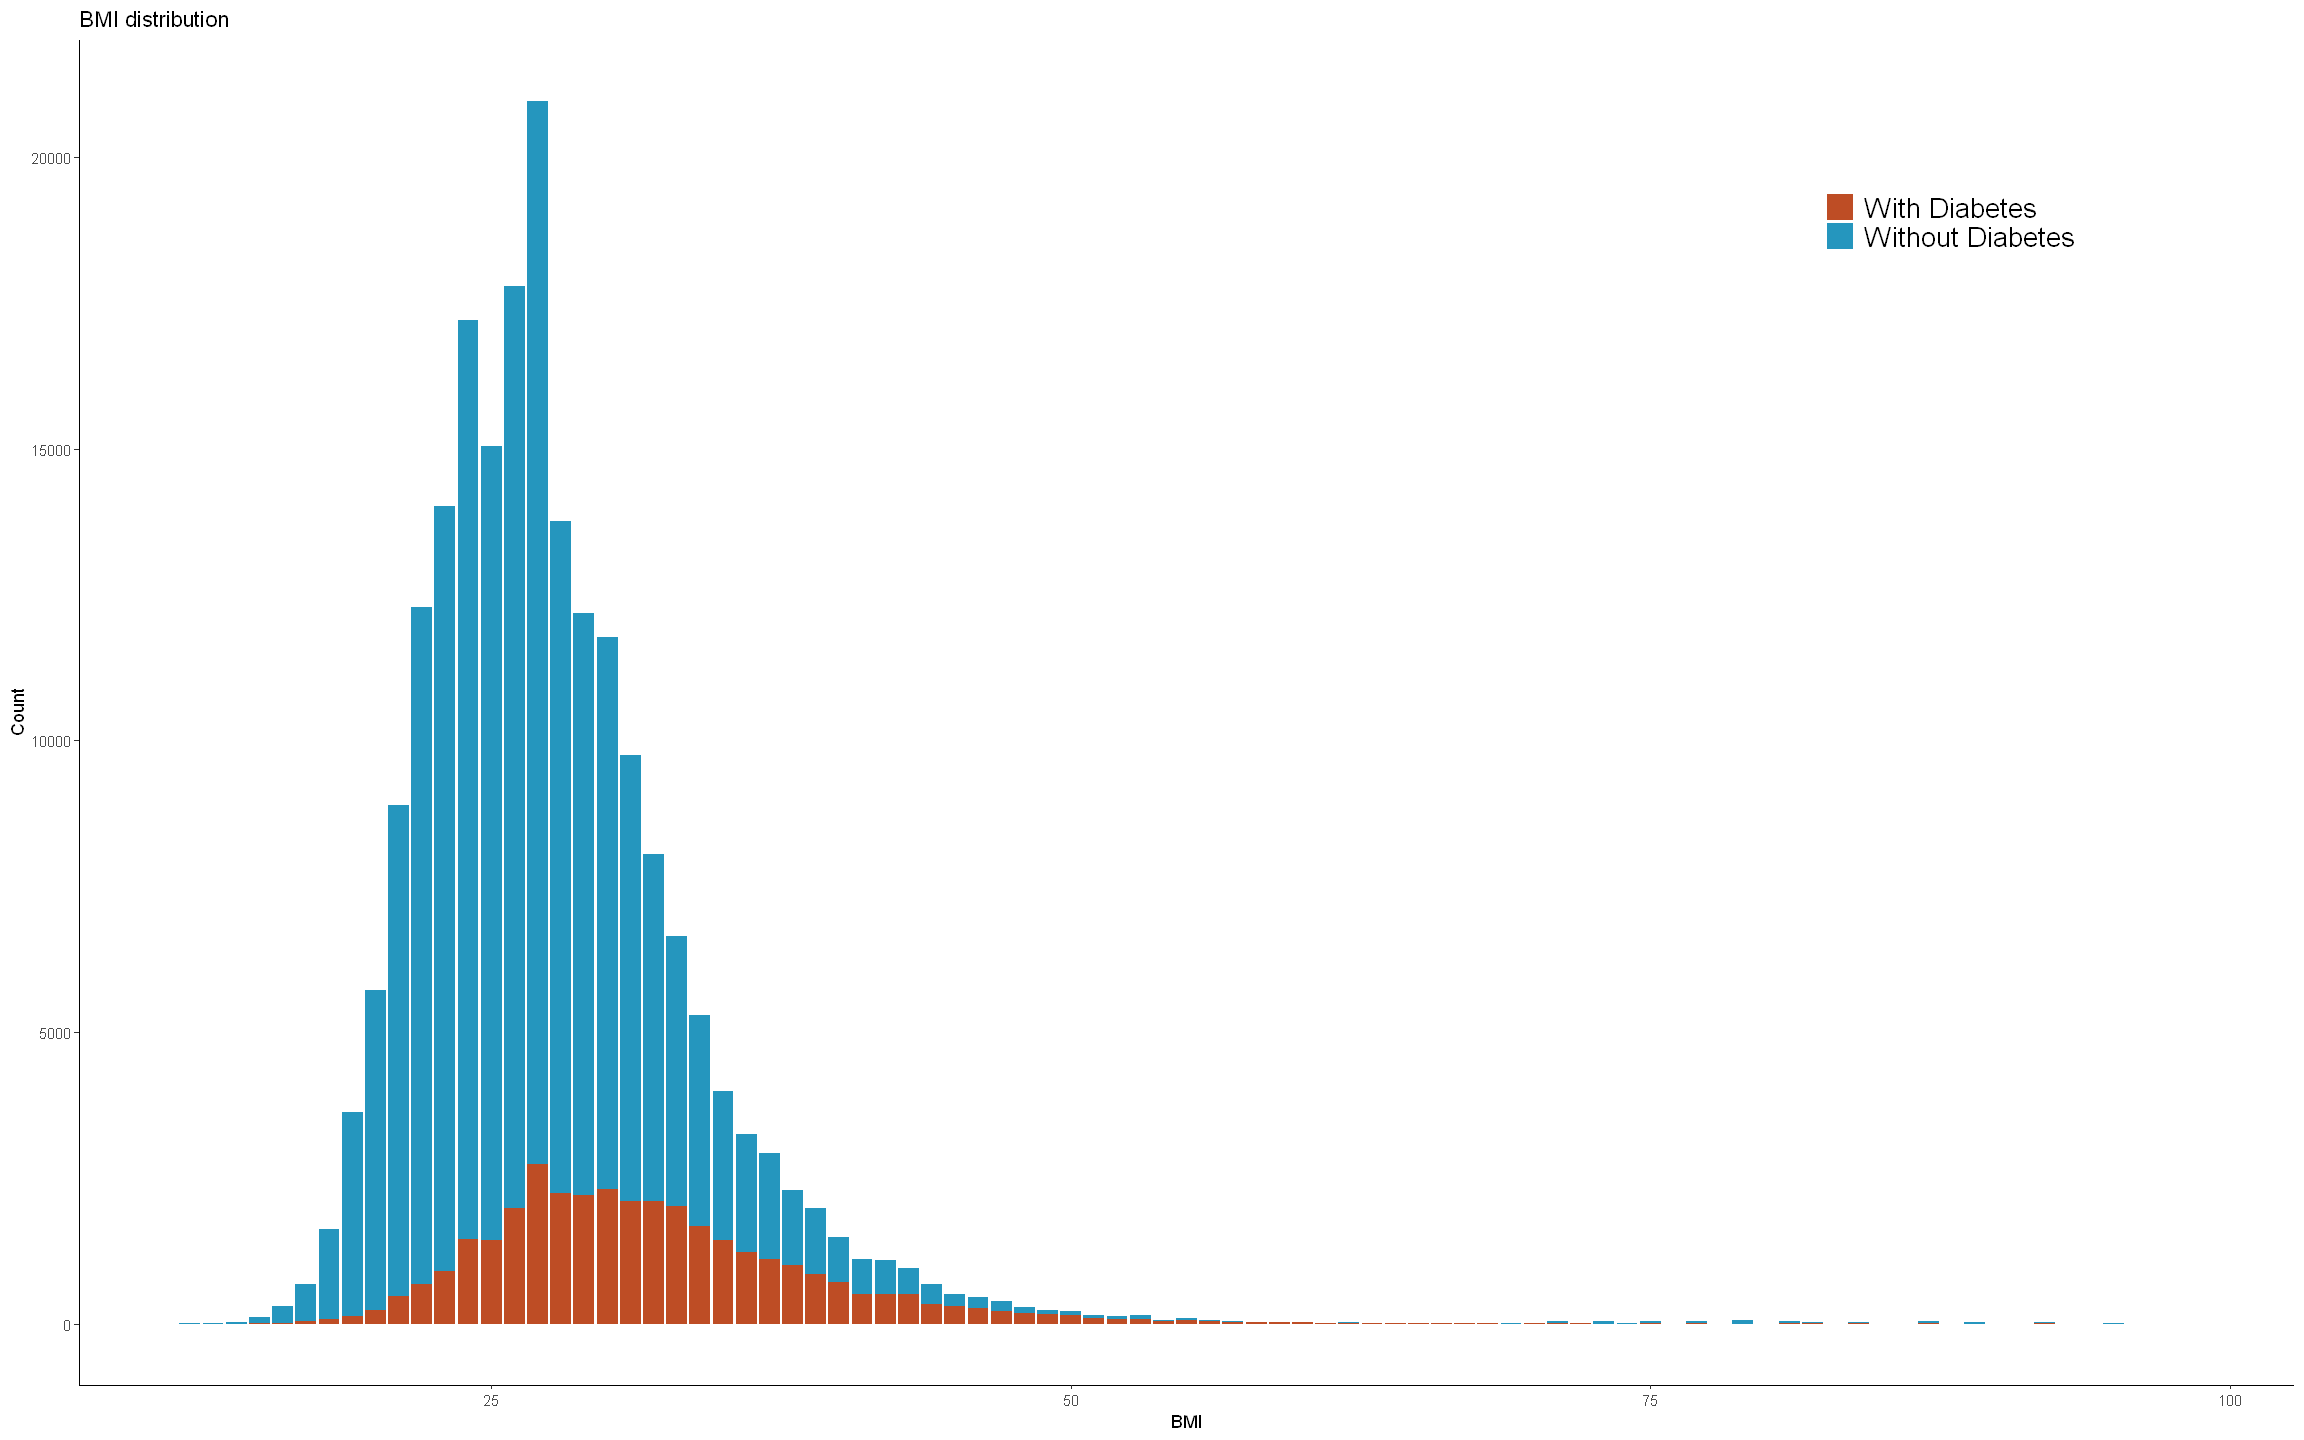

In [18]:
library(ggplot2)
ratio <- 12
options(repr.plot.width = ratio*1.6, repr.plot.height = ratio)

colors <- c('#be4d25', '#2596be')

ggplot(data = diabete_dataset3_wcc[diabete_dataset3_wcc$Diabetes_binary == 0,], aes(x = BMI, fill = "Without Diabetes")) + 
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_bar(data = diabete_dataset3_wcc[diabete_dataset3_wcc$Diabetes_binary == 1,], aes(fill = "With Diabetes")) +
  labs(title = "BMI distribution", x = "BMI", y = "Count") +
  theme_classic() +
  theme(legend.position = c(0.9, 0.9), legend.justification = c("right", "top"), 
        legend.title = element_blank(), legend.text = element_text(size = 16))

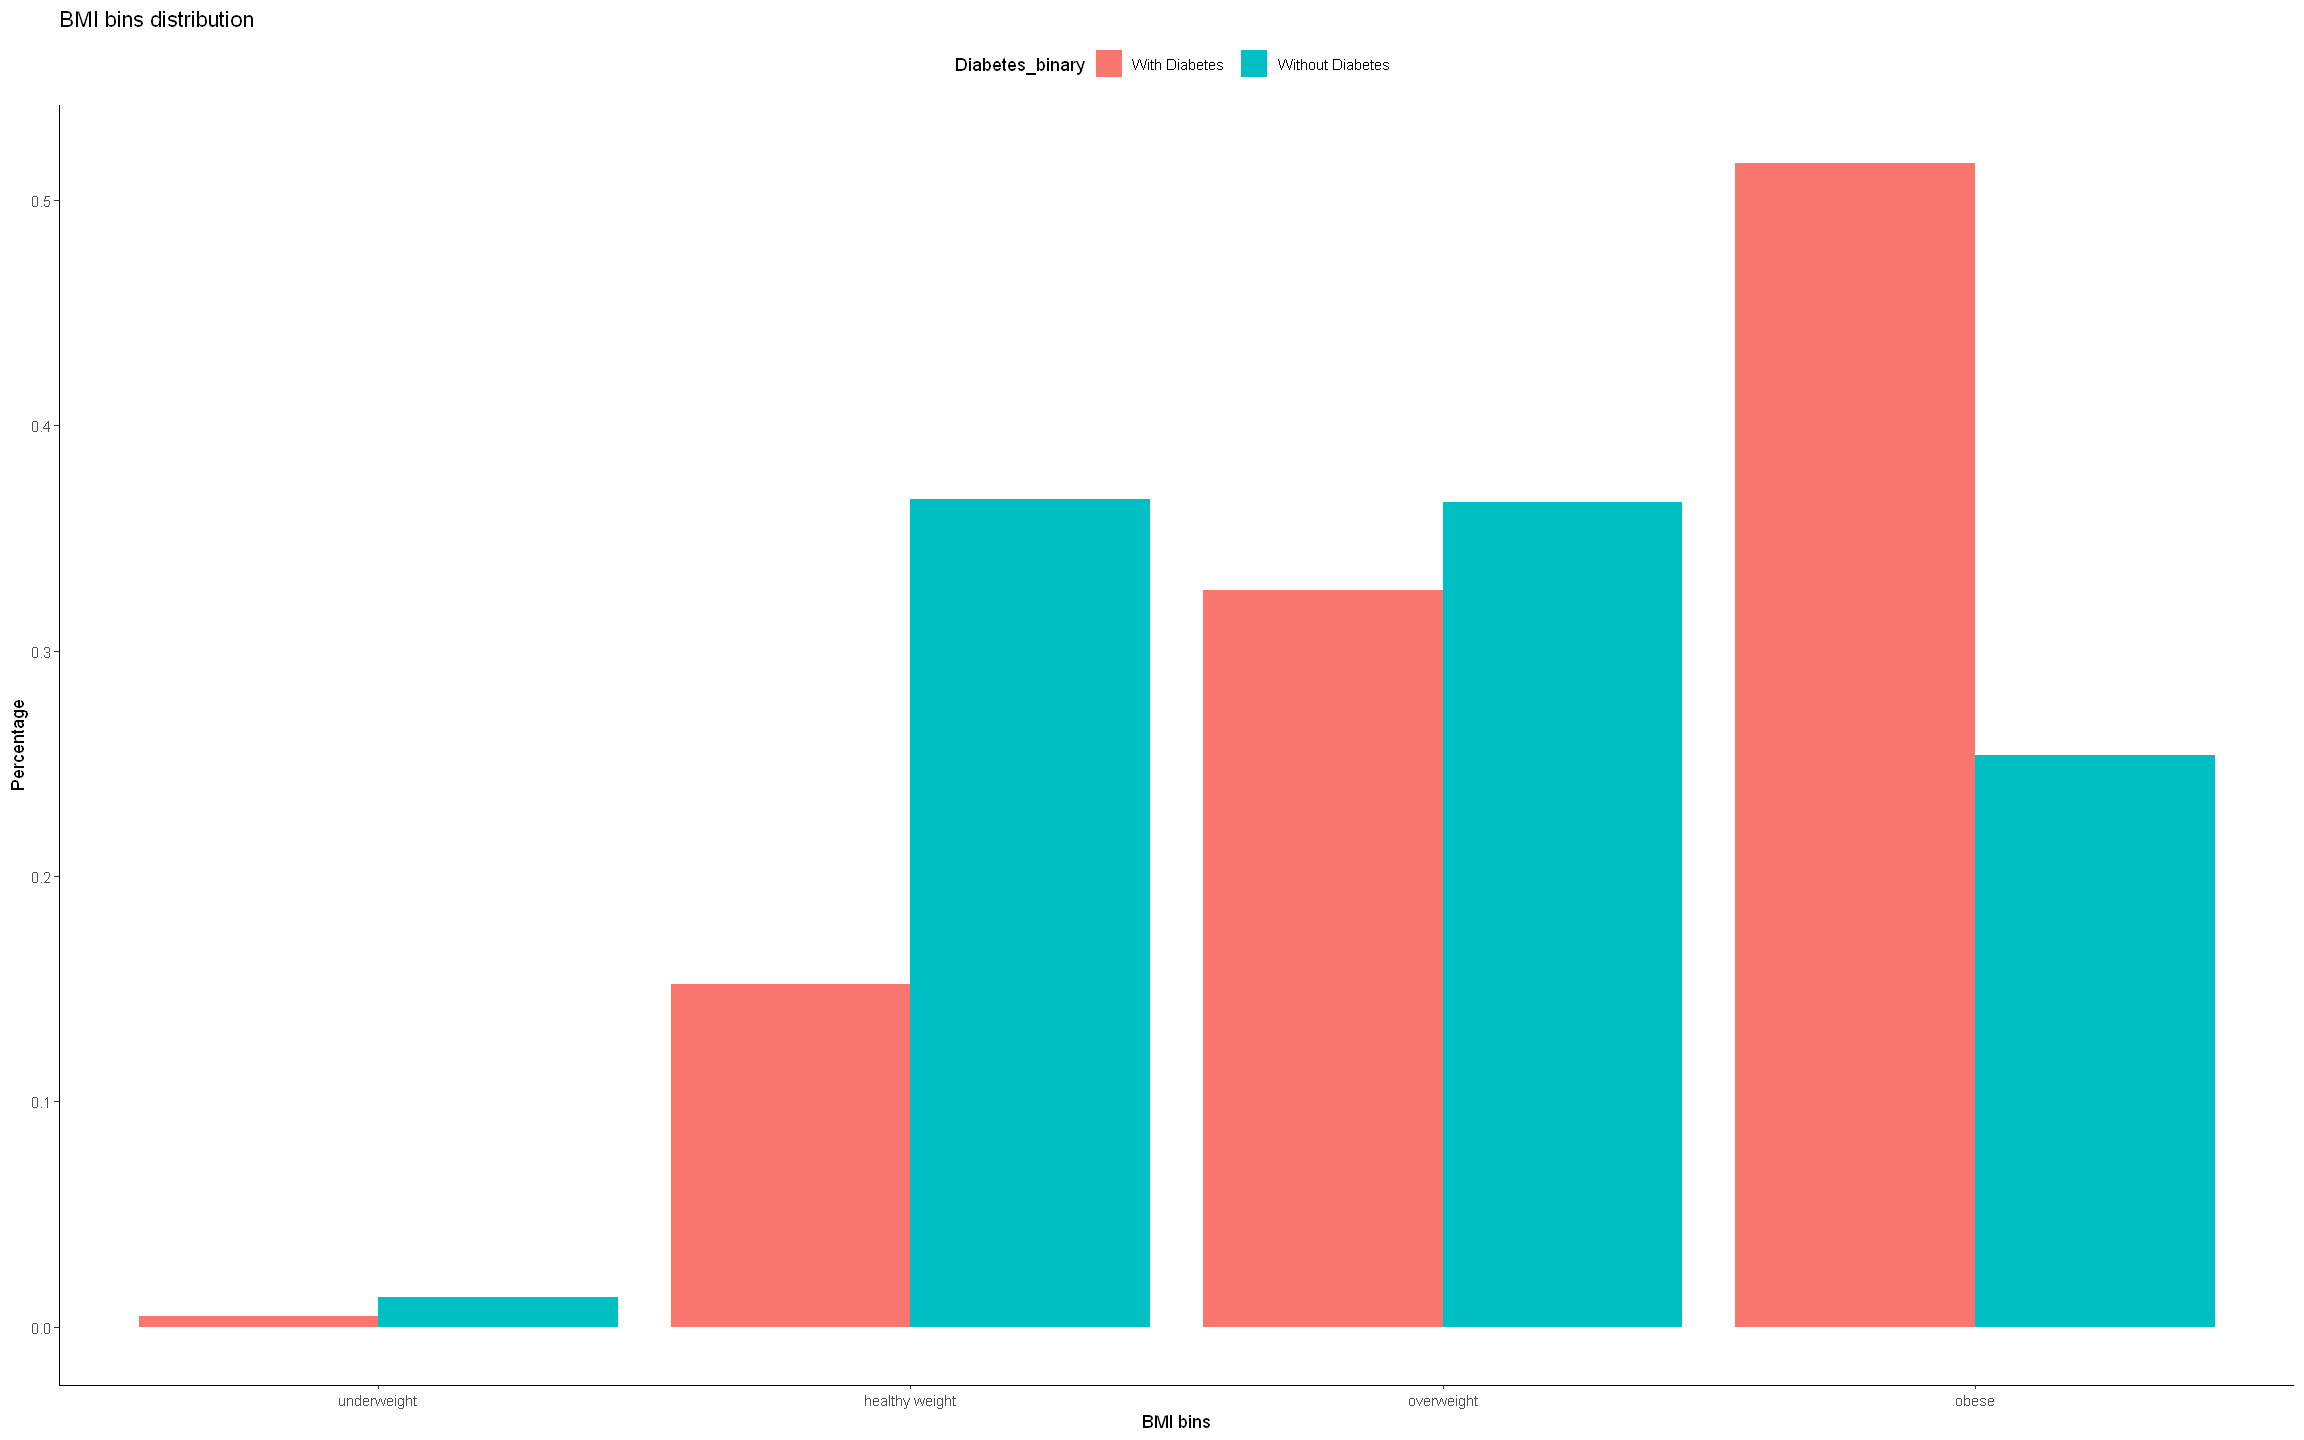

In [19]:
# Create BMI bins using cut
diabete_dataset3_wcc_obesity <- diabete_dataset3_wcc %>%
  mutate(BMI_bins = cut(BMI, c(0, 18.5, 25, 30, Inf),
                        labels = c('underweight', 'healthy weight', 'overweight', 'obese'),
                        include.lowest = TRUE))

# Count occurrences of each BMI bin for people with diabetes
nbr_with_diabete <- diabete_dataset3_wcc_obesity %>%
  filter(Diabetes_binary == 1) %>%
  count(BMI_bins) %>%
  mutate(percentage = n / sum(n))

# Count occurrences of each BMI bin for people without diabetes
nbr_no_diabete <- diabete_dataset3_wcc_obesity %>%
  filter(Diabetes_binary == 0) %>%
  count(BMI_bins) %>%
  mutate(percentage = n / sum(n))

# Combine the two datasets
nbr_combined <- bind_rows(
  data.frame(Diabetes_binary = "With Diabetes", nbr_with_diabete),
  data.frame(Diabetes_binary = "Without Diabetes", nbr_no_diabete)
)

# Plot the histogram
ggplot(nbr_combined, aes(x = BMI_bins, y = percentage, fill = Diabetes_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "BMI bins distribution", x = "BMI bins", y = "Percentage") +
  theme_classic() +
  theme(legend.position = "top")


Une première valeur à observer serait la différence entre l'indice de masse corporelle moyen d'une personne diabétique et d'une personne non diabétique.
En effet, on observe une différence de $4.11$ points entre les deux moyennes, ce qui est non négligeable. 

On remarque aussi que la variance de l'IMC des diabétiques est beaucoup plus élevée que celle des non-diabétiques. Cela peut s'expliquer par le fait que le sondage ne fait pas de distinction entre les individus atteints d'un diabète génétique (diabète de type 1) et les personnes atteintes d'un diabète contracté de par leur [mode de vie](https://www.ameli.fr/assure/sante/themes/diabete-comprendre/causes-facteurs-favorisants) (diabète de type 2, surpoids notamment). L'IMC d'un diabétique de type 1 est donc en général moins élevé que celui d'un diabétique de type 2. 

On pourrait déjà conclure que l'IMC est un facteur de risque important pour le diabète. Il semblerait le développement du diabète soit partiellement induit par une augmentation de l'IMC ; On pourra dans le prochain rendu le vérifier à l'aide d'une régression logistique.

##### b - L'âge et le diabète

Différence entre l'âge moyen des personnes ayant un diabète et des personnes saines :  1.516682
Variance des âges des sondés étant diabétiques :  5.412967
Variance des âges des sondés étant sains :  9.615262

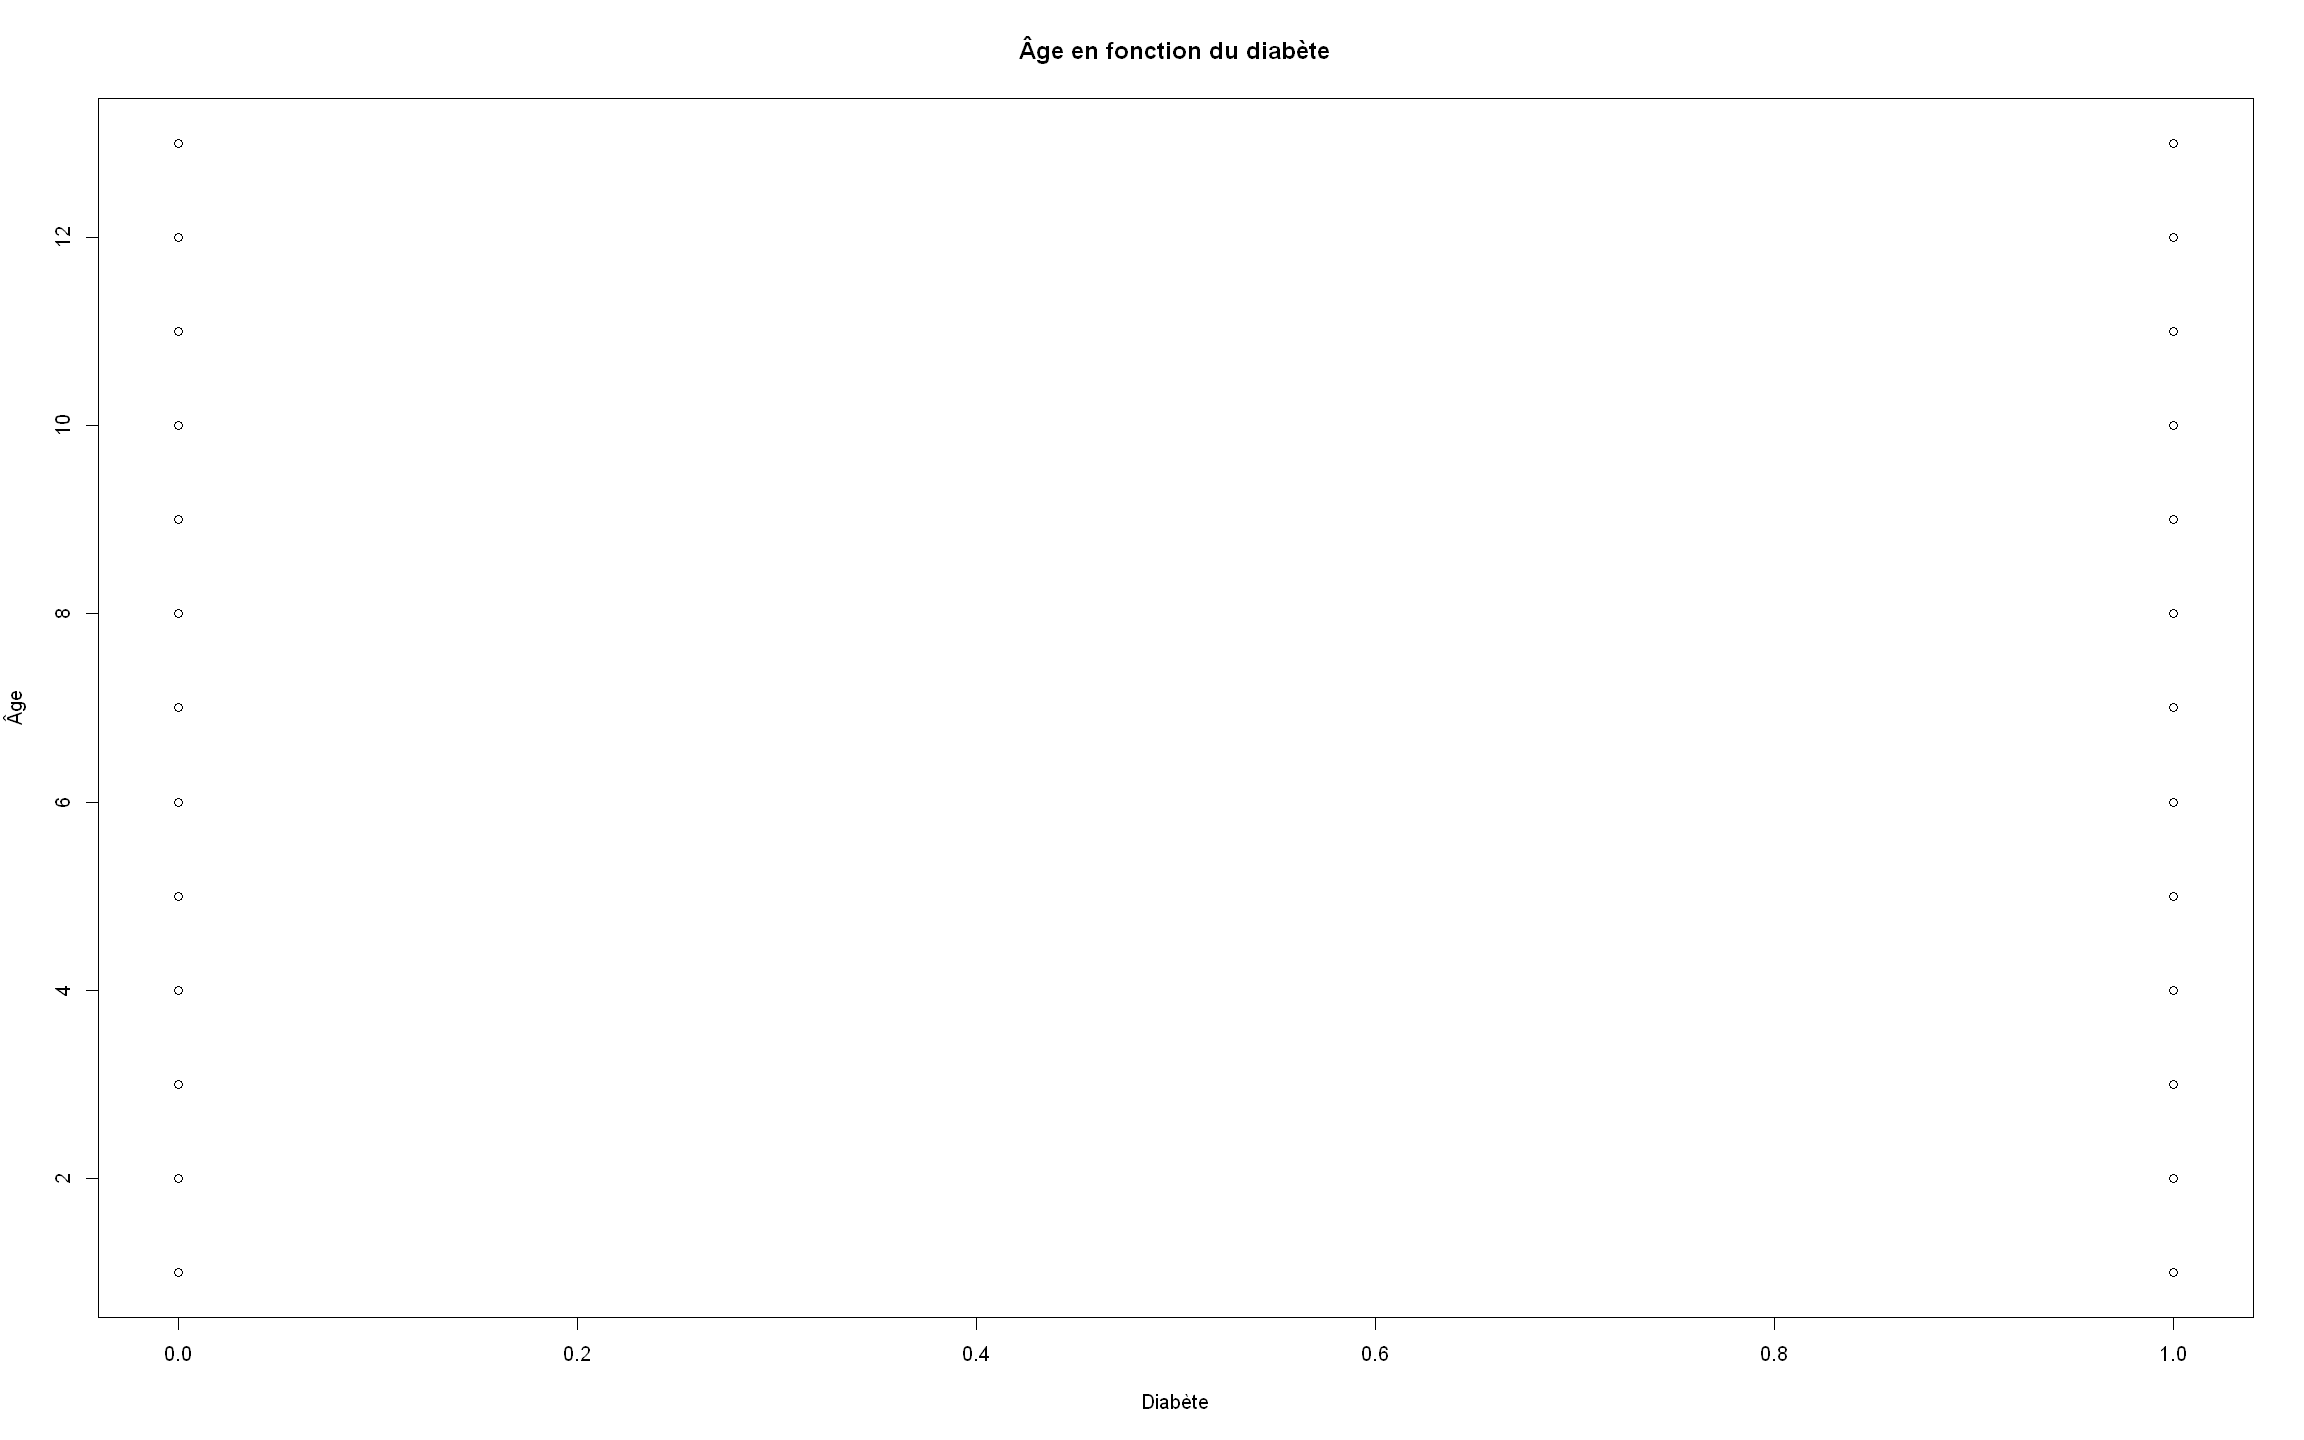

In [20]:
plot(diabete_dataset3_wcc$Diabetes_binary, diabete_dataset3_wcc$Age, xlab = "Diabète", ylab = "Âge", main = "Âge en fonction du diabète")


# Différence entre l'âge moyen du nombre de personnes ayant un diabète (1) et l'IMC moyen du nombre de personnes n'ayant pas de diabète (0)
cat("Différence entre l'âge moyen des personnes ayant un diabète et des personnes saines : ", mean(diabete_dataset3_wcc$Age[diabete_dataset3_wcc$Diabetes_binary == 1]) - mean(diabete_dataset3_wcc$Age[diabete_dataset3_wcc$Diabetes_binary == 0]))

# Variance de l'âge du nombre de personnes ayant un diabète (1)
cat("\nVariance des âges des sondés étant diabétiques : ", var(diabete_dataset3_wcc$Age[diabete_dataset3_wcc$Diabetes_binary == 1]))
# Variance de l'âge du nombre de personnes n'ayant pas de diabète (0)
cat("\nVariance des âges des sondés étant sains : ", var(diabete_dataset3_wcc$Age[diabete_dataset3_wcc$Diabetes_binary == 0]))

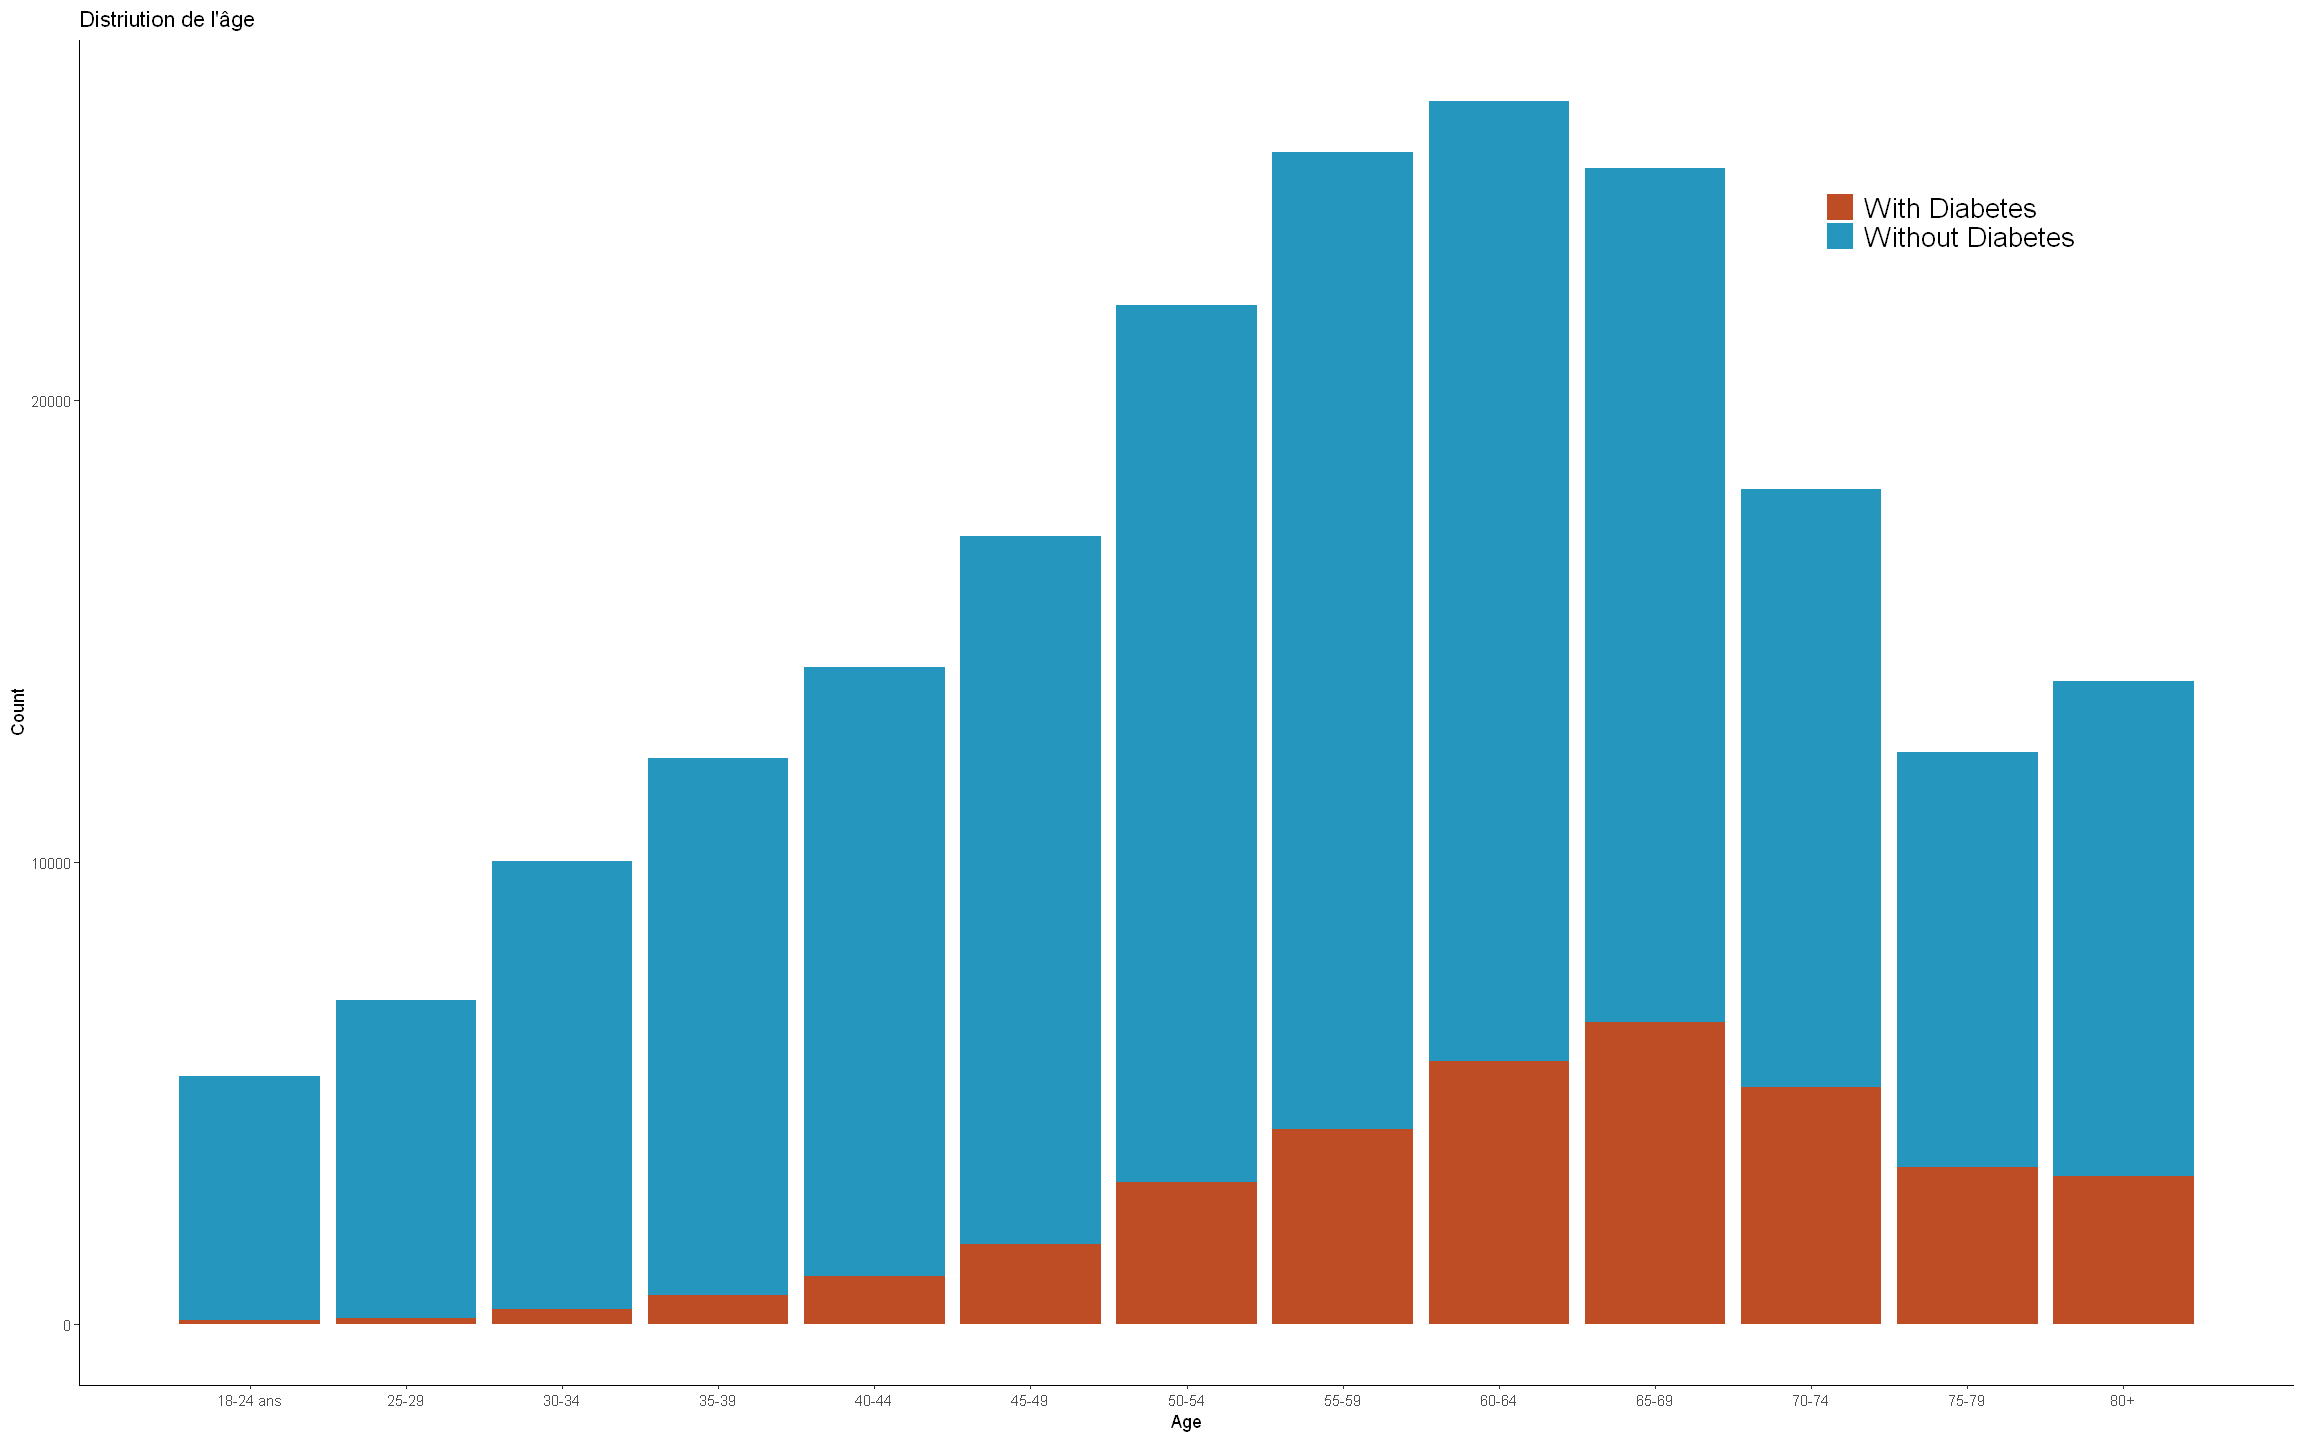

In [21]:
colors <- c('#be4d25', '#2596be')

p <- ggplot(data = diabete_dataset3_wcc[diabete_dataset3_wcc$Diabetes_binary == 0,], aes(Age, fill = "Without Diabetes")) + 
  geom_bar() +
  scale_fill_manual(values = colors) +
  geom_bar(data = diabete_dataset3_wcc[diabete_dataset3_wcc$Diabetes_binary == 1,], aes(fill = "With Diabetes")) +
  labs(title = "Distriution de l'âge", x = "Age", y = "Count") +
  theme_classic() +
  theme(legend.position = c(0.9, 0.9), legend.justification = c("right", "top"), 
        legend.title = element_blank(), legend.text = element_text(size = 16))

p +  scale_x_continuous(
    breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
    labels = c(
      '1' = '18-24 ans', '2' = '25-29', '3' = '30-34', 
      '4' = '35-39', '5' = '40-44', '6' = '45-49', '7' = '50-54', 
      '8' = '55-59', '9' = '60-64', '10' = '65-69', '11' = '70-74', 
      '12' = '75-79', '13' ='80+'
    )
)

On observe que la proportion de personnes diabétiques augmente en moyenne avec l'âge. Cela peut s'expliquer par le fait que les personnes âgées sont plus sujettes à développer des maladies chroniques (diabète, hypertension, etc.), en plus du fait que les mauvaises habitudes ont tendance à s'ancrer et se développer (on parle ici de tendance alimentaire et de sédentarité).

De plus, on peut remarque que la variance des personnes diabétique est bien plus faible que celle des personnes non-diabétiques. Ils auraient donc une potentielle meilleur espérance de vie.

##### Santé 

Nous avons décider d'observer les variables de santé par le prisme de nombre de diabétique. En somme nous évaluerons le nombre de personne diabétique totales par rapport aux différentes conditions de santé des sondés 

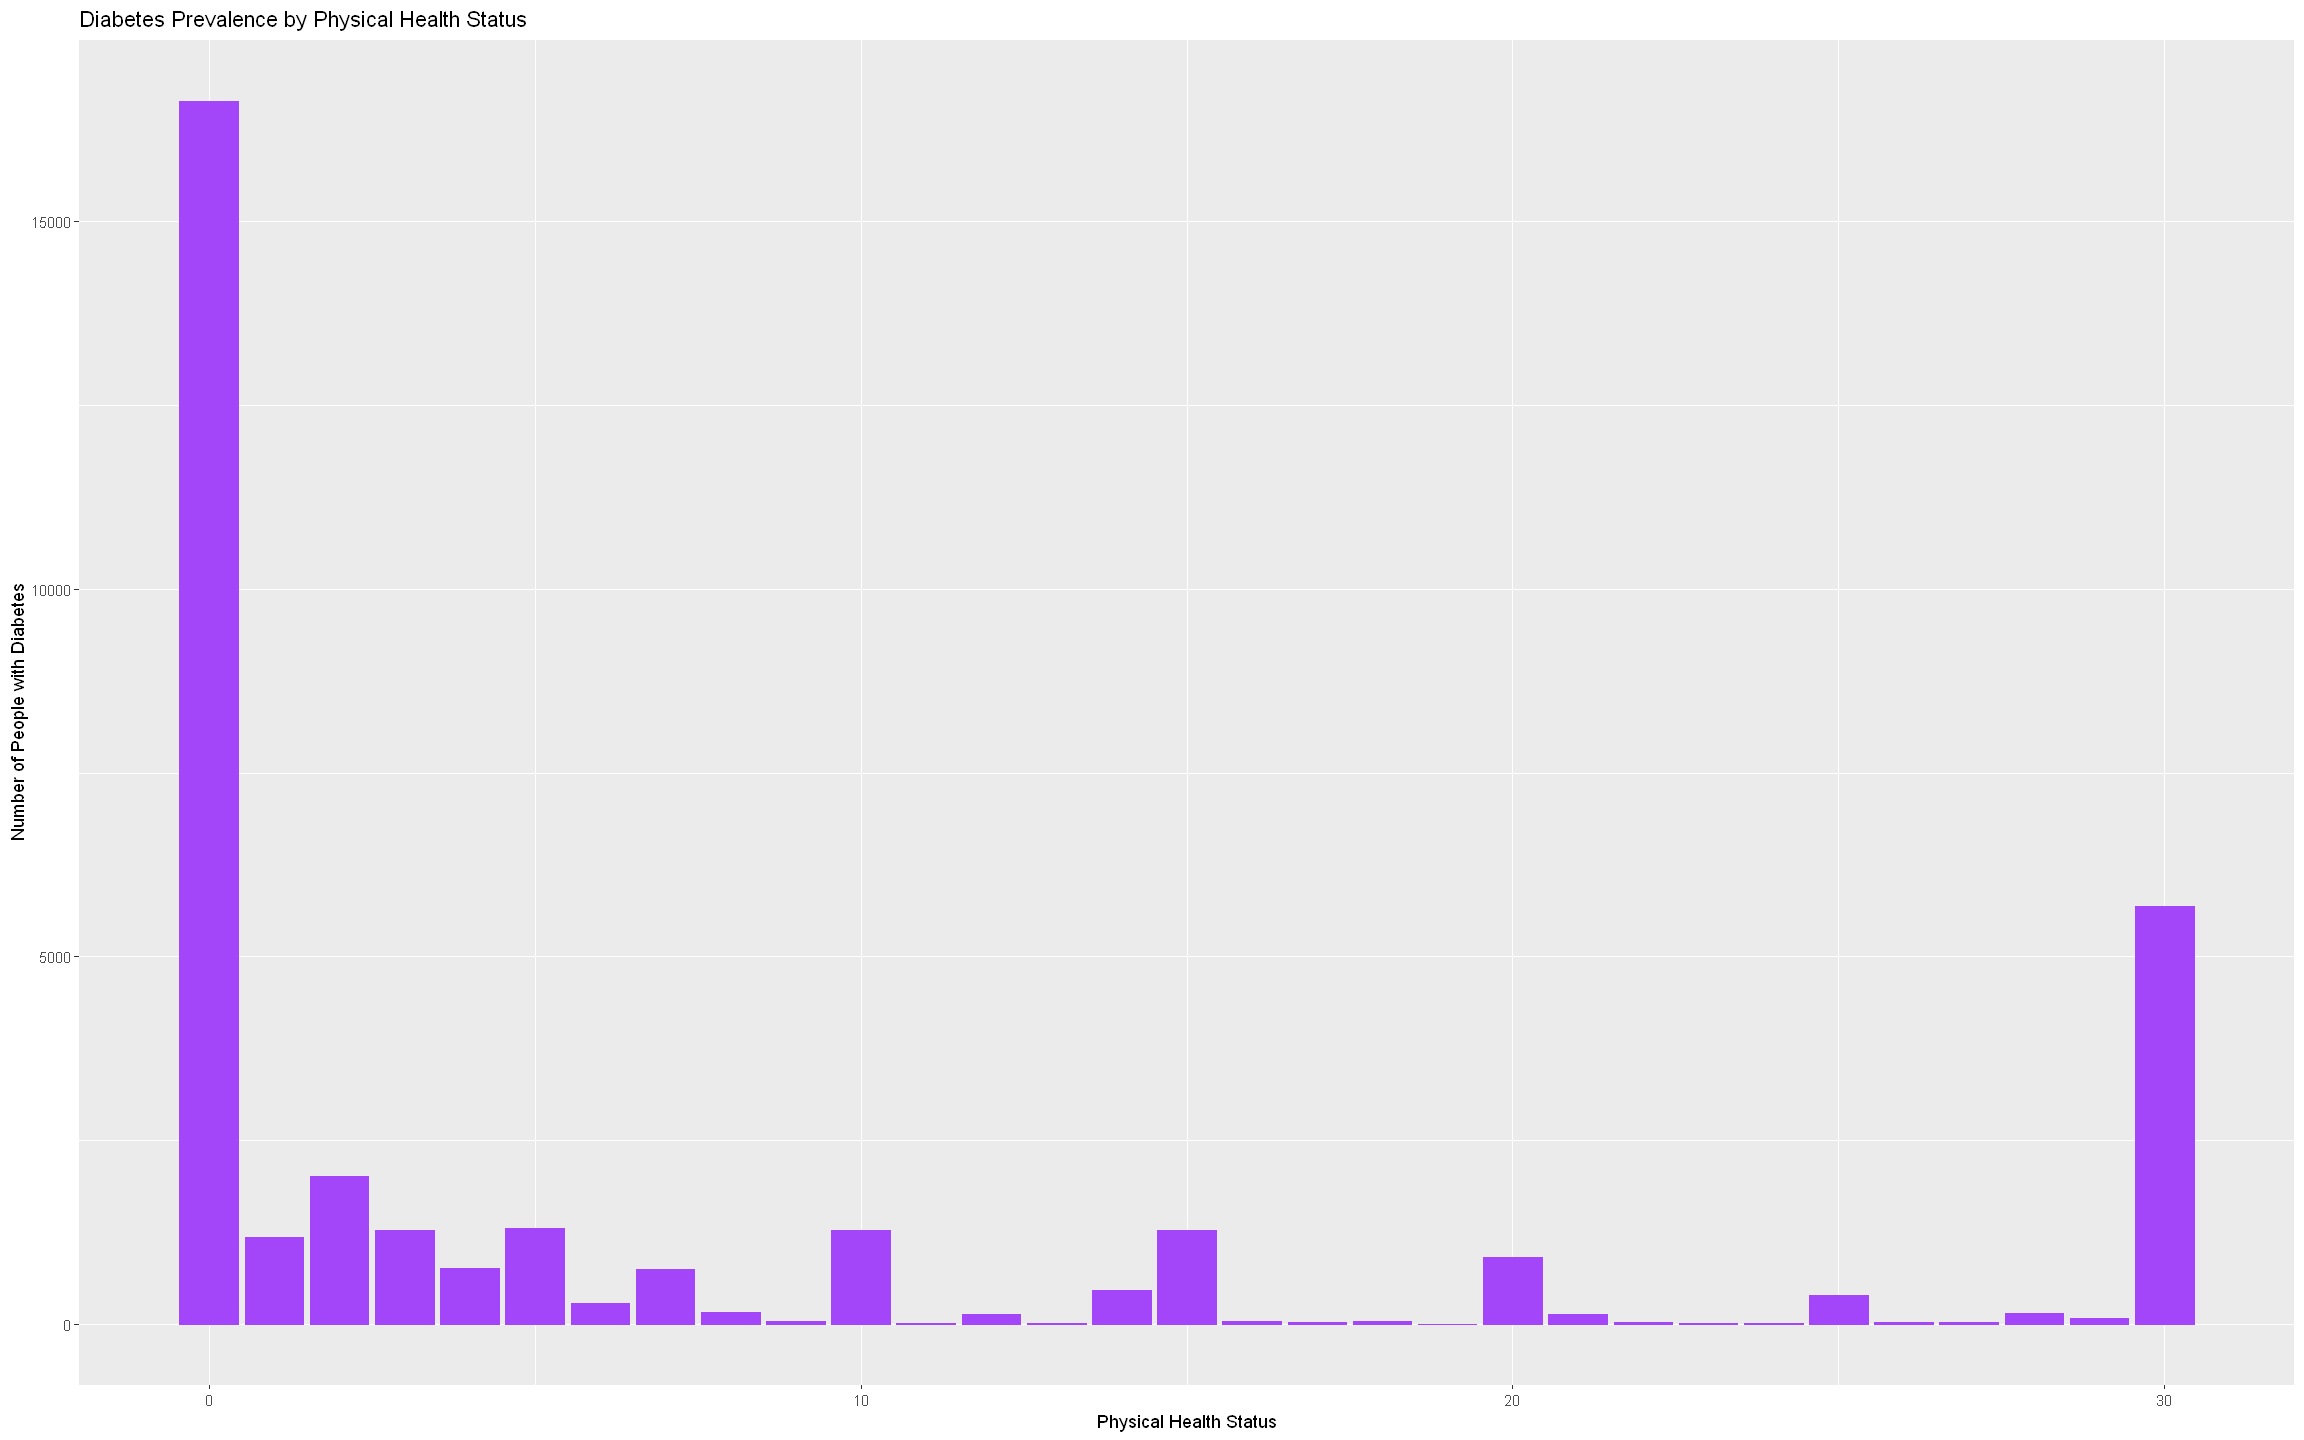

In [22]:
# Plot 1: Diabetes Prevalence by Physical Health Status
counts_phys <- aggregate(Diabetes_binary ~ PhysHlth, data = diabete_dataset3_wcc, FUN = sum) # Diabetes_binary est composé de 0 et de 1

ggplot(counts_phys, aes(x = PhysHlth, y = Diabetes_binary)) + 
  geom_bar(stat = "identity", color = "#a346fa", fill = "#a346fa") +
  labs(title = "Diabetes Prevalence by Physical Health Status",
       x = "Physical Health Status",
       y = "Number of People with Diabetes")


Ici, on observe que la plus grosse proportion de personnes diabétiques concerne les personnes disant n'avoir pas eu de problèmes de santé physiques dans les 30 derniers jours précédents le sondage. Tout en remarquant tout de même un pic pour les disant avoir eu de problèmes de santé physiques tous les jours du mois précédents le sondage.

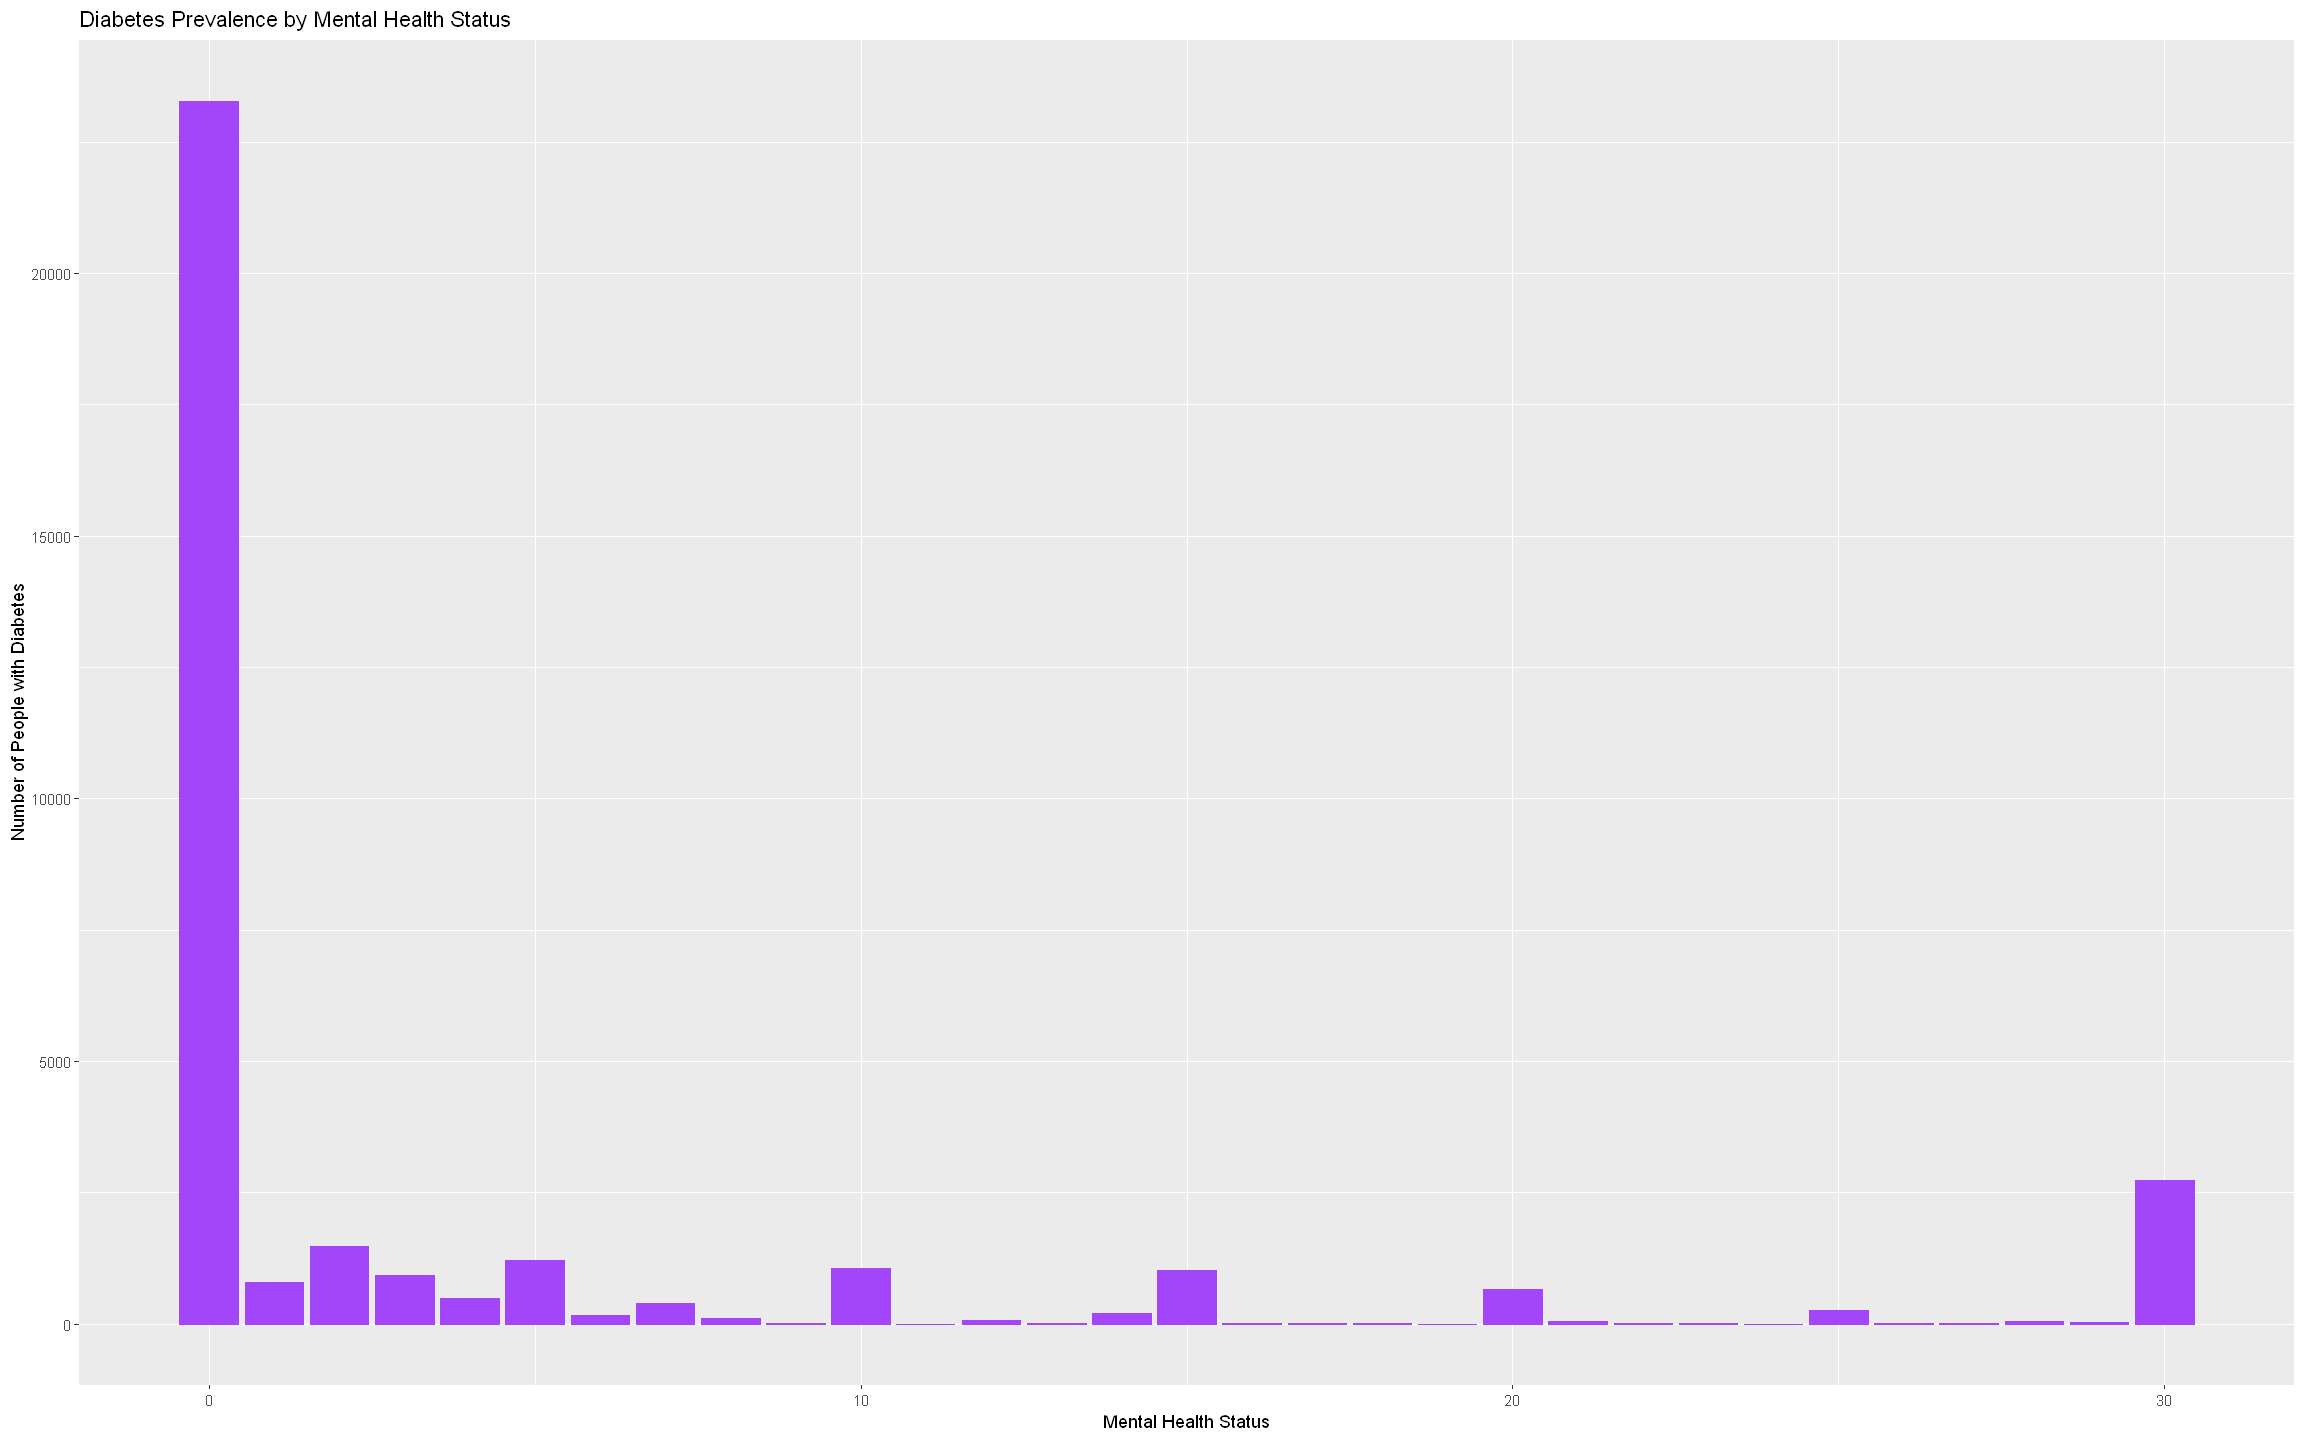

In [23]:
# Plot 2: Diabetes Prevalence by Mental Health Status
counts_ment <- aggregate(Diabetes_binary ~ MentHlth, data = diabete_dataset3_wcc, FUN = sum)

ggplot(counts_ment, aes(x = MentHlth, y = Diabetes_binary)) + 
  geom_bar(stat = "identity", color = "#a346fa", fill = "#a346fa") +
  labs(title = "Diabetes Prevalence by Mental Health Status",
       x = "Mental Health Status",
       y = "Number of People with Diabetes")

Même remarque que pour la santé physique

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


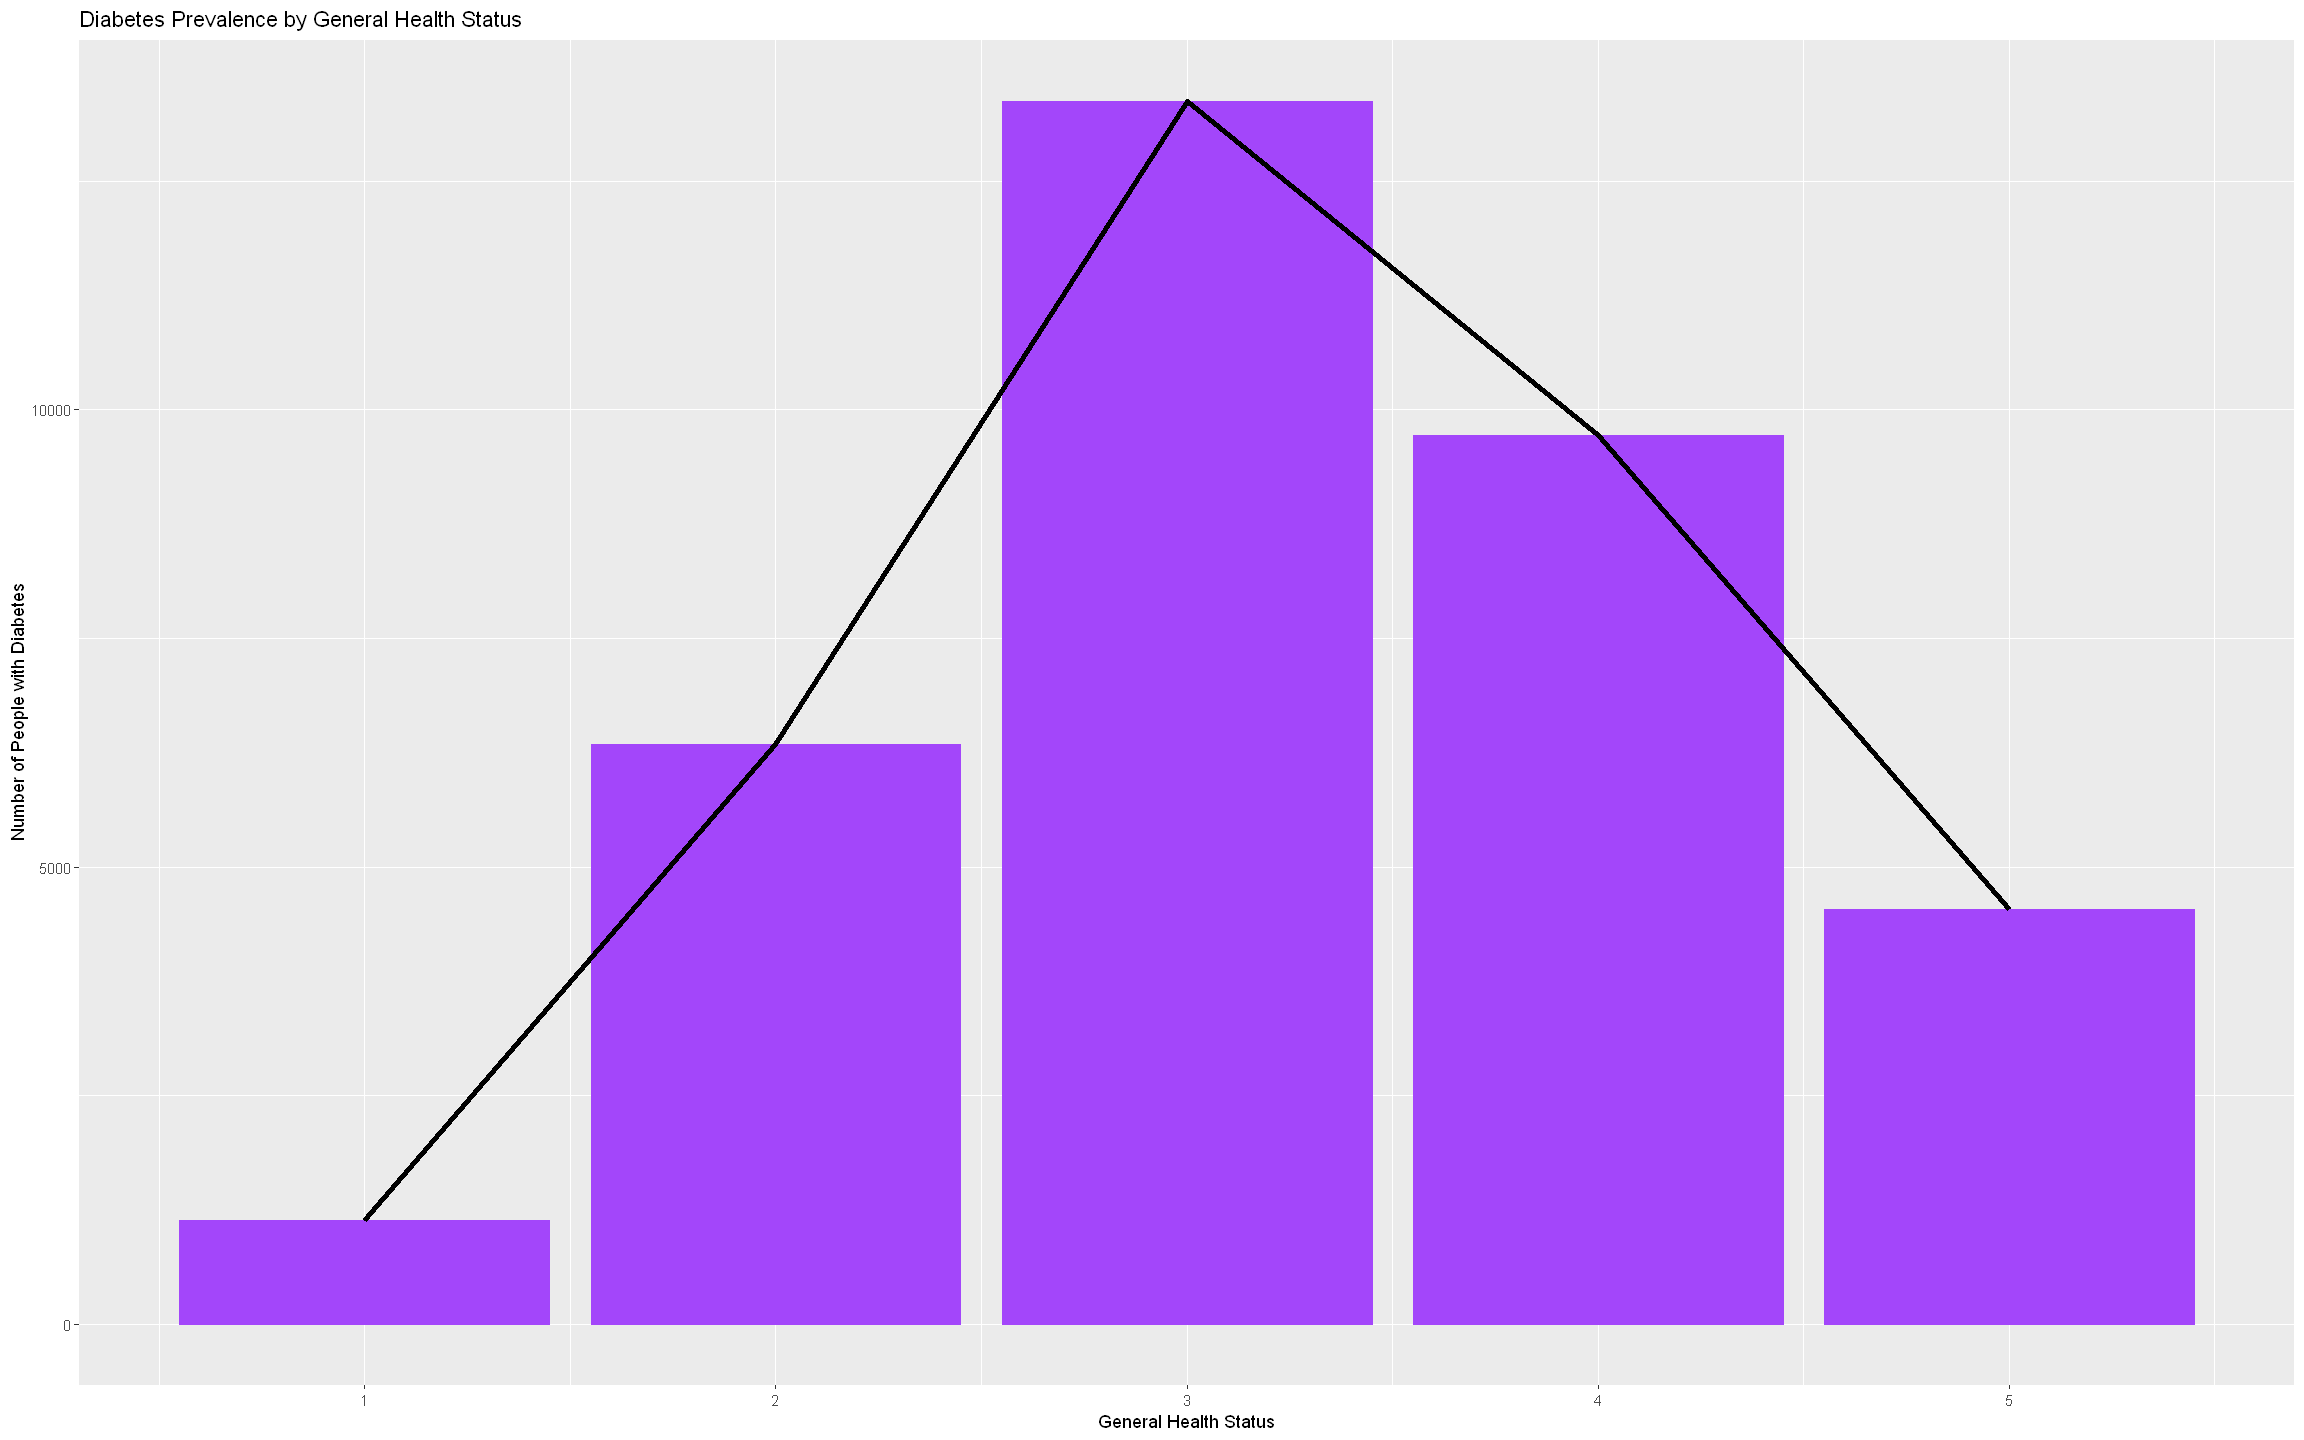

In [24]:
# Plot 3: Diabetes Prevalence by General Health Status
counts_gen <- aggregate(Diabetes_binary ~ GenHlth, data = diabete_dataset3_wcc, FUN = sum)

ggplot(counts_gen, aes(x = GenHlth, y = Diabetes_binary)) + 
  geom_bar(stat = "identity", color = "#a346fa", fill = "#a346fa") +
  geom_line(color = "black", size = 1.5) +
  labs(title = "Diabetes Prevalence by General Health Status",
       x = "General Health Status",
       y = "Number of People with Diabetes")

Ici, on observe que le nombre de personnes diabétiques semble (très approximativement) décrire une loi gaussienne.

La majorité des personnes diabétiques semblent se dire en santé "moyenne", avec une proportion de personnes se disant en santé "bonne" et "mauvaise" relativement faible en comparaison.

Nous pourrions coroboré les différentes observations précédentes et introduire des valeurs intermédiaires pour les variables de santé générale.

#### *Le niveau de vie (salaire, éducation, etc..) est-il un facteur impactant sur l'hygiène de vie, et par extension sur ce risque ?*

Beaucoup de nos données se portent sur un aspect financier ou sur un certain statut social. En effet, comme cité précédemment, les USAs ont un système de santé bien différent du notre, et il n'est pas rare que certaines personnes ne se soignent pas dû au coût trop élevé de la médication. Il est donc intéressant de voir si l'aspect financier à un impact à la fois sur le développement du diabète, mais aussi sur les autres facteurs tels que le sport, 

##### Incomming MONEY ! 

Nous allons, dans cette partie, étudier l'impact du salaire sur les personnes diabétiques et non-diabétiques.

Le code ci-dessous permet de calculer le pourcentage des personnes diabétiques et non-diabétiques par tranche de salaire. 

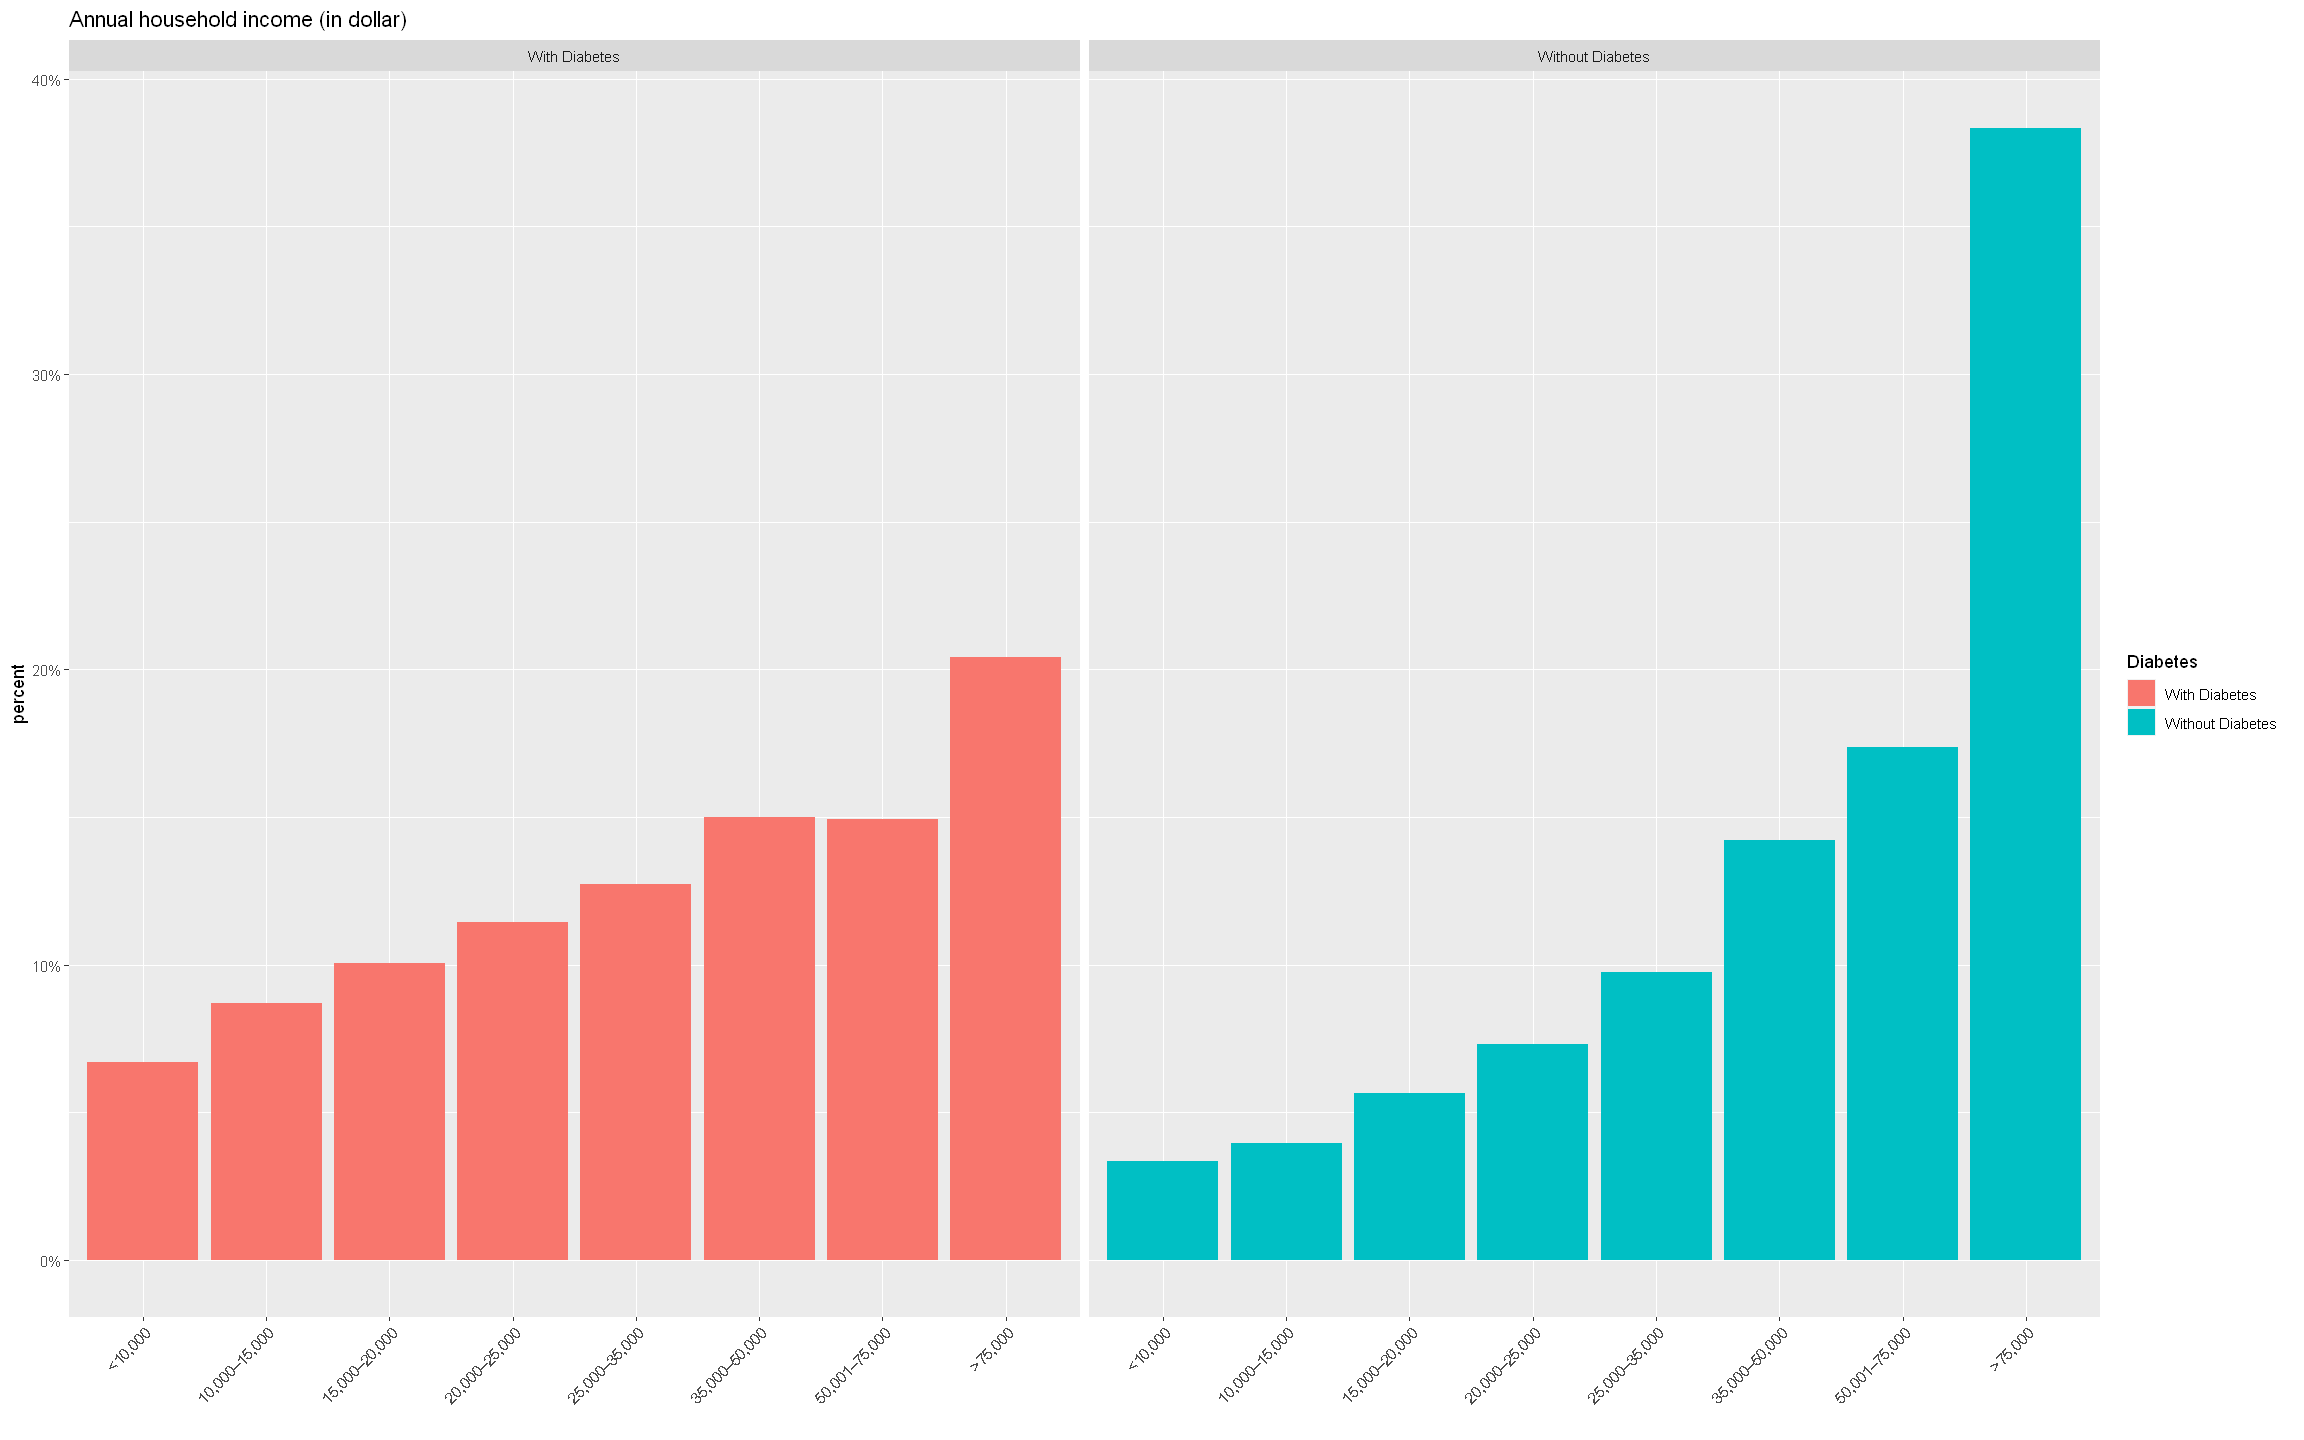

In [42]:
# On définit les groupes de revenus
income_groups <- c("<10,000", "10,000–15,000", "15,000–20,000", 
                    "20,000–25,000", "25,000–35,000", "35,000–50,000", 
                    "50,001–75,000", ">75,000")

# Création d'un nouveau dataset avec les groupes de revenus de touts les non diabétiques
without_diabetes <- diabete_dataset3_wcc %>% 
  filter(Diabetes_binary == FALSE) %>%  # On ne garde que les non diabétiques
  group_by(Income) %>%  # On regroupe par revenu
  summarize(count = n()) %>% # On compte le nombre de personnes par groupe de revenu
  mutate(percent = count / sum(count)) # On calcule le pourcentage de personnes par groupe de revenu

with_diabetes <- diabete_dataset3_wcc %>% 
  filter(Diabetes_binary == TRUE) %>% 
  group_by(Income) %>% 
  summarize(count = n()) %>% 
  mutate(percent = count / sum(count))

combined_data <- rbind(without_diabetes %>% mutate(Diabetes = "Without Diabetes"),  # On fusionne les deux datasets
                       with_diabetes %>% mutate(Diabetes = "With Diabetes"))

# On crée les deux graphiques de manière à pouvoir comparer les variations de revenus dans les deux cas
ggplot(combined_data) +
  geom_bar(aes(x = Income, y = percent, fill = Diabetes), stat = "identity", position = "dodge") +
  labs(title = "Annual household income (in dollar)", x = "") +
  scale_x_discrete(limits = income_groups, labels = income_groups, breaks = income_groups) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  scale_y_continuous(labels = scales::percent) +
  facet_wrap(~ Diabetes, ncol = 2)



`summarise()` has grouped output by 'Income', 'Diabetes_binary'. You can
override using the `.groups` argument.


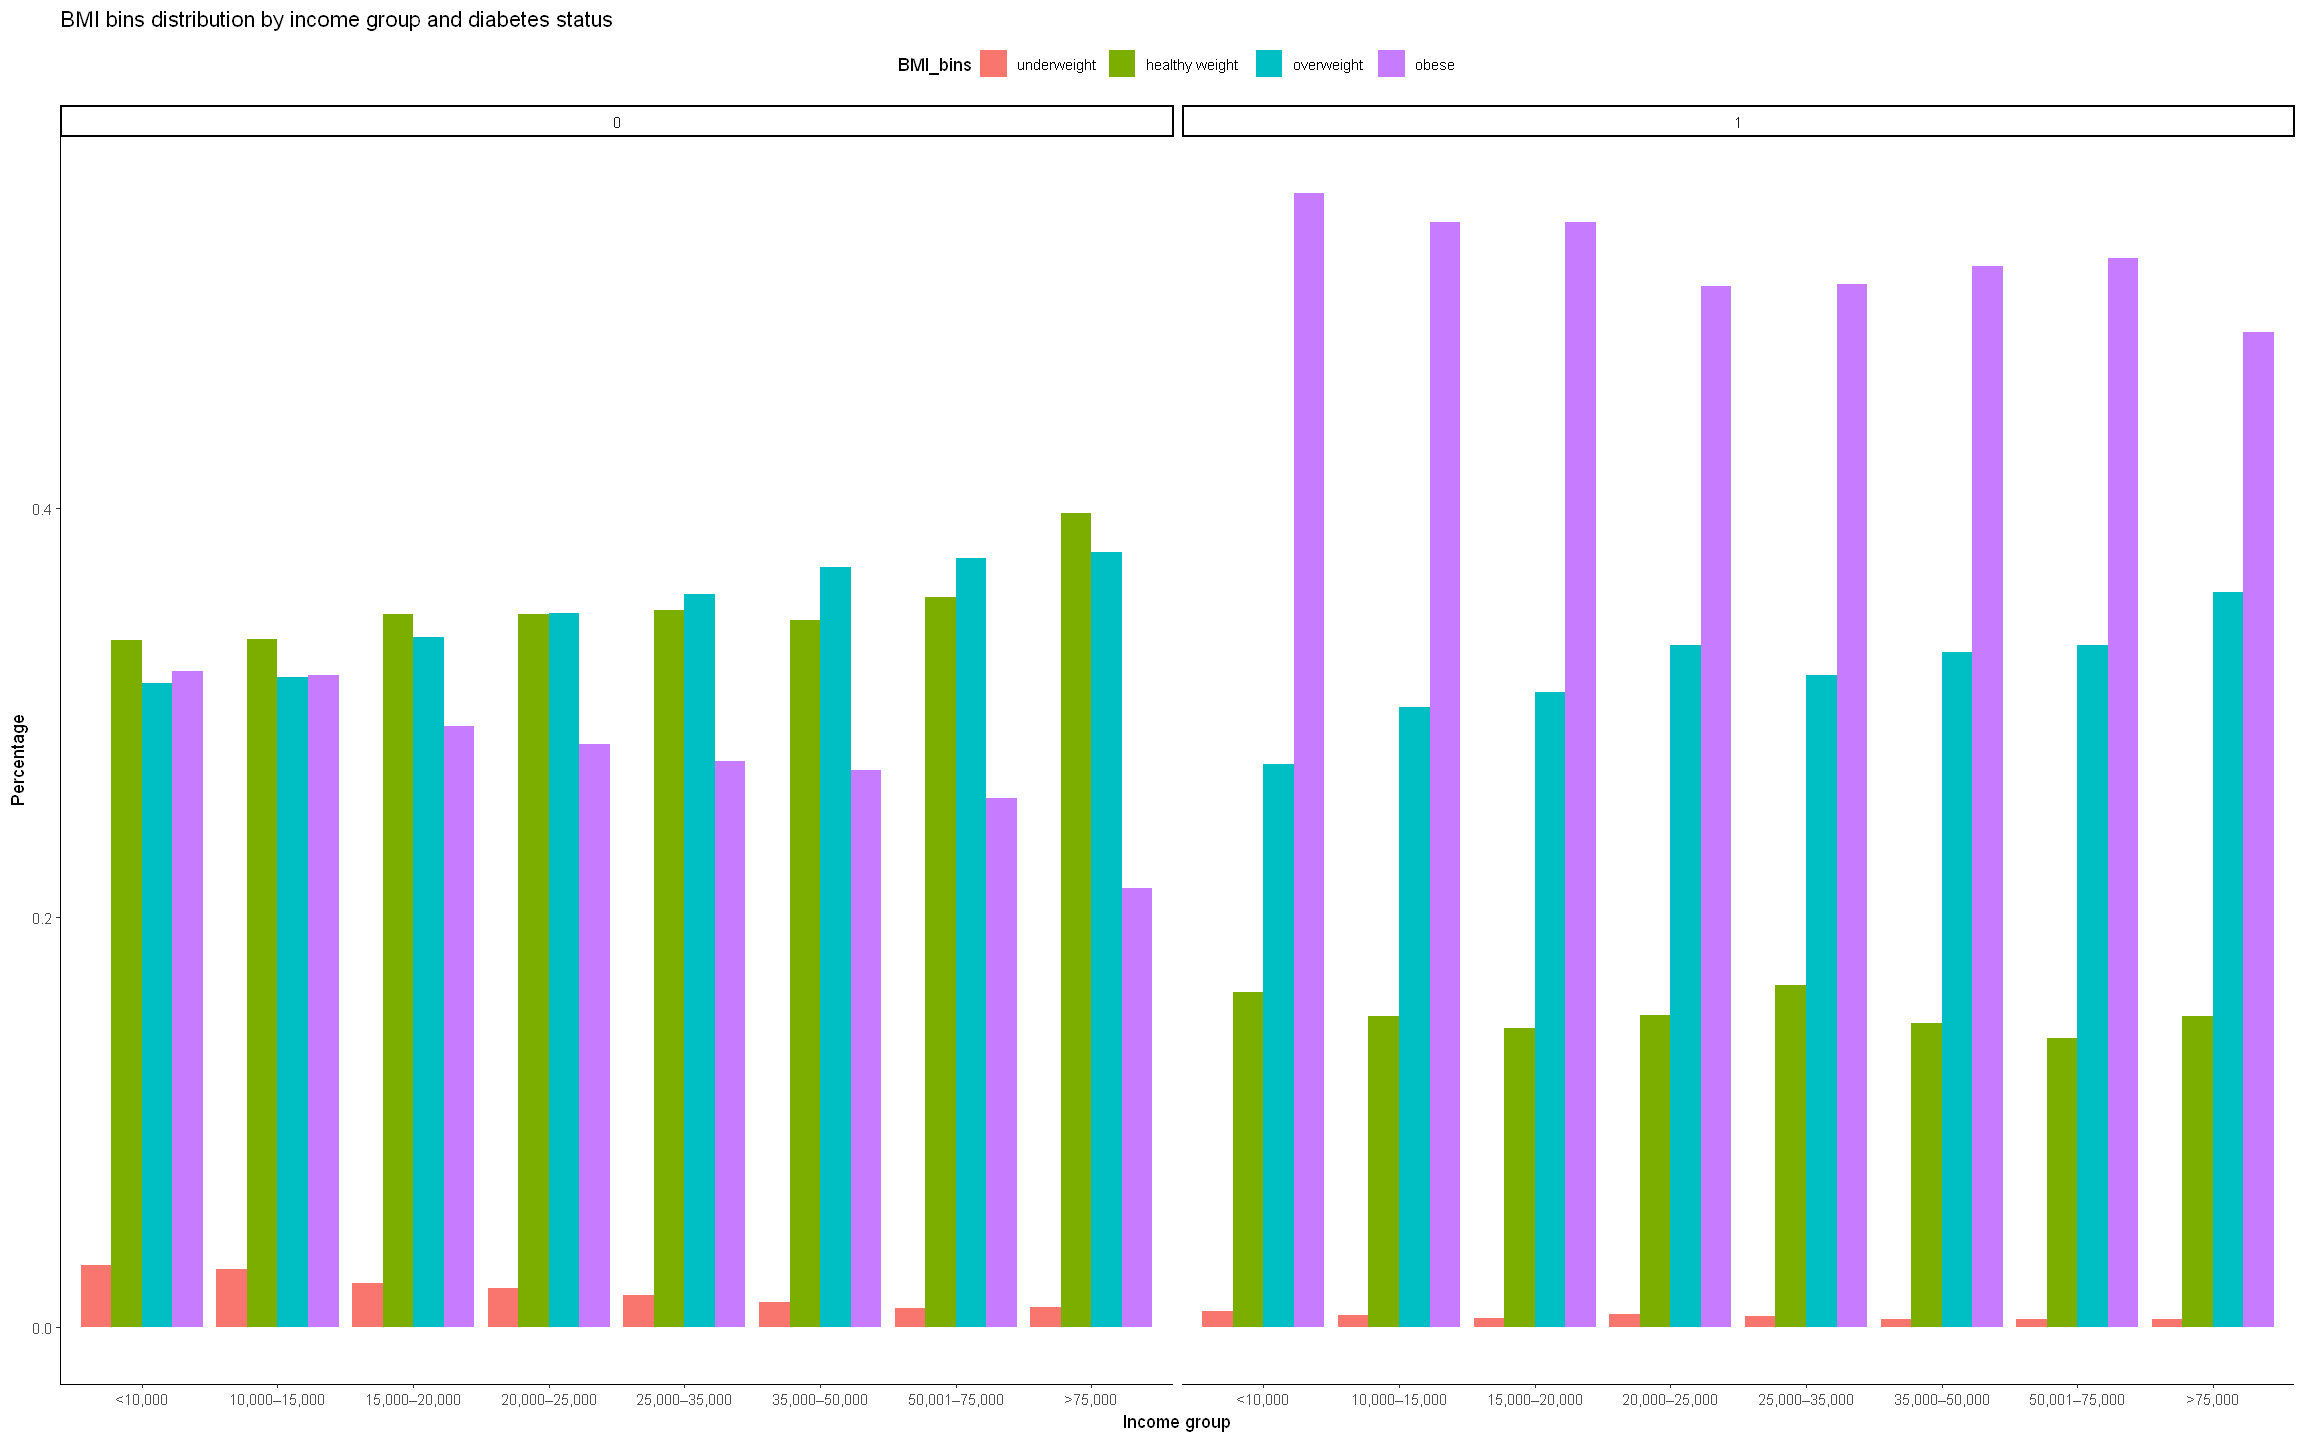

In [44]:
# Count occurrences of each BMI bin for each income group and diabetes status
diabetes_data <- diabete_dataset3_wcc_obesity %>%
  group_by(Income, Diabetes_binary, BMI_bins) %>%
  summarize(count = n()) %>%
  mutate(percentage = count / sum(count))

# Plot the bar chart
ggplot(diabetes_data, aes(x = Income, y = percentage, fill = BMI_bins)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "BMI bins distribution by income group and diabetes status", x = "Income group", y = "Percentage") +
  scale_x_discrete(limits = income_groups, labels = income_groups, breaks = income_groups) +
  theme_classic() +
  theme(legend.position = "top") +
  facet_wrap(~ Diabetes_binary, ncol = 2)

On remarque que la proportion de personnes diabétiques augmente avec le salaire. Plus encore (et d'après le second dirgramme en barre), on remarque que la proportion des personnes qui sont diabétiques et obèse reste à peu près constante quelque soit le niveau de revenus de la personne.


Cela peut s'expliquer par le fait que les personnes ayant un salaire élevé ont plus de moyens pour se soigner, et donc sont moins sujettes à développer des maladies chroniques.

### Tableaux Récapitulatifs :

In [28]:
# Calcule la somme  de chaque variable en fonction de la valeur de "diabete" (0 ou 1)
somme_diabete <- aggregate(. ~ Diabetes_binary, data = diabete_dataset2, FUN = sum)

somme_diabete

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,13228,13477,33838,981557,15281,1127,2571,27412,22556,⋯,33584,2897,84236,107532,129591,4745,15371,275312,180137,218669
1,26604,23686,35105,1129093,18317,3268,7878,22287,20693,⋯,33924,3742,116323,157707,281159,13121,16935,331512,167735,184156


In [29]:
# Calcule la moyenne de chaque variable en fonction de la valeur de "diabete" 
moyennes_diabete <- aggregate(. ~ Diabetes_binary, data = diabete_dataset2, FUN = mean)

# Filtrer les colonnes dont les valeurs sont comprises entre 0 et 1
moyennes_diabete_pourcent <- moyennes_diabete[, sapply(moyennes_diabete, function(x) all(x >= 0 & x <= 1))]

# Convertir les valeurs en pourcentage
moyennes_diabete_pourcent <- round(moyennes_diabete * 100, 2)

# Afficher le résultat
moyennes_diabete_pourcent
moyennes_diabete

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,37.42,38.13,95.73,2777.0,43.23,3.19,7.27,77.55,63.81,⋯,95.01,8.20,238.32,304.23,366.64,13.42,43.49,778.91,509.64,618.65
100,75.27,67.01,99.32,3194.4,51.82,9.25,22.29,63.05,58.54,⋯,95.98,10.59,329.10,446.18,795.45,37.12,47.91,937.91,474.55,521.01


Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.3742432,0.3812878,0.9573360,27.76996,0.4323261,0.03188480,0.07273808,0.7755333,0.6381486,⋯,0.9501499,0.08196118,2.383183,3.042268,3.666355,0.1342443,0.4348724,7.789057,5.096390,6.186527
1,0.7526736,0.6701183,0.9931817,31.94401,0.5182199,0.09245742,0.22288236,0.6305381,0.5854411,⋯,0.9597691,0.10586771,3.290981,4.461806,7.954479,0.3712160,0.4791207,9.379053,4.745516,5.210094


In [30]:
# Calcule la variance de chaque variable en fonction de la valeur de "diabete" (selon si elle vaut 0 ou 1)
variance_diabete <- aggregate(. ~ Diabetes_binary, data = diabete_dataset2, FUN = var)

# Filtrer les colonnes dont les valeurs sont comprises entre 0 et 1
variance_diabete_pourcent <- variance_diabete[, sapply(variance_diabete, function(x) all(x >= 0 & x <= 1))]

# Convertir les valeurs en pourcentage
variance_diabete_pourcent <- round(variance_diabete_pourcent * 100, 2)

# Afficher le résultat
variance_diabete_pourcent
moyennes_diabete

Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,23.42,23.59,4.08,24.54,3.09,6.74,17.41,23.09,14.69,5.81,4.74,7.52,11.62,24.58
100,18.62,22.11,0.68,24.97,8.39,17.32,23.30,24.27,18.43,2.30,3.86,9.47,23.34,24.96


Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.3742432,0.3812878,0.9573360,27.76996,0.4323261,0.03188480,0.07273808,0.7755333,0.6381486,⋯,0.9501499,0.08196118,2.383183,3.042268,3.666355,0.1342443,0.4348724,7.789057,5.096390,6.186527
1,0.7526736,0.6701183,0.9931817,31.94401,0.5182199,0.09245742,0.22288236,0.6305381,0.5854411,⋯,0.9597691,0.10586771,3.290981,4.461806,7.954479,0.3712160,0.4791207,9.379053,4.745516,5.210094
